In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
# from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from jupyter_dash import JupyterDash
from scipy import signal
from scipy.fft import fftshift
import plotly.graph_objects as go
import matplotlib.dates as mdates
from datetime import datetime
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import scipy.fftpack                 # discrete Fourier transforms
from scipy import signal
from scipy.signal import find_peaks
from scipy.signal import butter, lfilter
from scipy.signal import find_peaks, peak_prominences
from scipy.signal import chirp, peak_widths


![Example Image](clinical_data_analysis.png)


In [4]:
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style> .output_scroll { max-height: 10000px; } </style>"))


/var/folders/d3/mwqwbw3x0b30c22zykpzcrww0000gn/T/ipykernel_1321/2067692610.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [5]:
def plot_bar_plot(grouped_data,filename):
     # Plotting the bar plot using matplotlib
    fig, ax = plt.subplots(figsize=(15, 8))
    bars = ax.bar(grouped_data.index, grouped_data.values, color='skyblue')
    # Adding value annotations on top of each bar with increased font size
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), 
                ha='center', va='bottom', fontsize=20)  # Increased fontsize to 14
    
#     plt.bar(grouped_data.index, grouped_data.values, color='skyblue')
    plt.title('Duration for Different Hyperactive Behaviour Types \n' + filename, fontsize=20)
    plt.xlabel('Hyperactive Behaviour Type',fontsize=20)
    plt.ylabel('Duration (in seconds)',fontsize=20)
    plt.xticks(rotation=15)
    plt.yticks(fontsize=18)  # y-axis ticks font size
    plt.tight_layout()
    return plt


### Create a master file consisting of all the labeles from all the participants and activities

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A2_P13.csv


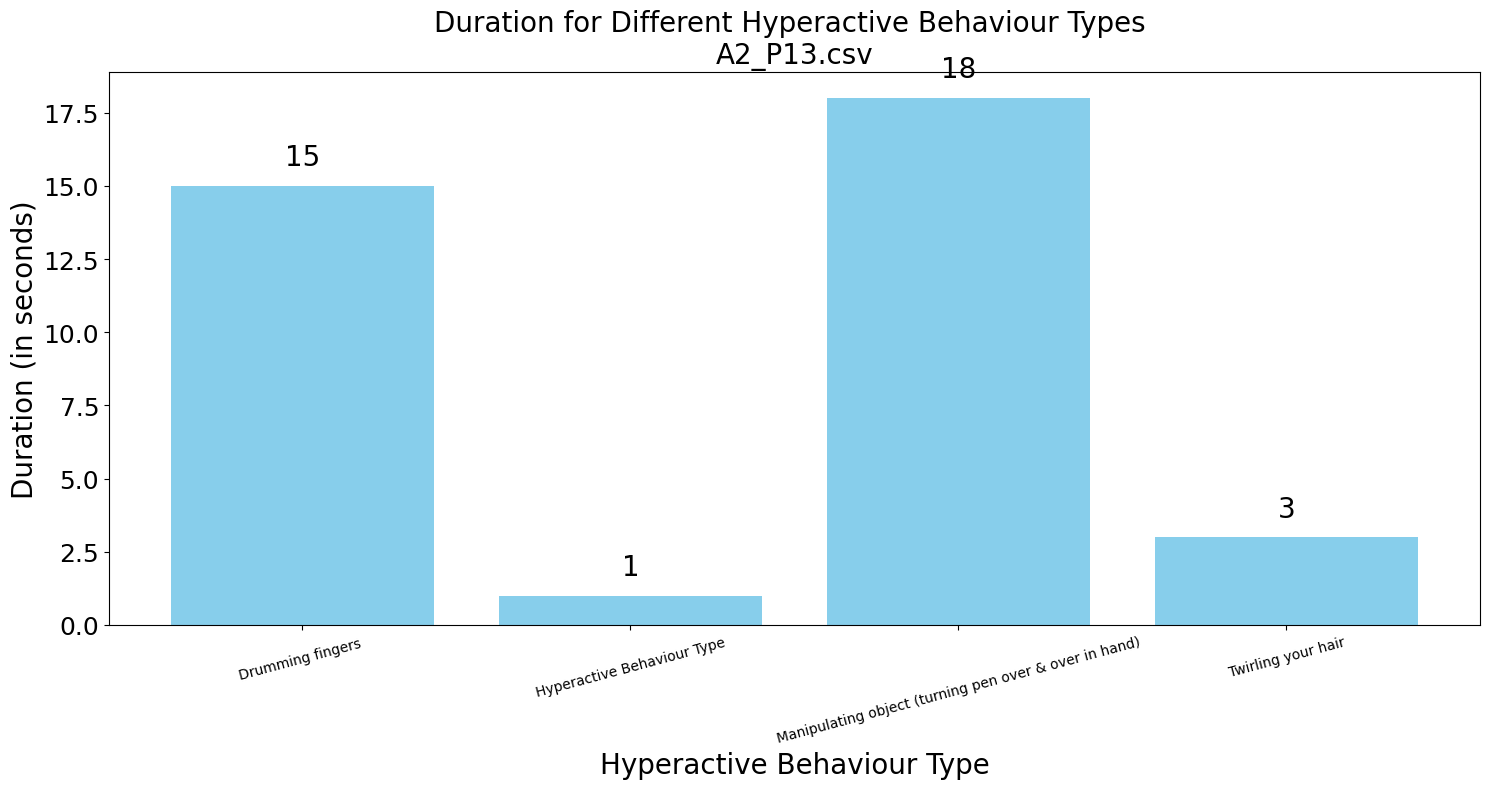

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A2_P7.csv


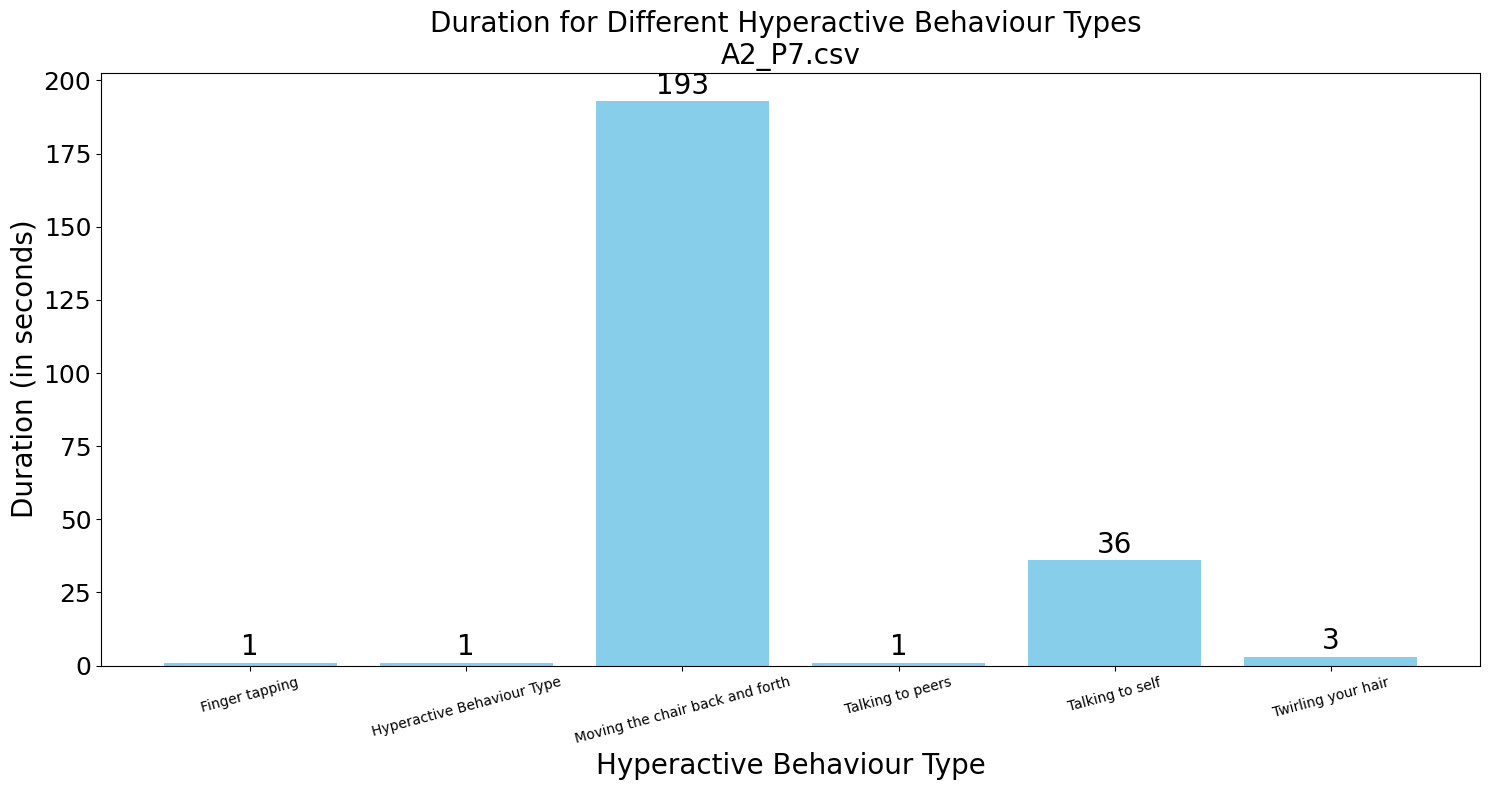

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A2_P6.csv


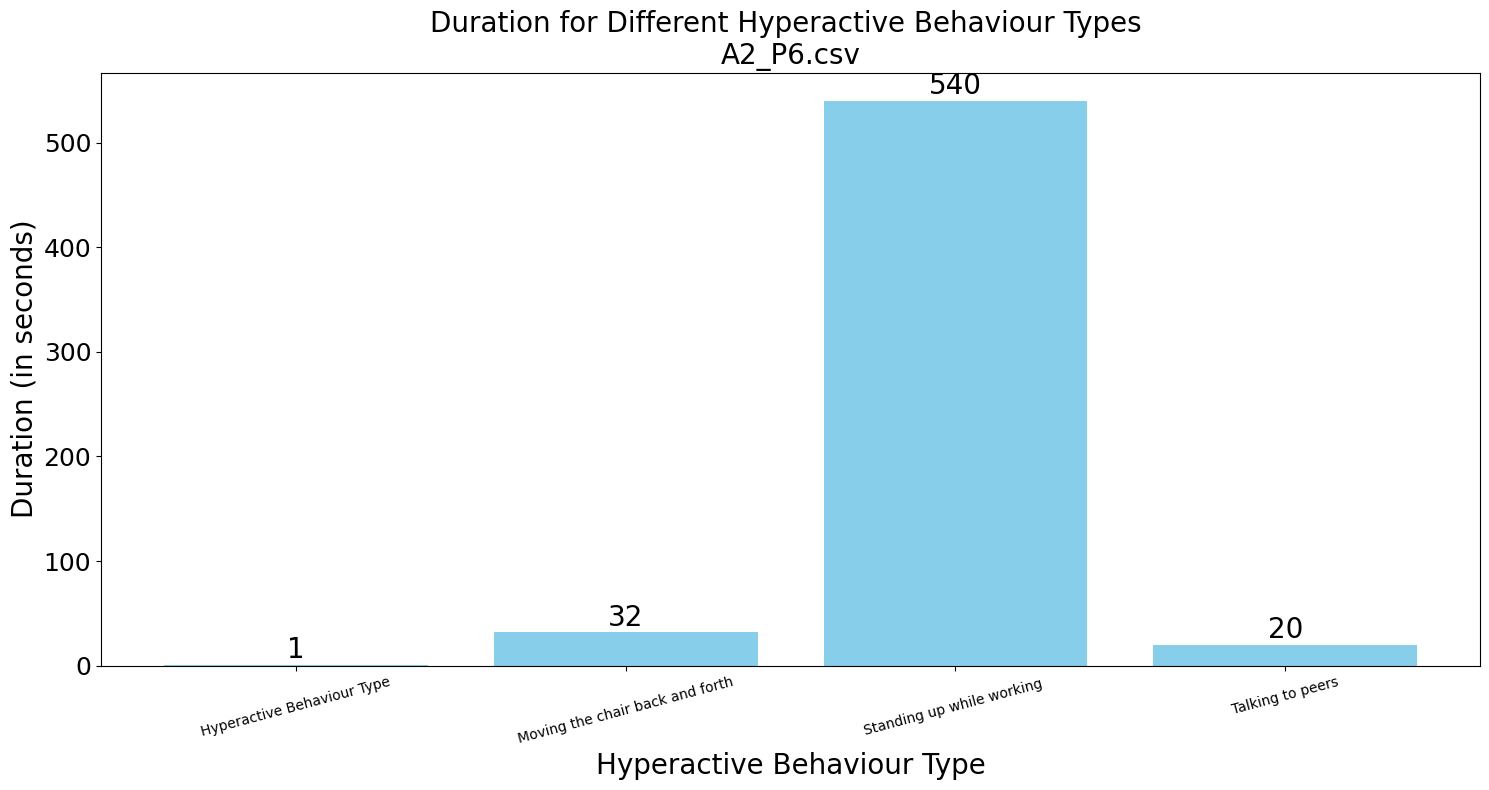

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A2_P12.csv


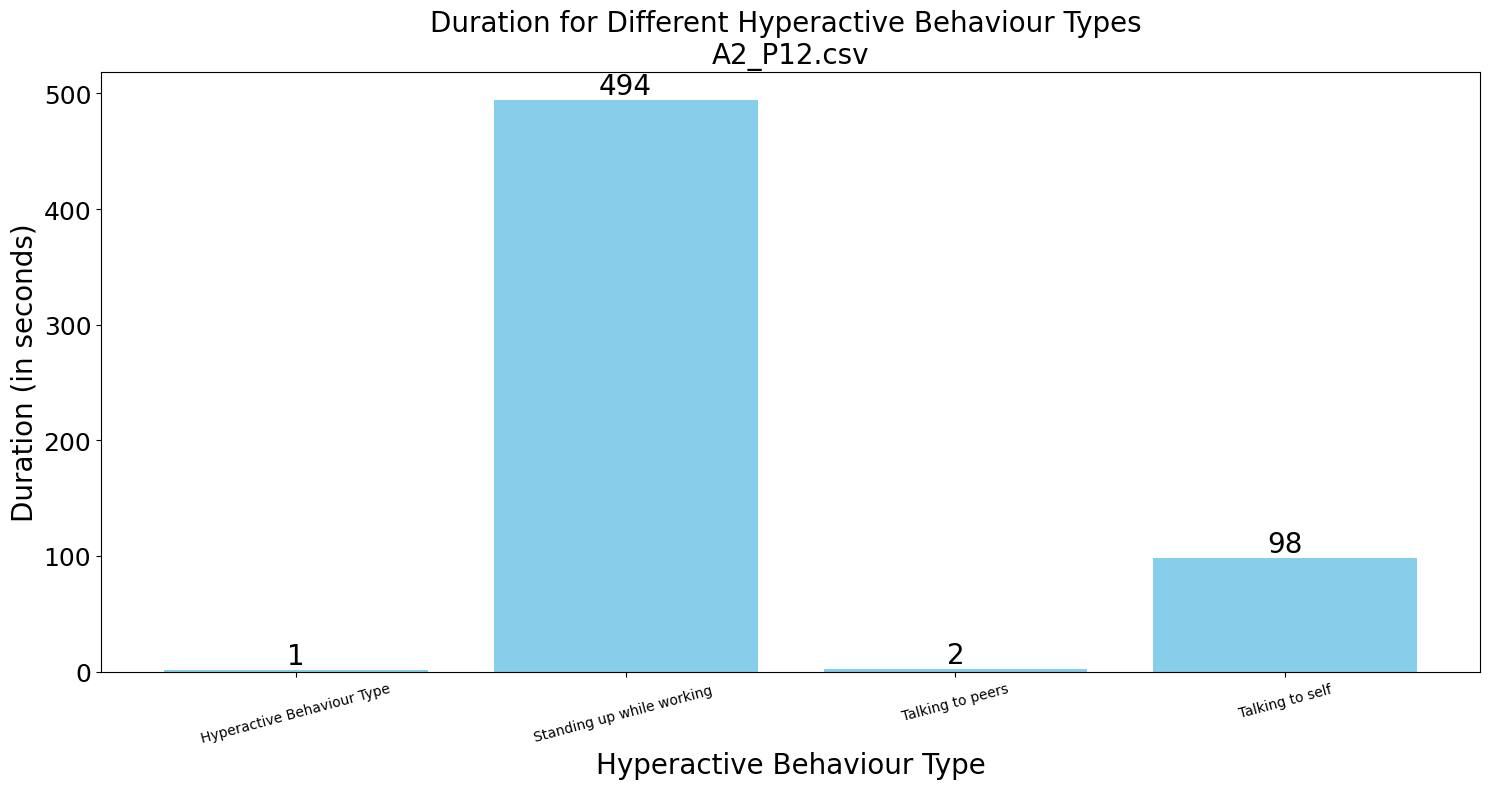

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A2_P10.csv


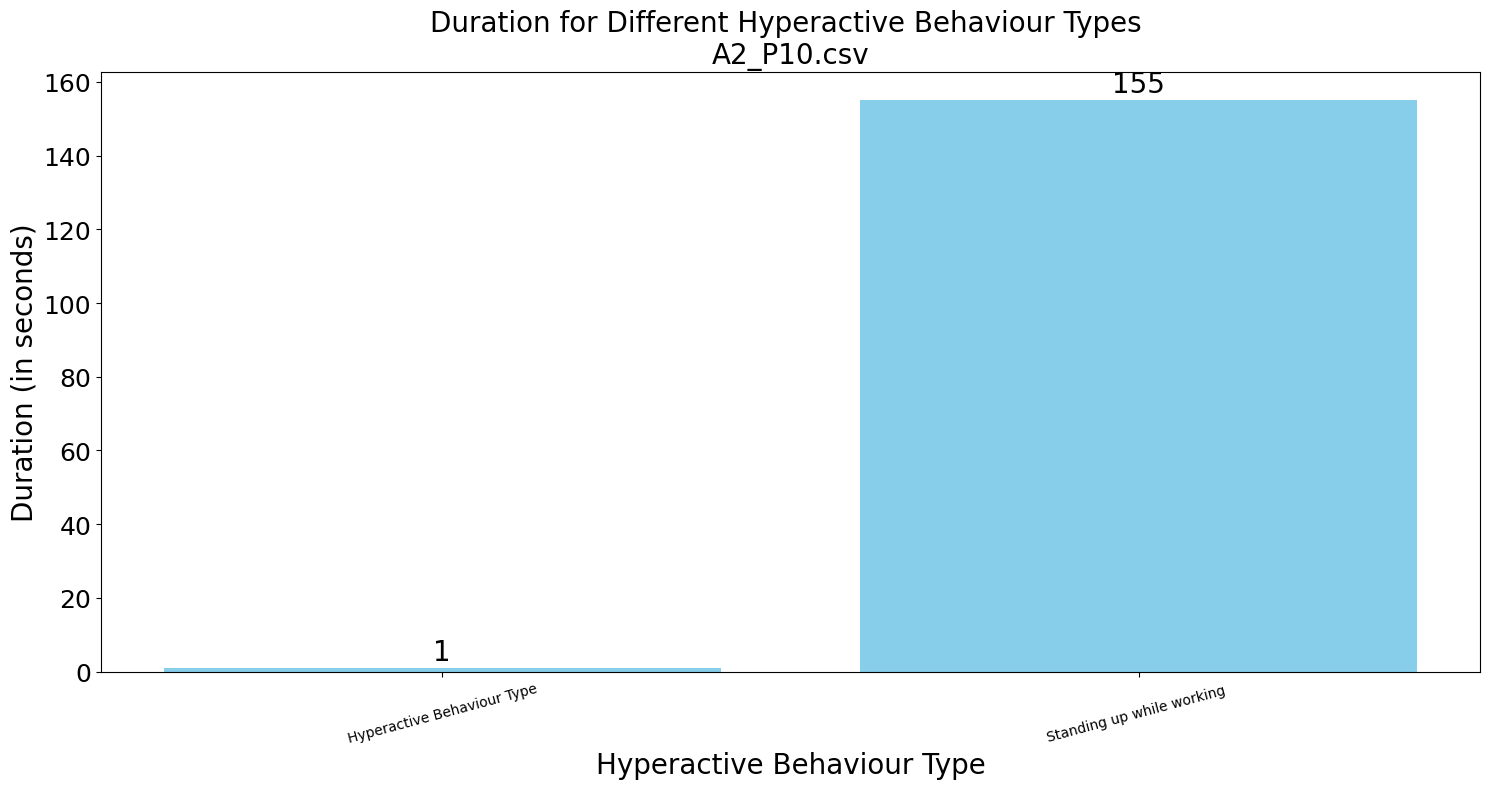

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A3_P15.csv


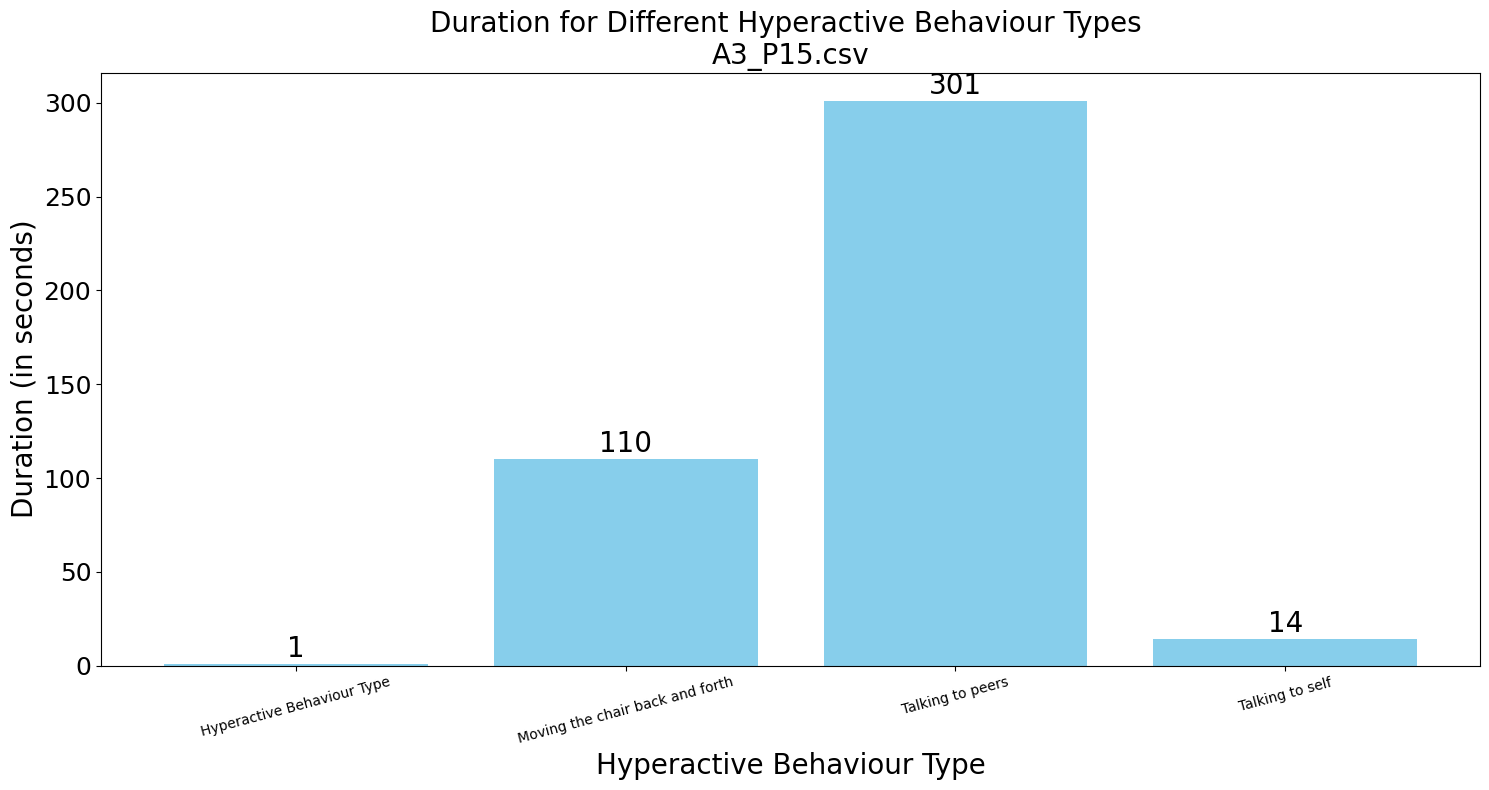

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A2_P5.csv


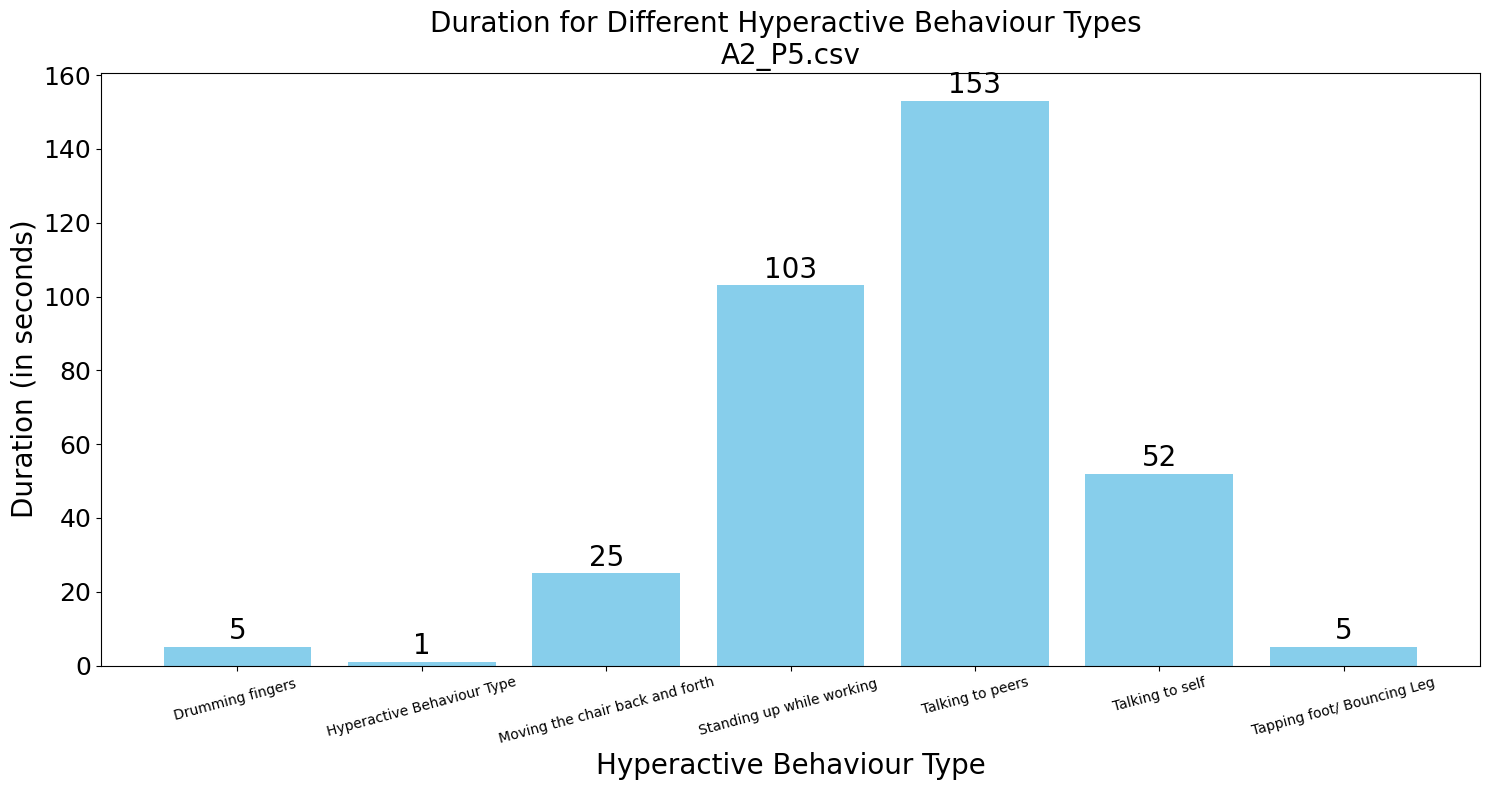

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A3_P14.csv


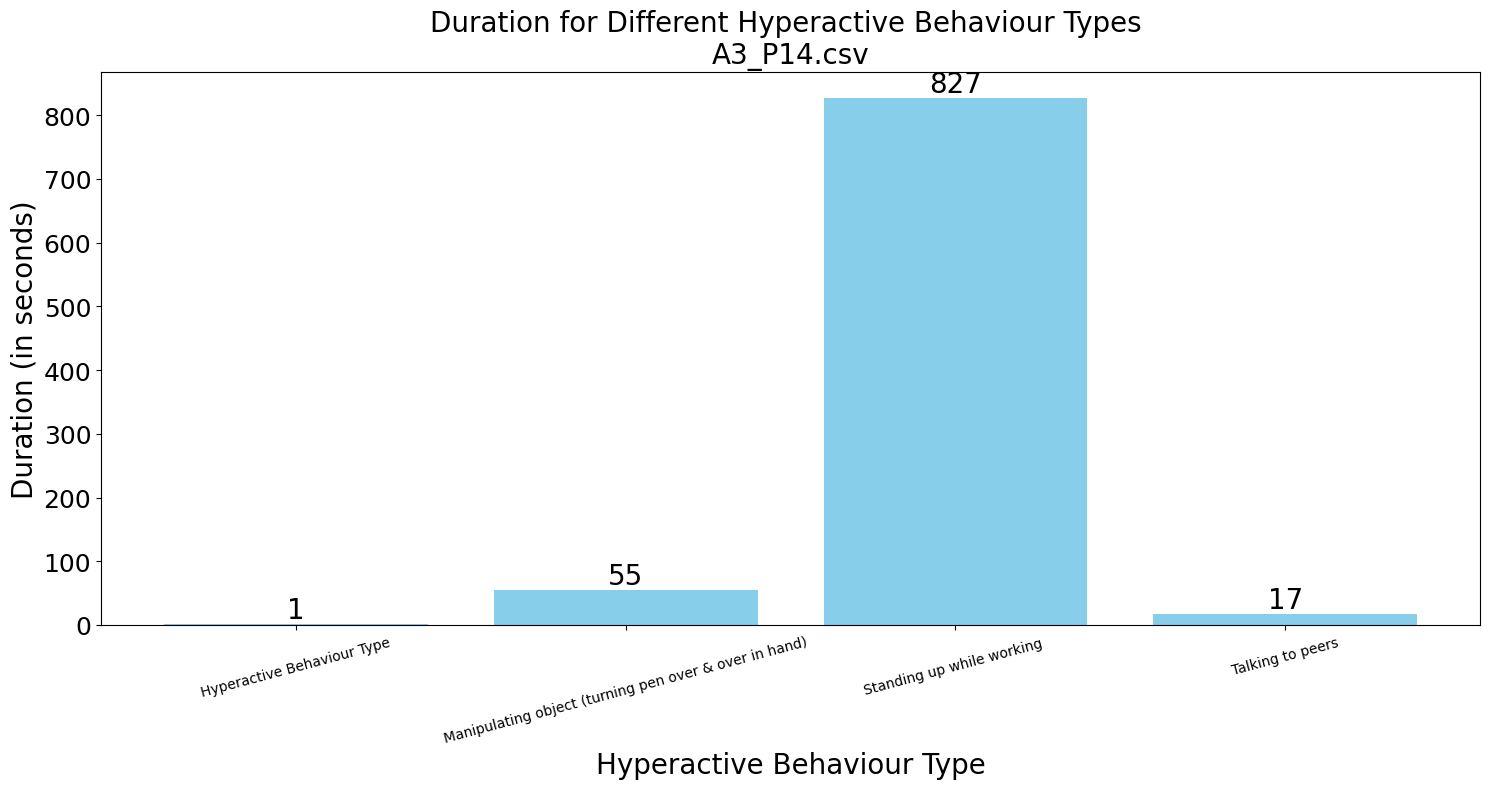

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A2_P11.csv


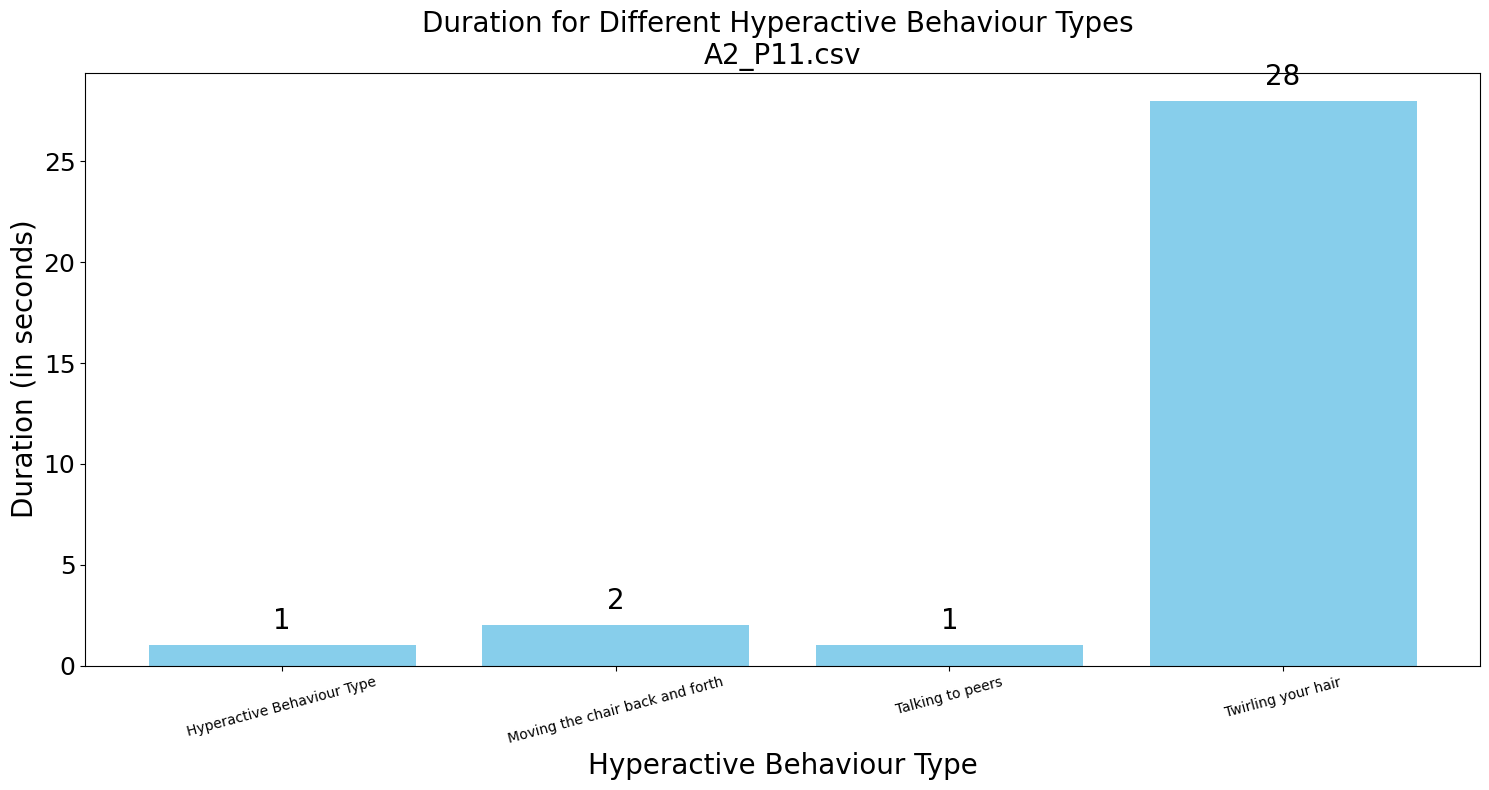

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A2_P15.csv


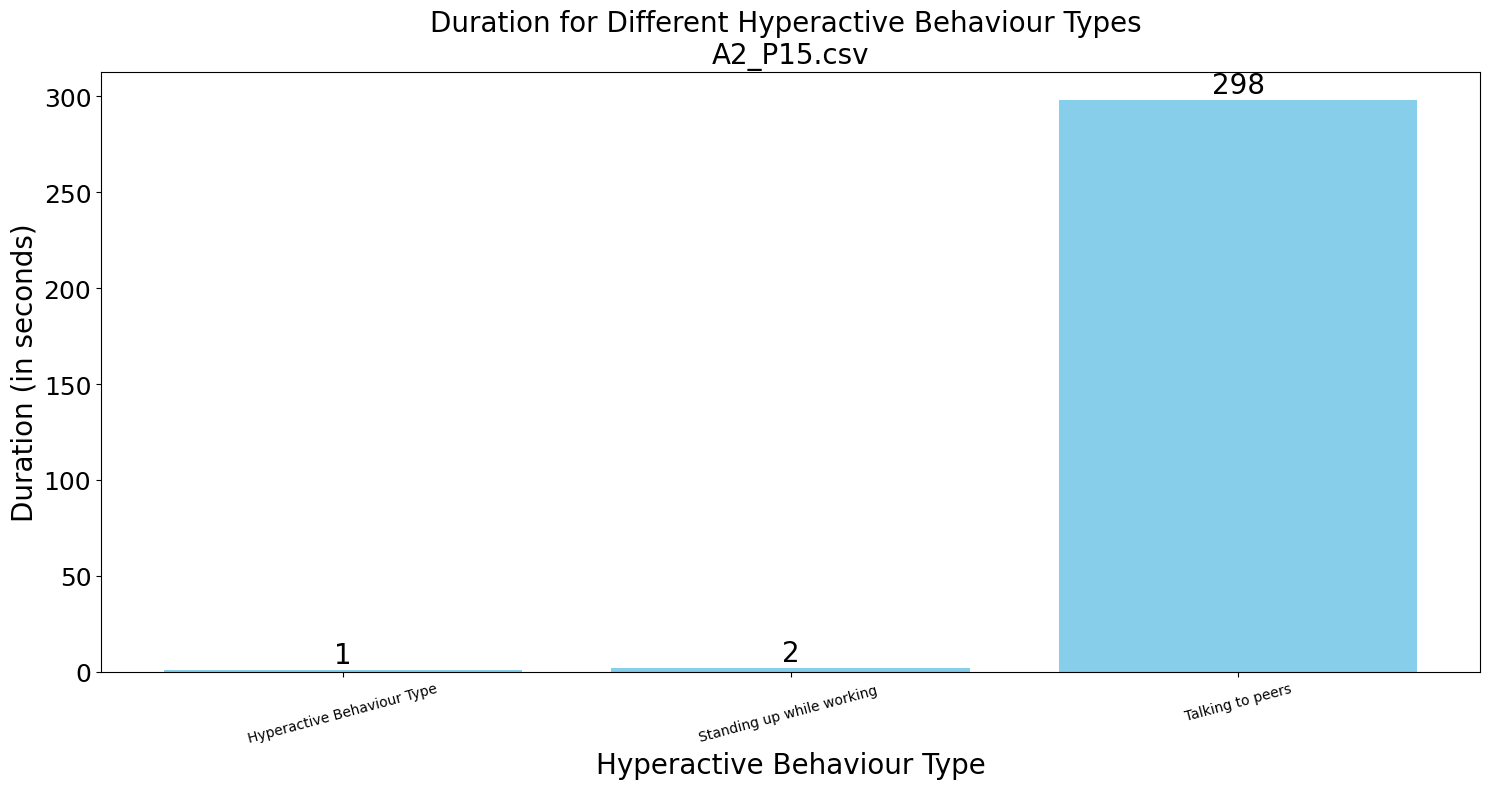

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A3_P10.csv


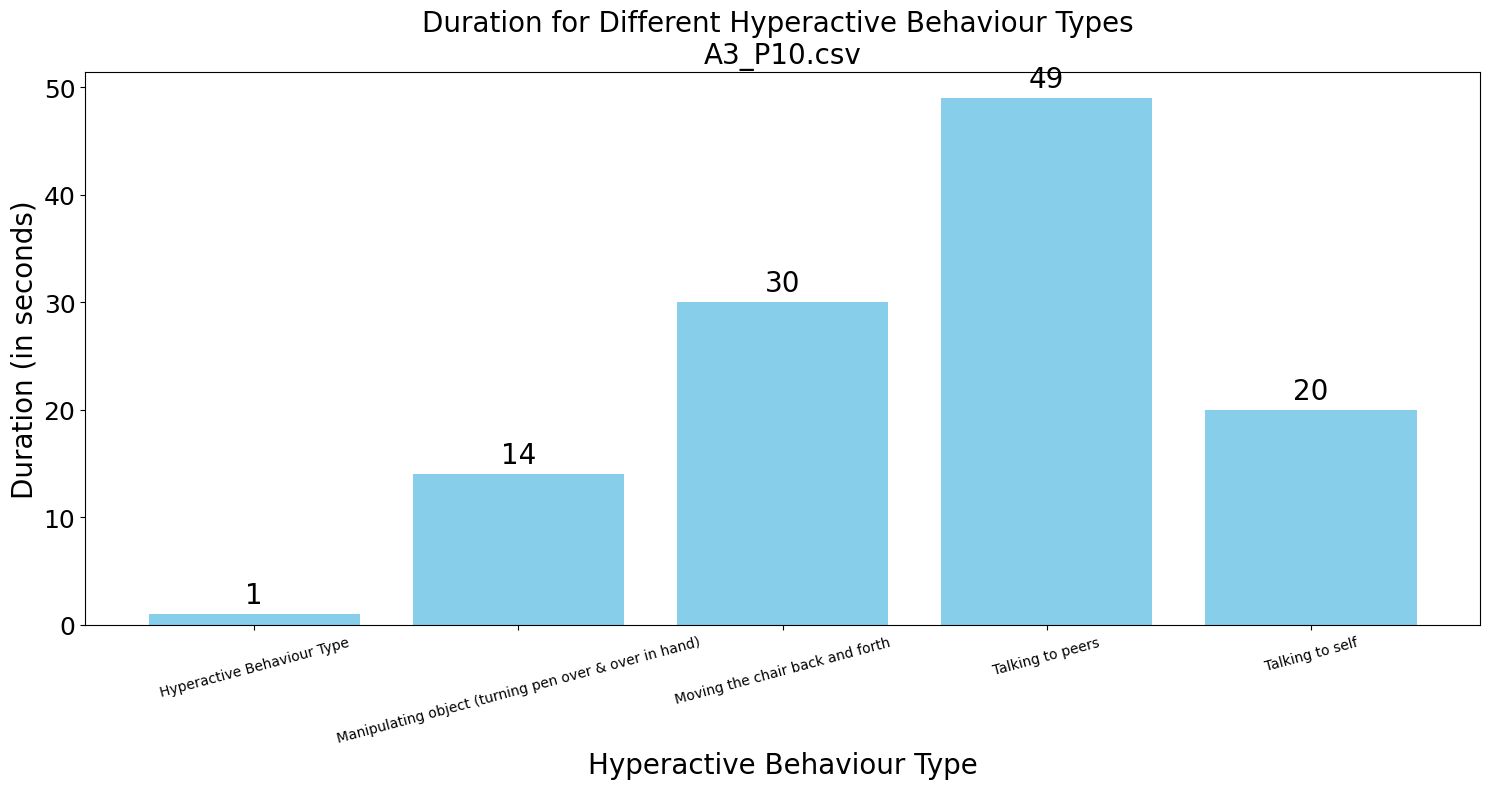

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A3_P11.csv


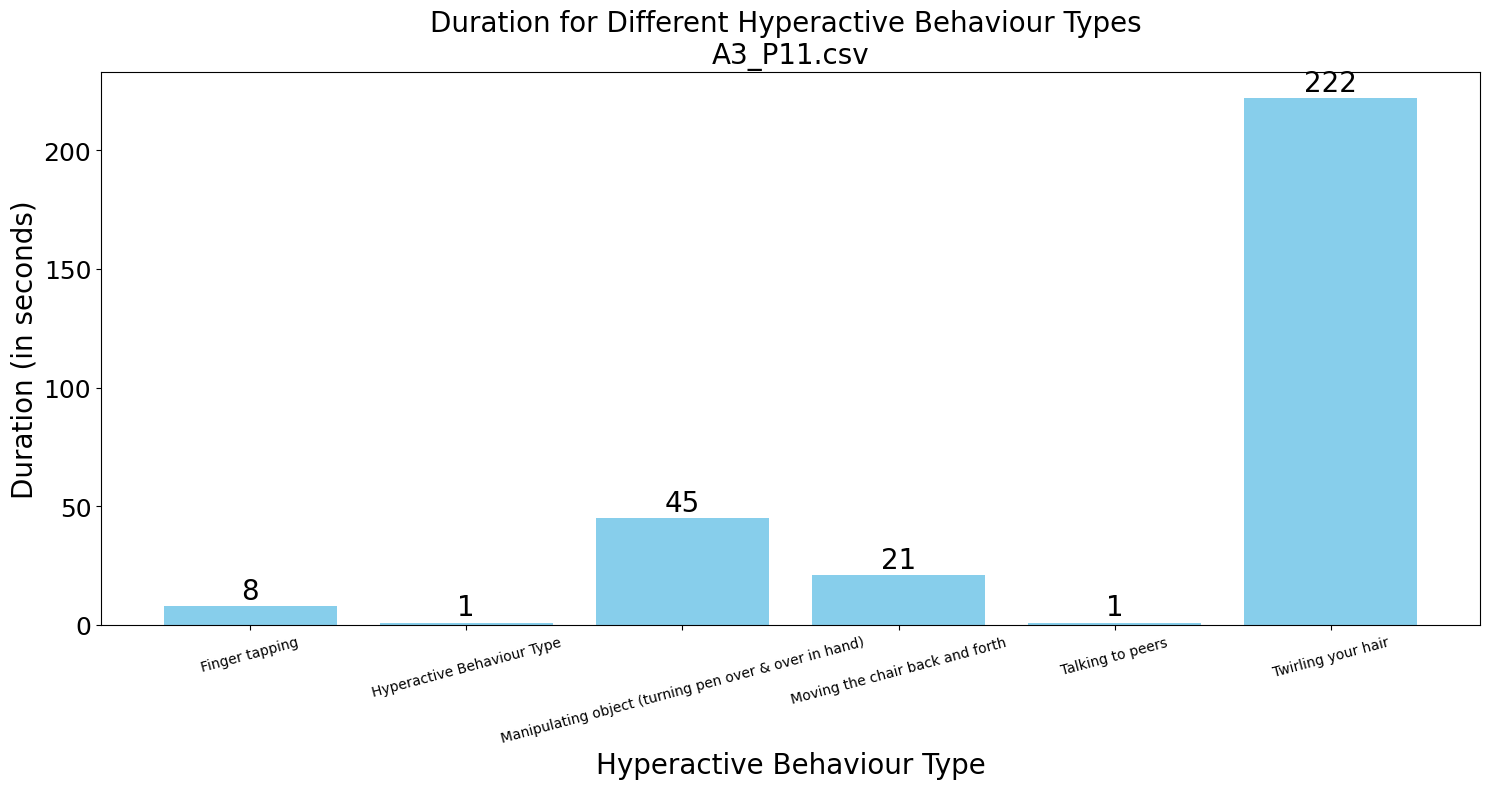

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A2_P14.csv


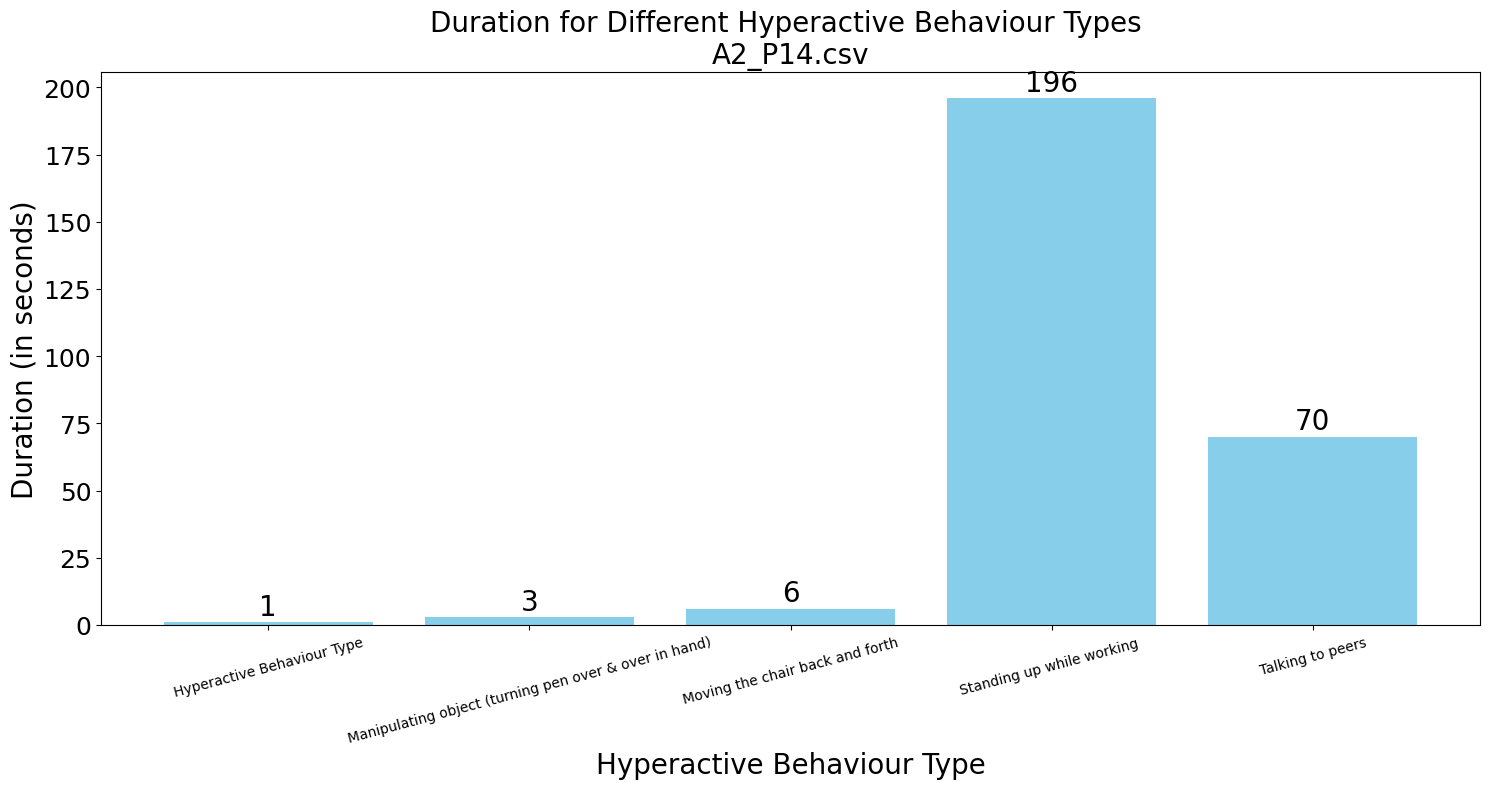

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A2_P16.csv


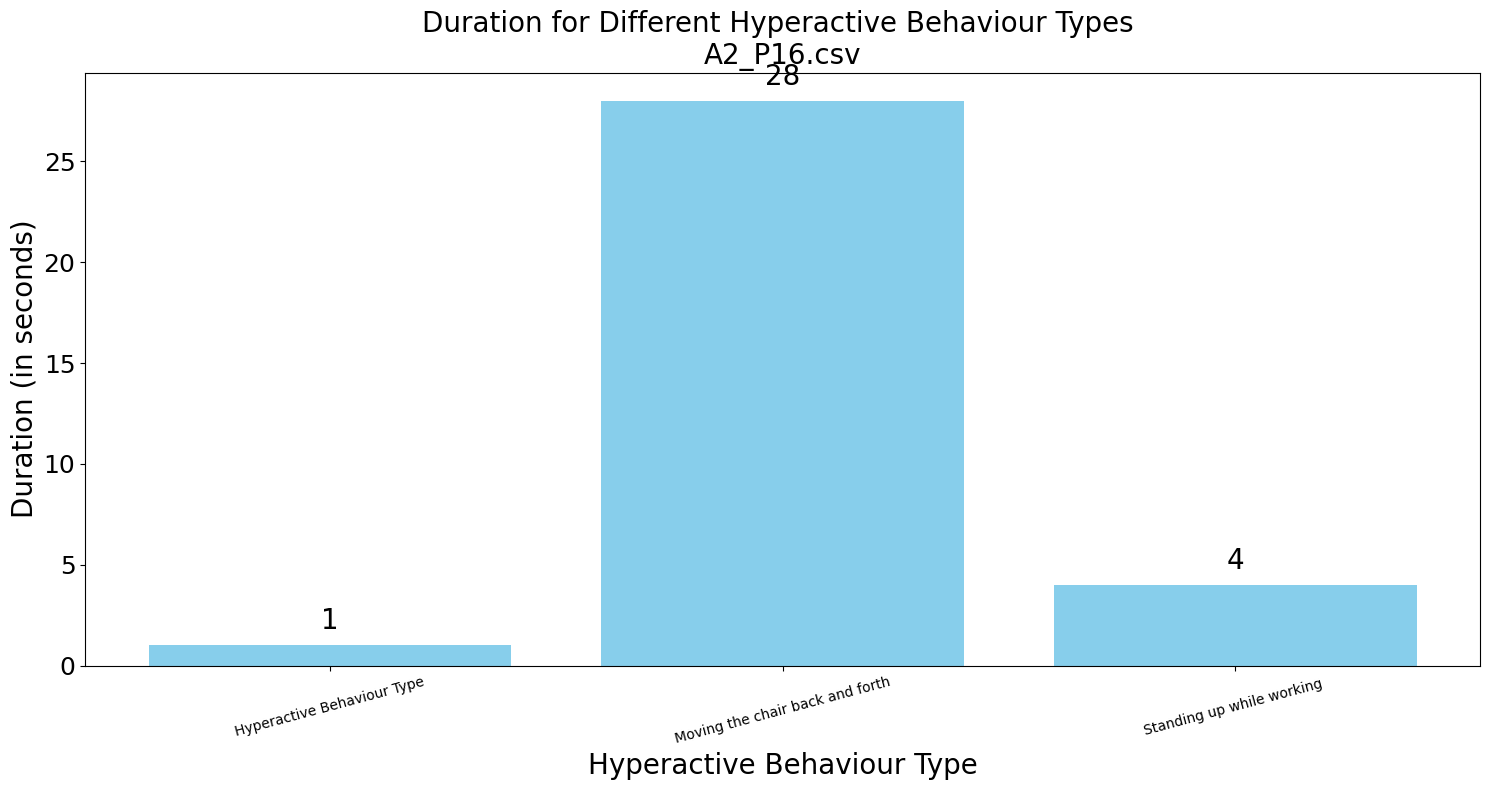

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A3_P13.csv


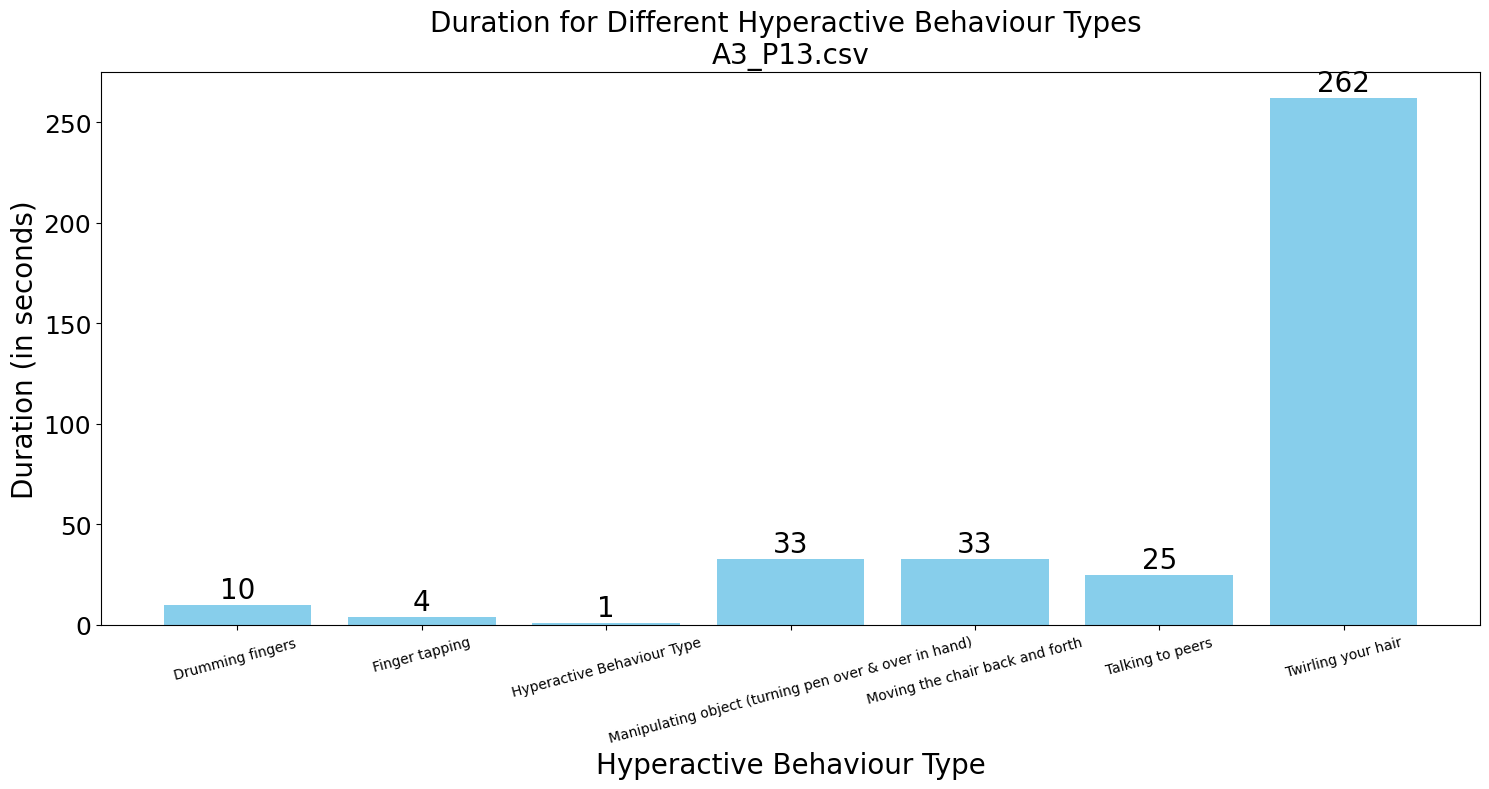

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A3_P12.csv


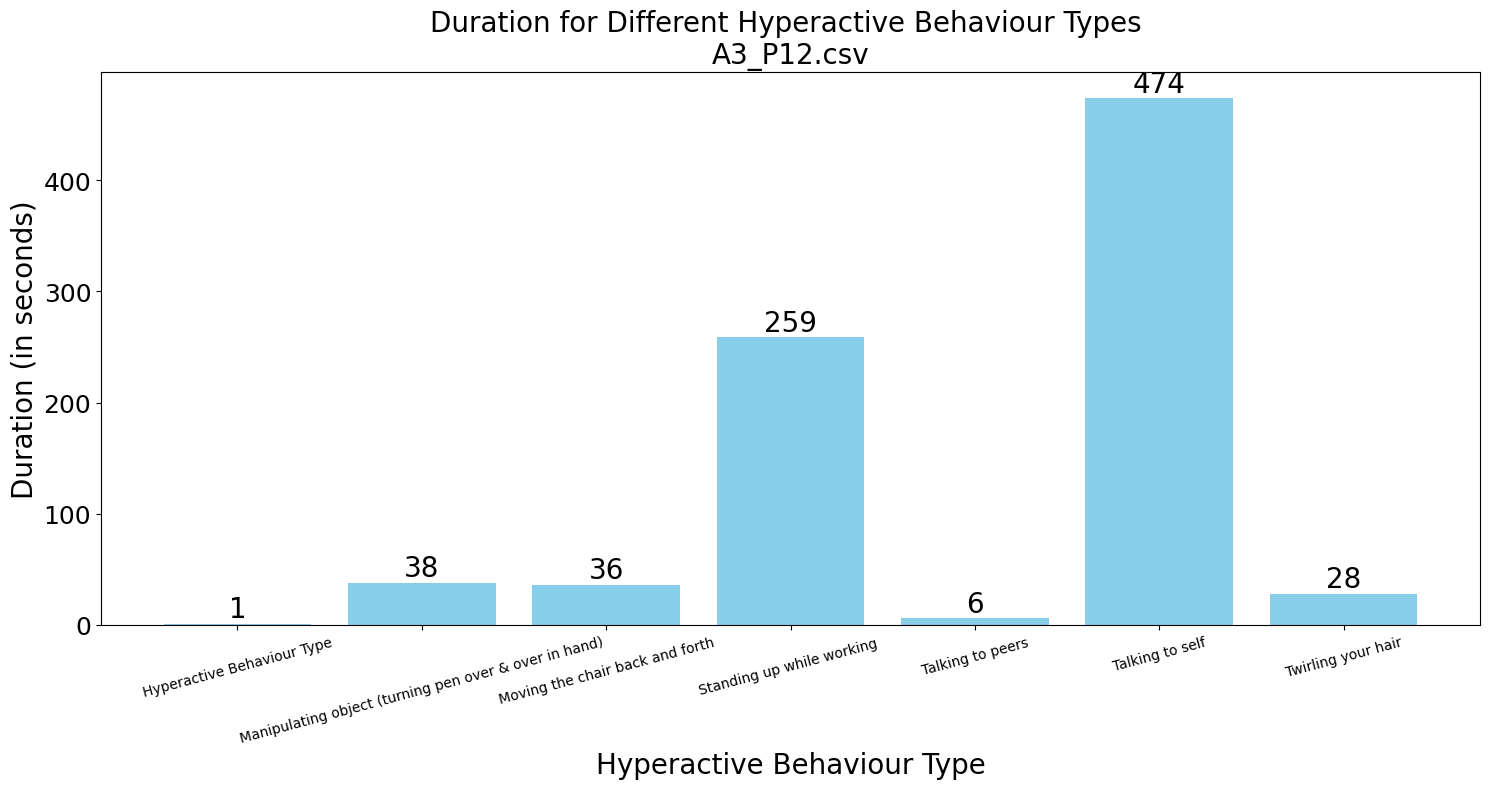

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A1_P9.csv


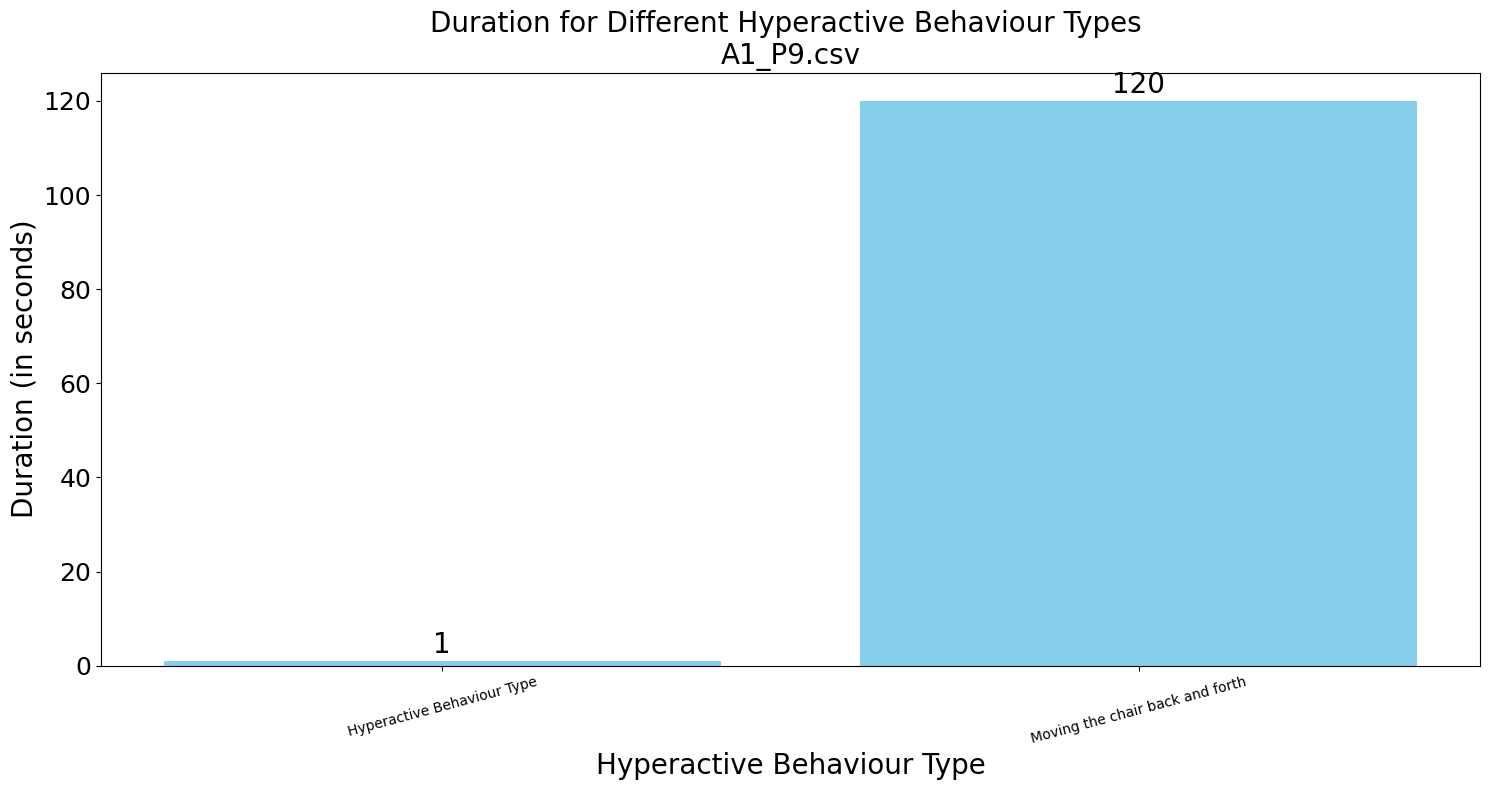

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A1_P10.csv


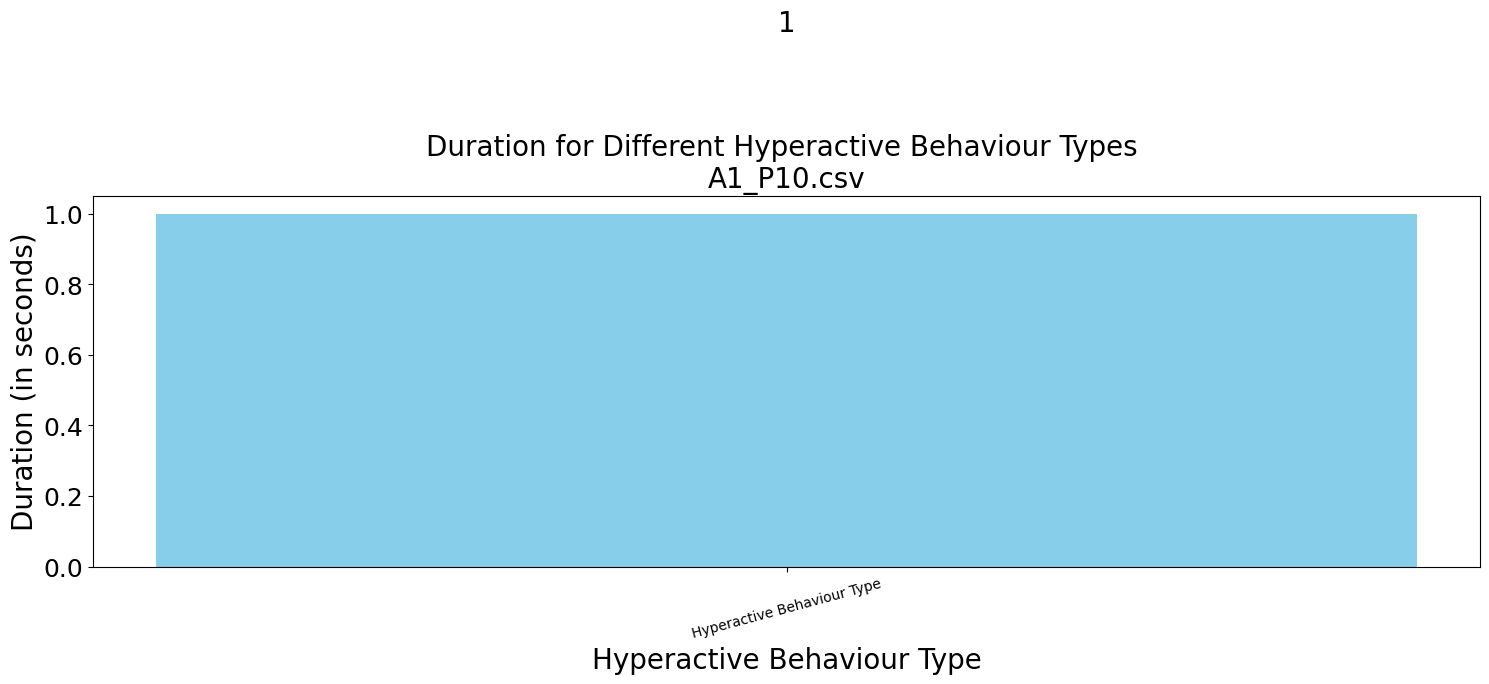

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A4_P5.csv


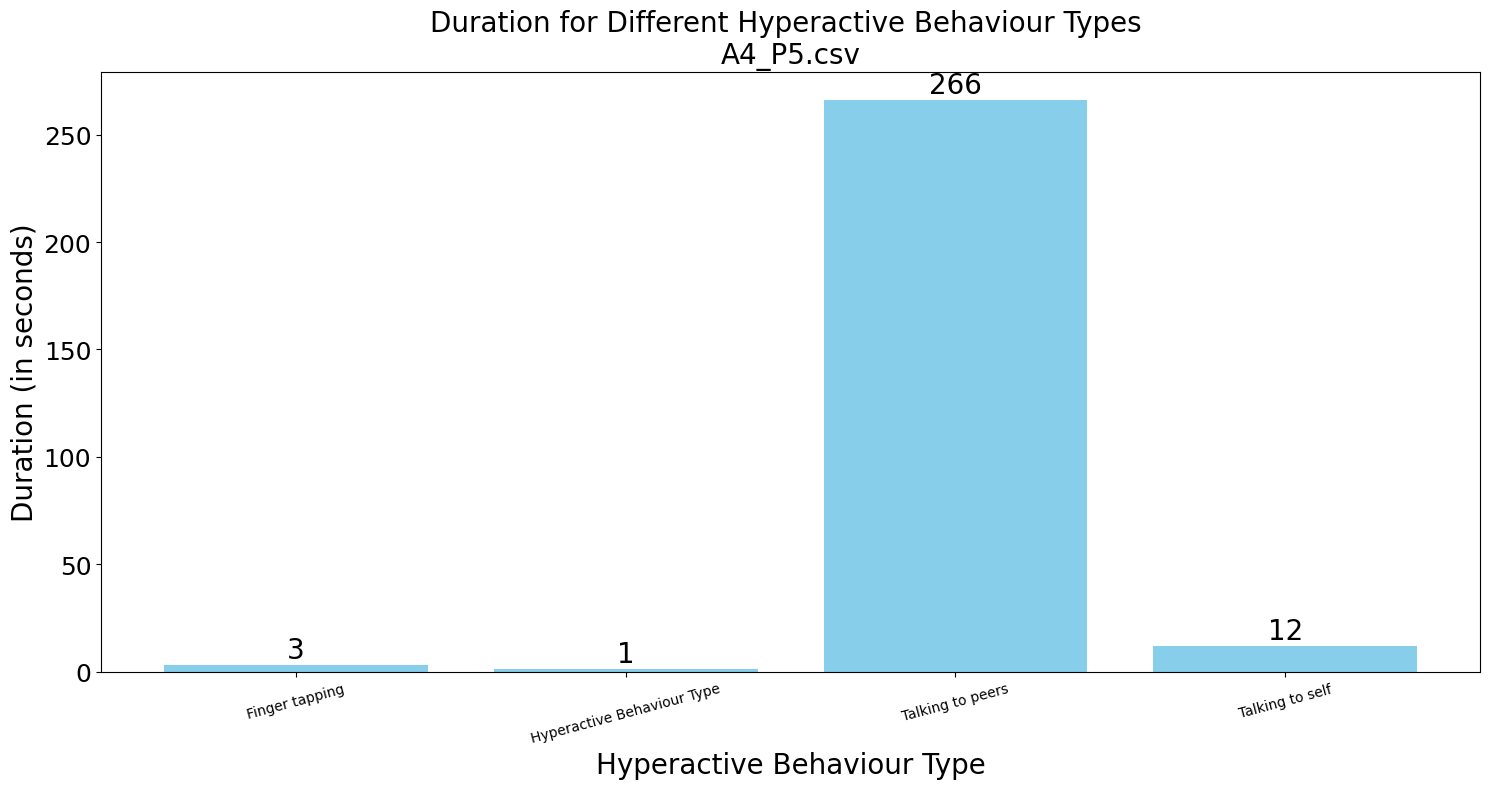

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A1_P11.csv


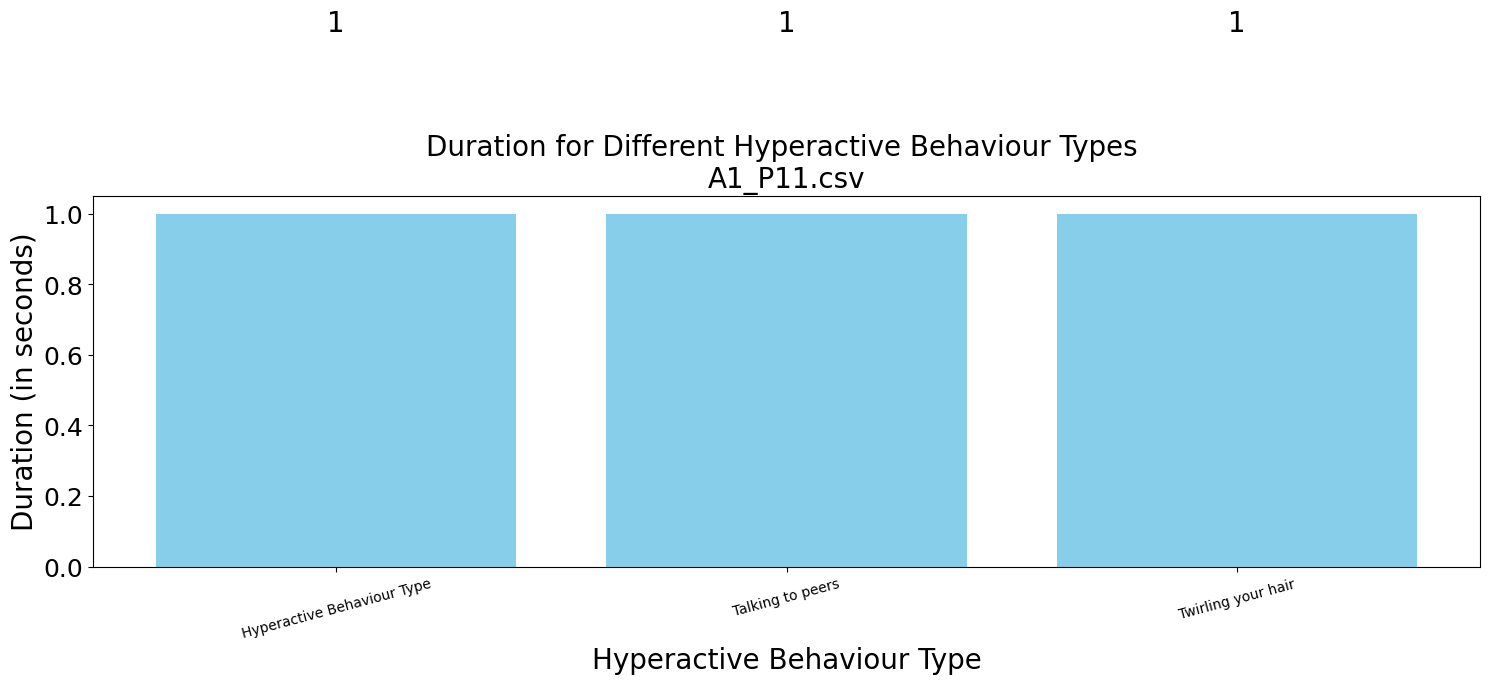

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A1_P8.csv


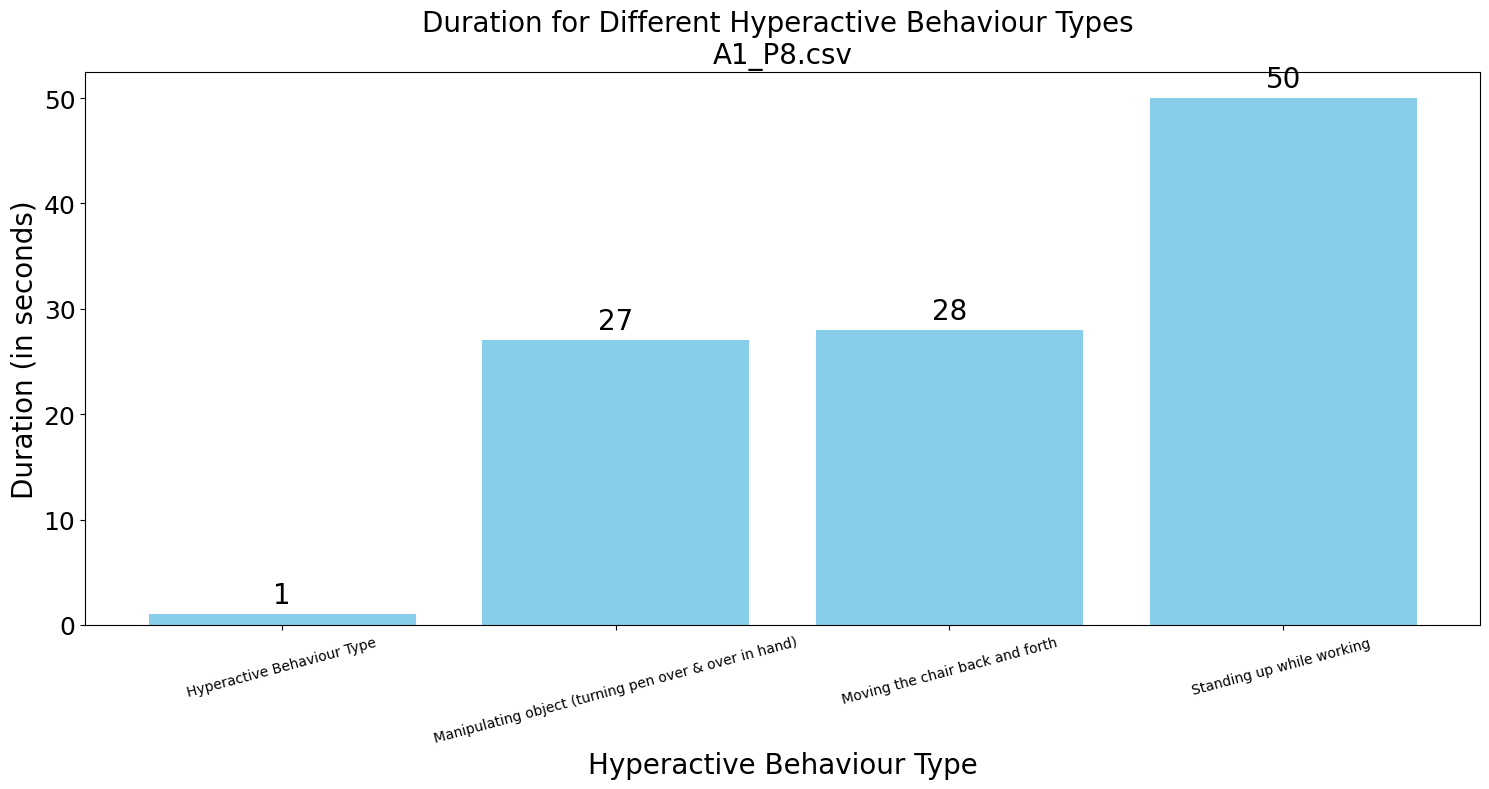

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A4_P22.csv


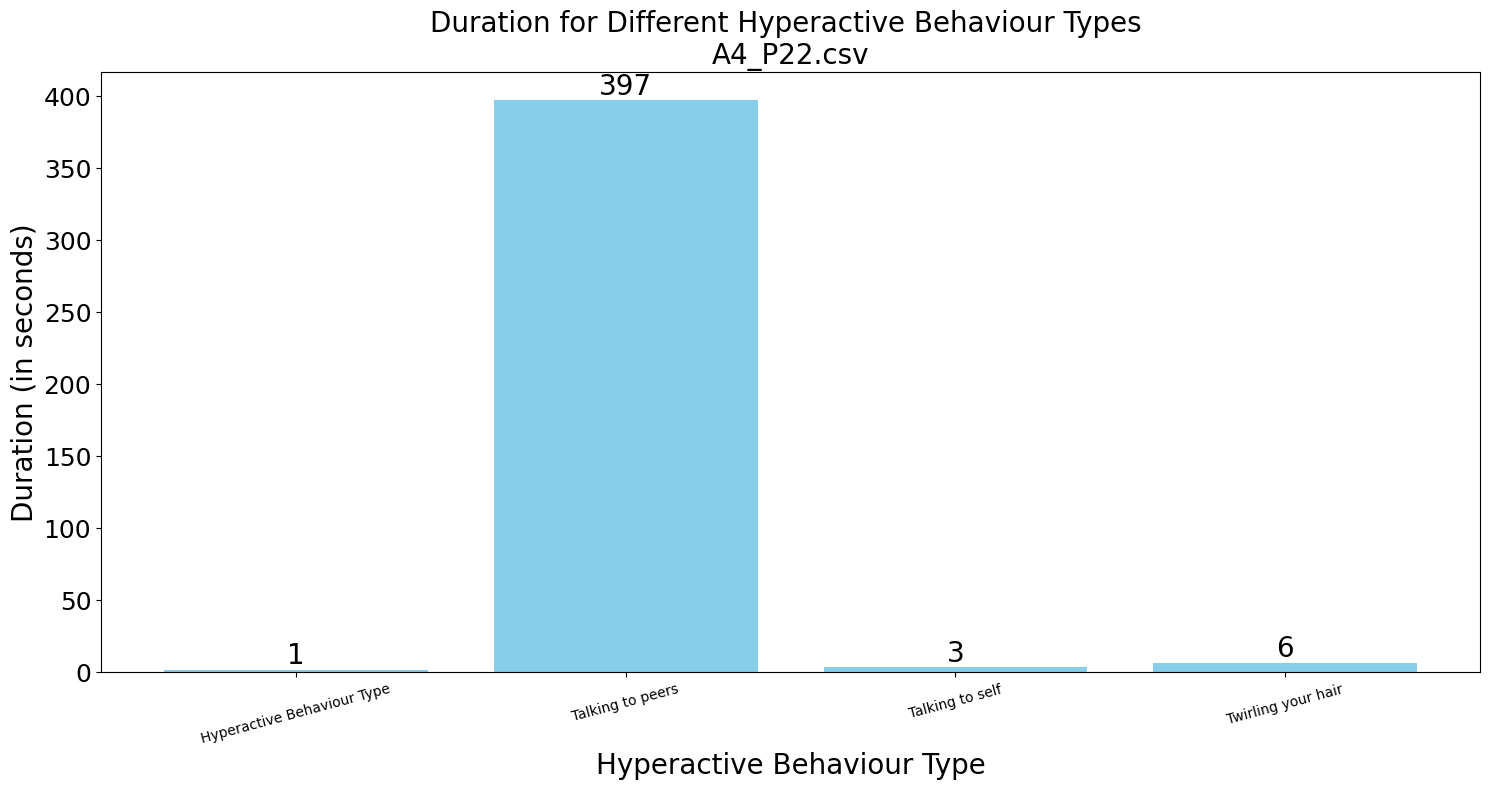

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A1_P13.csv


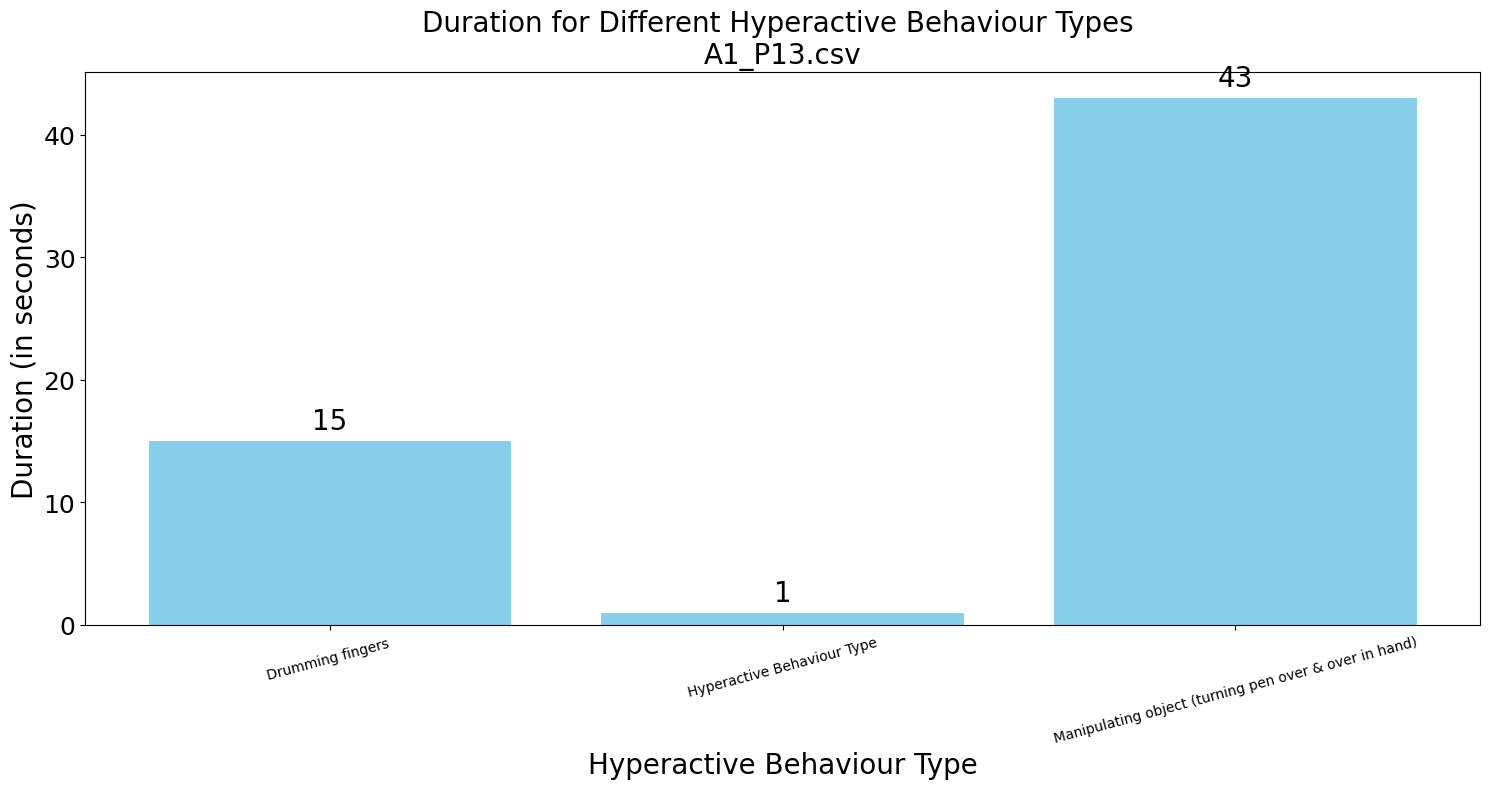

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A4_P6.csv


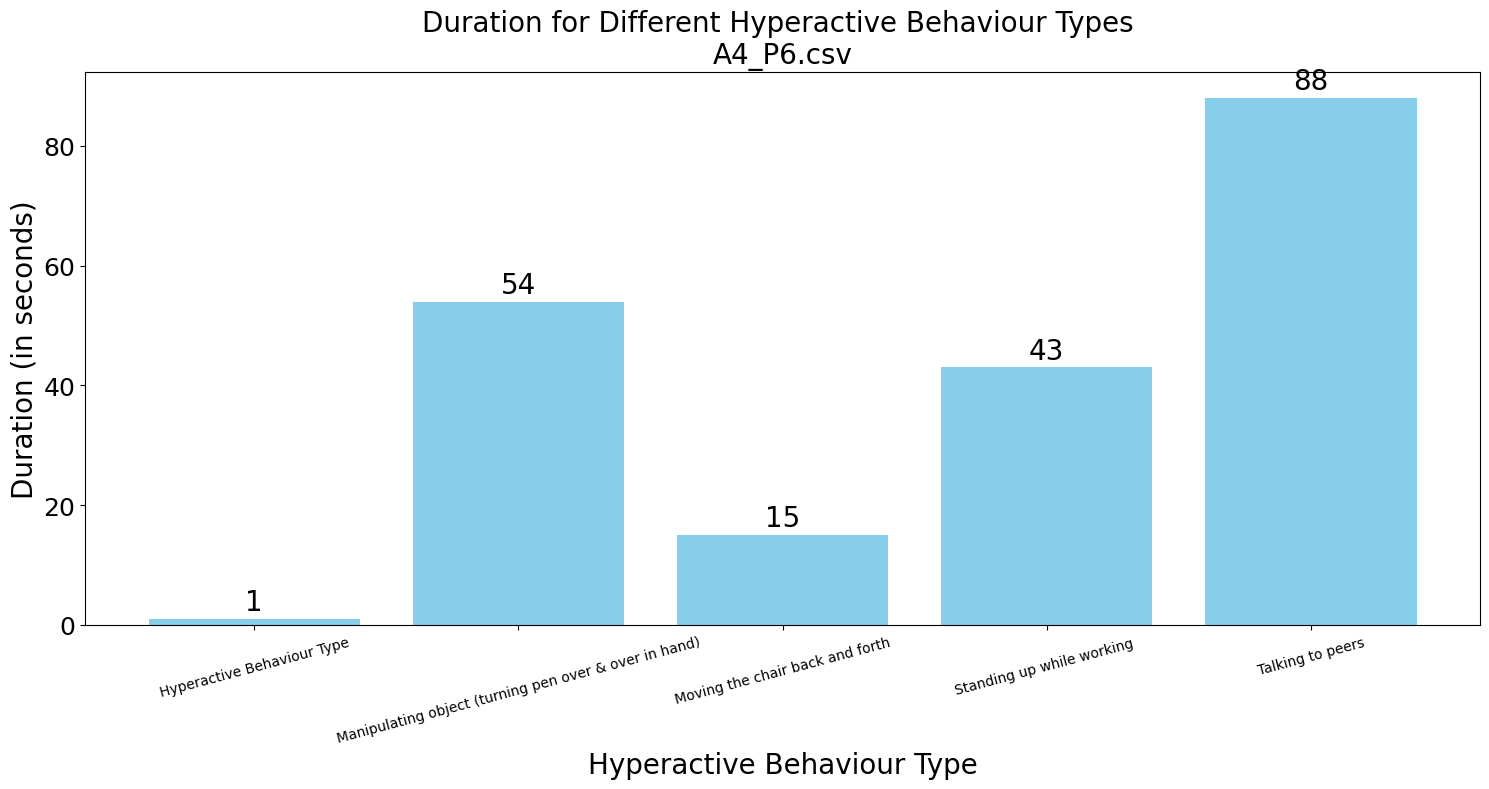

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A4_P7.csv


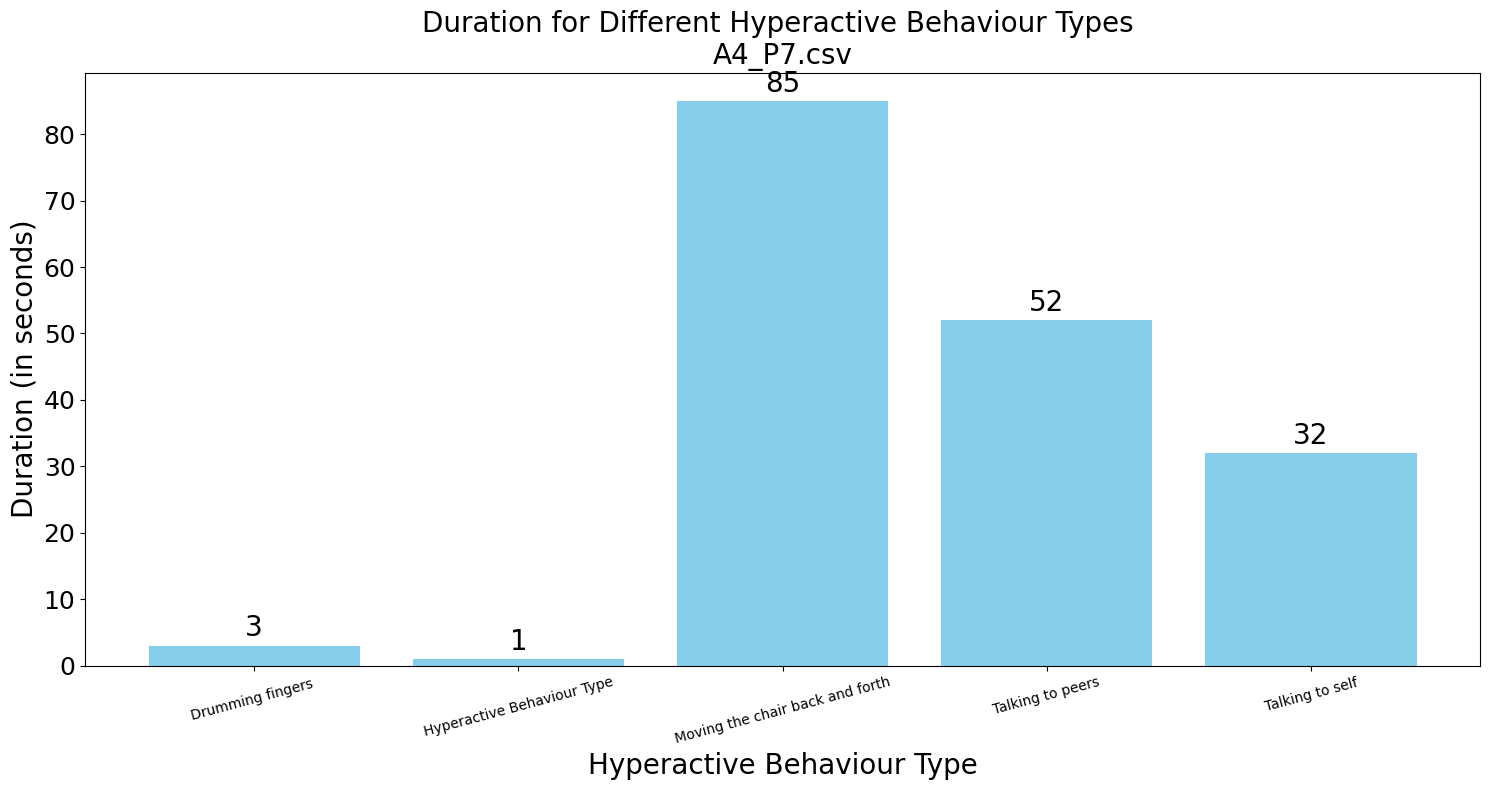

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A1_P12.csv


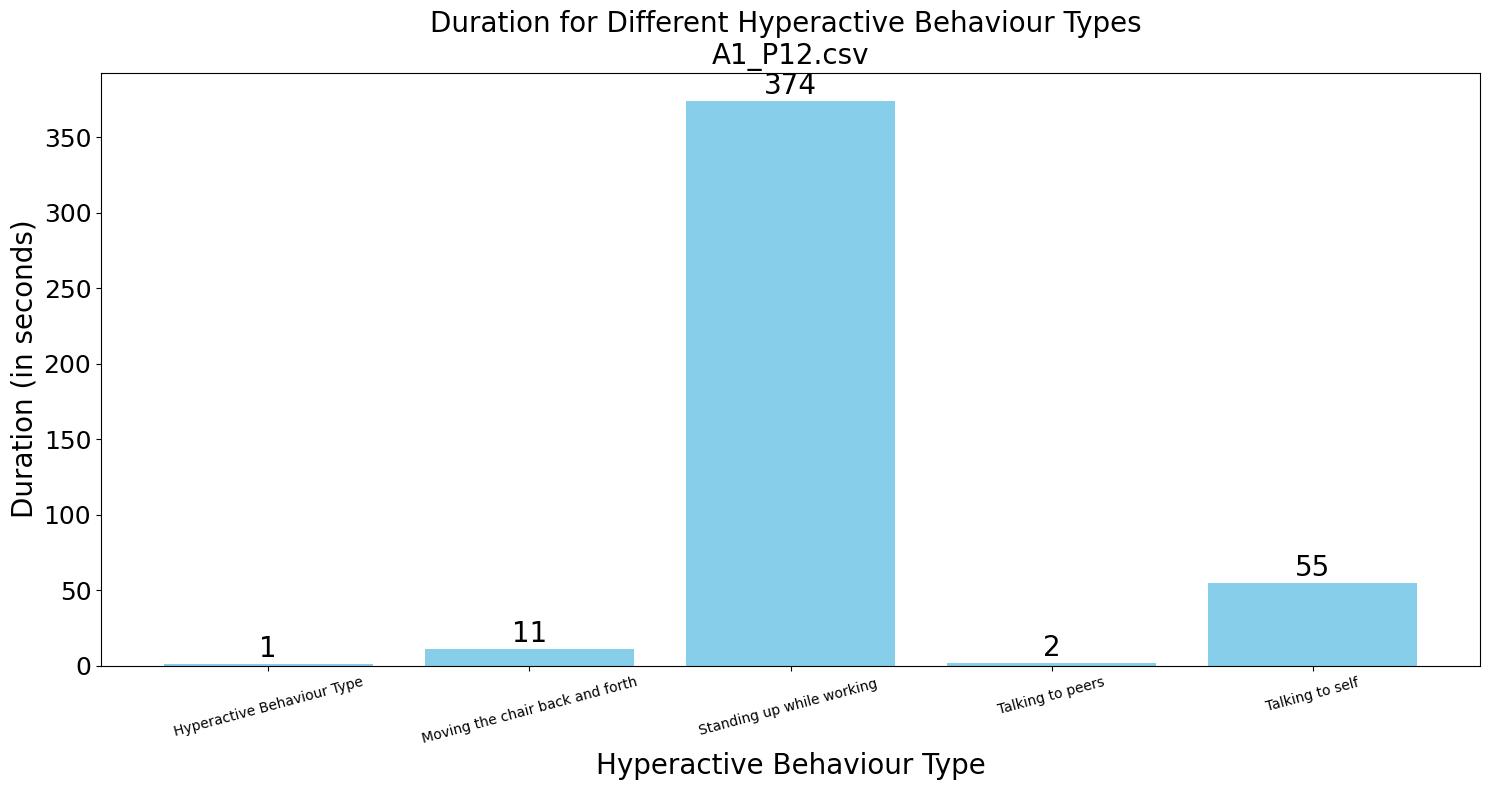

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A4_P23.csv


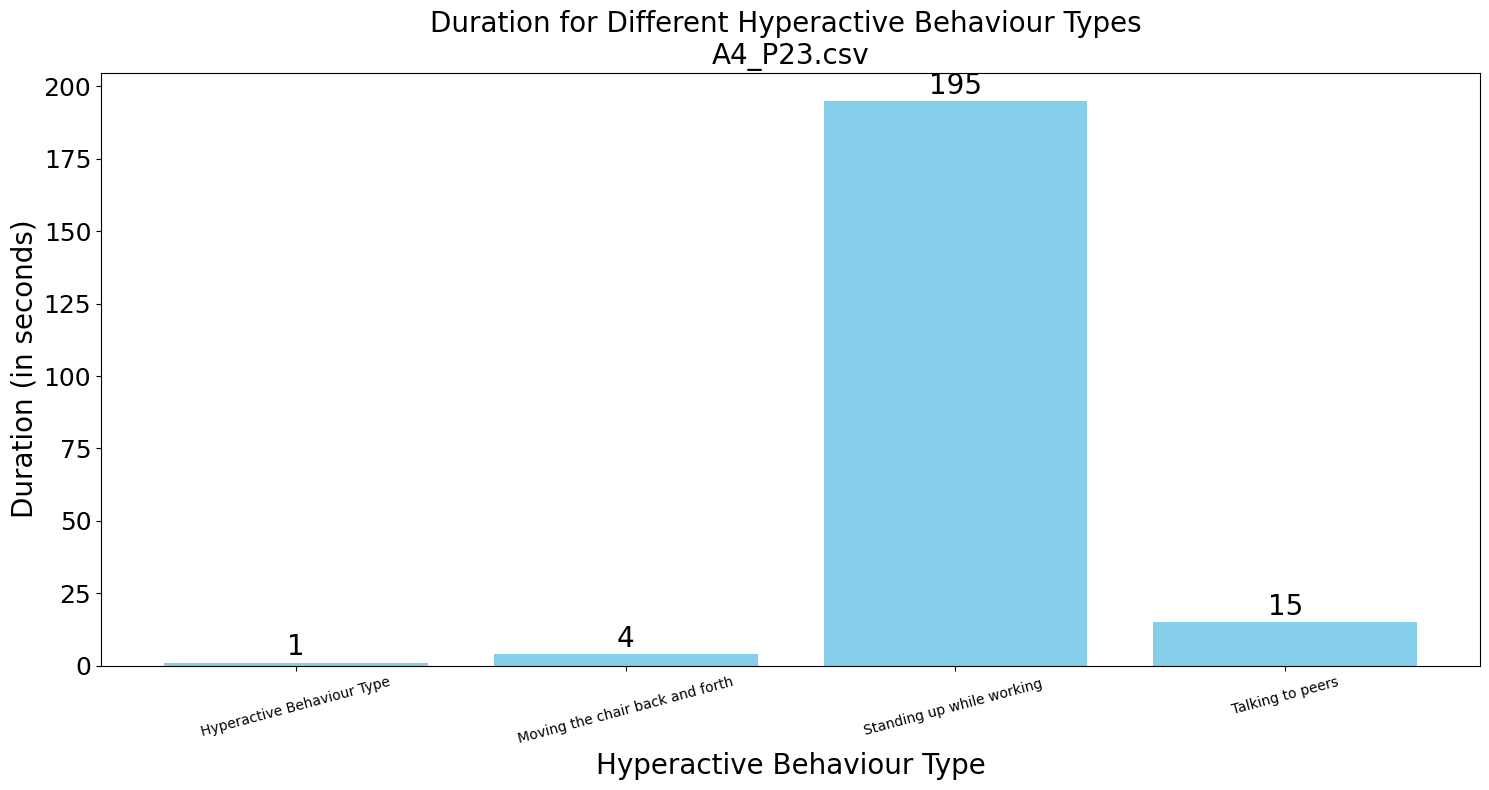

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A1_P16.csv


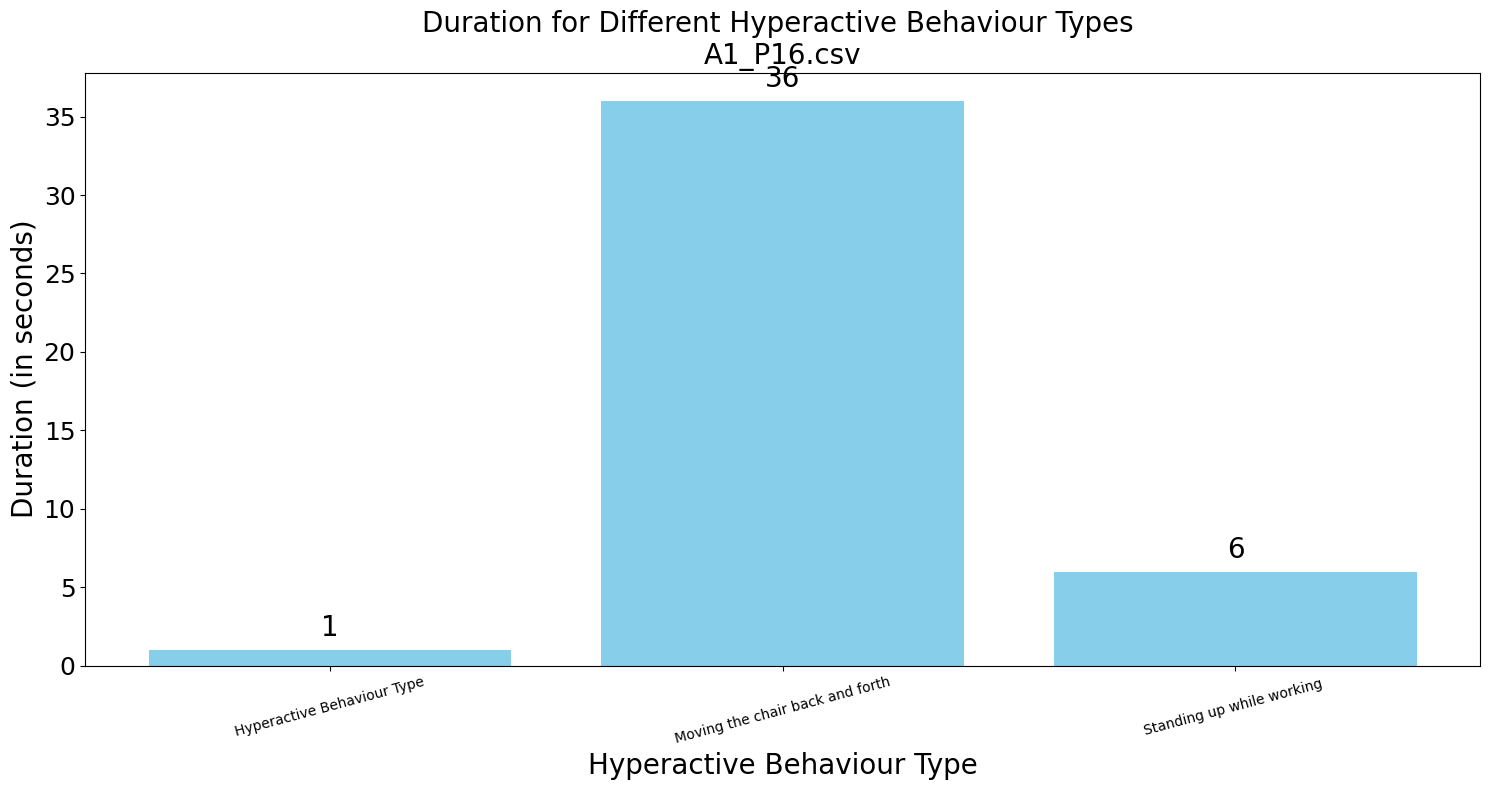

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A1 _P19.csv


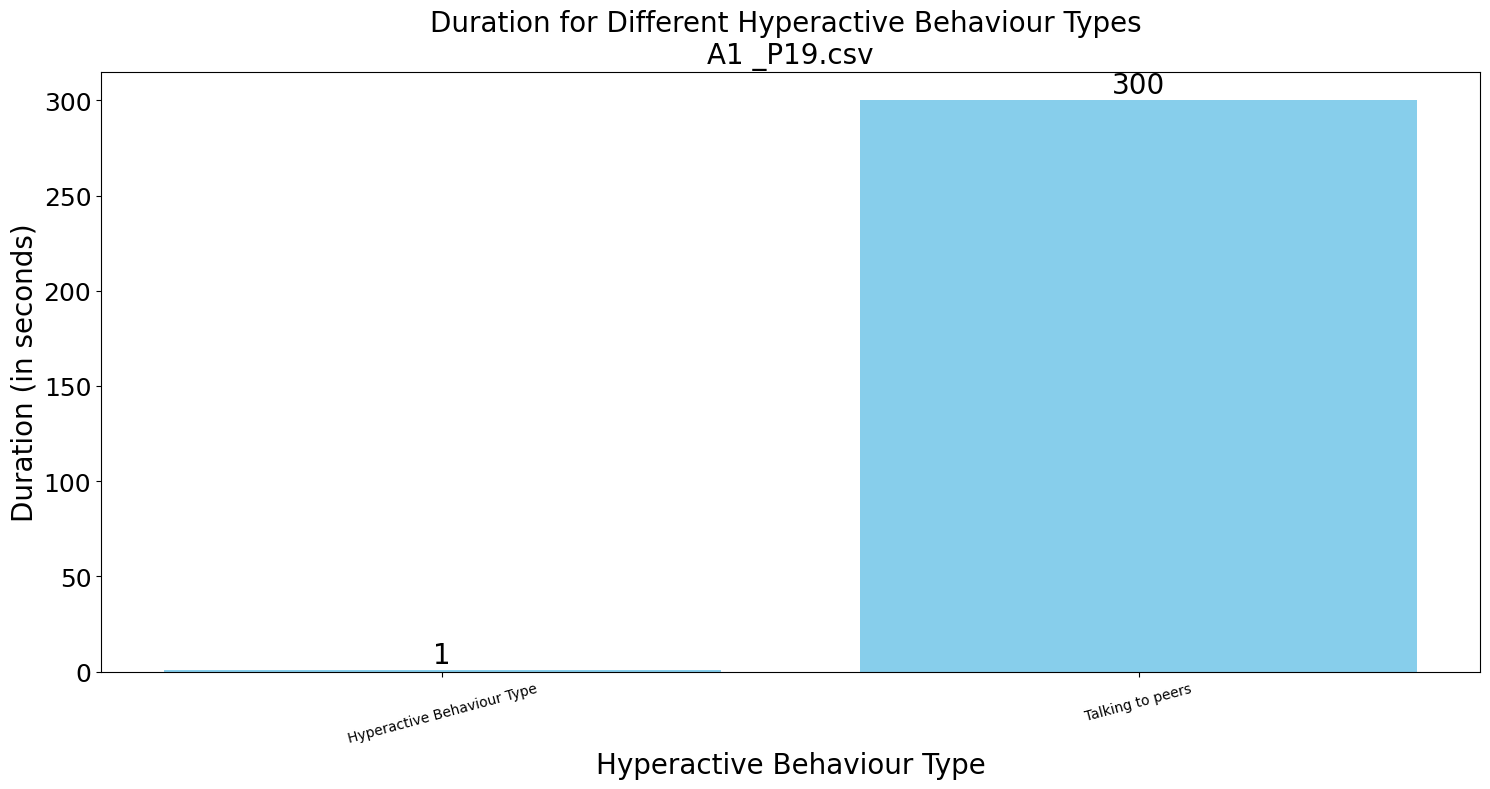

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A4_P18.csv


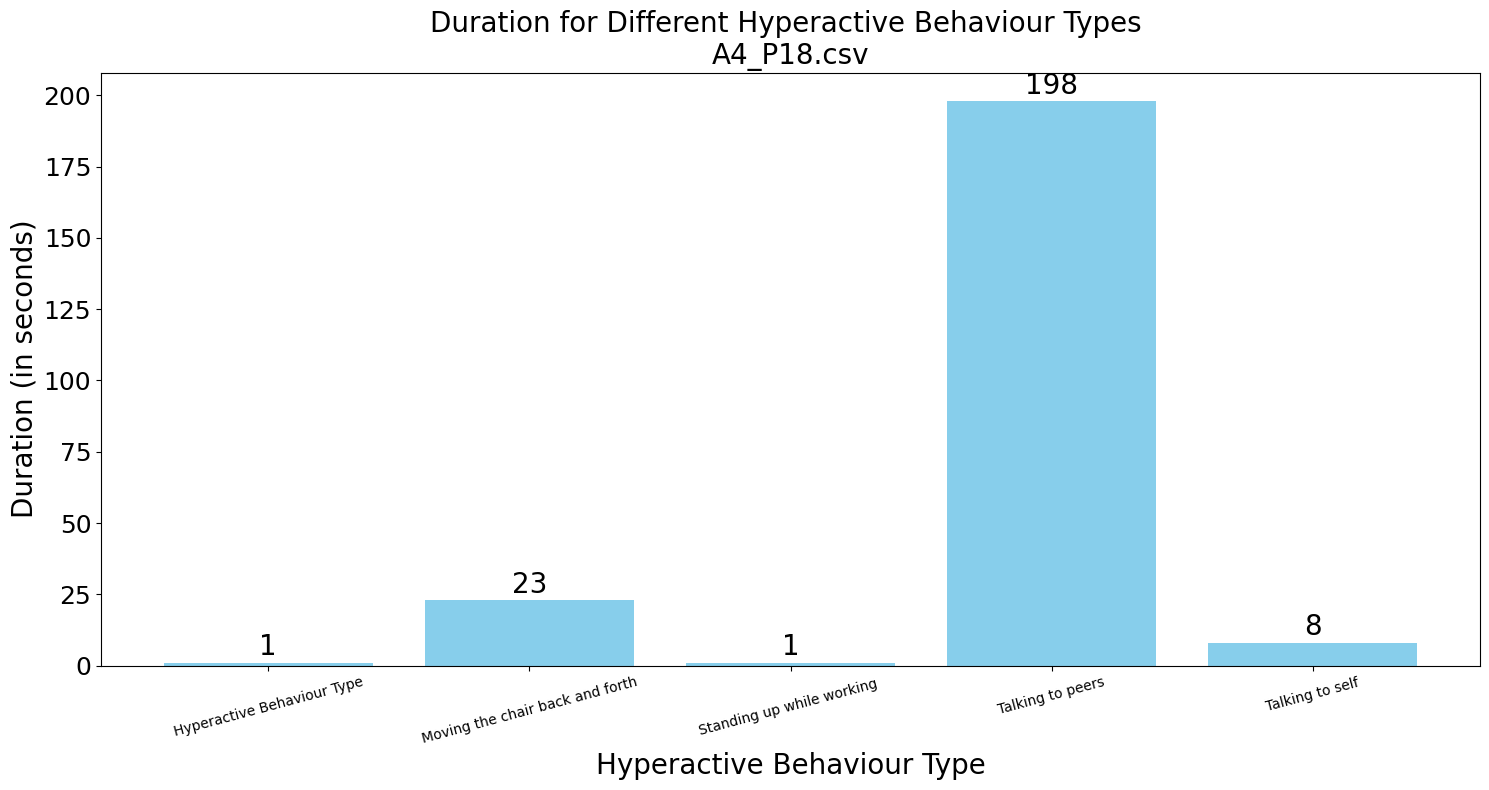

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A4_P24.csv


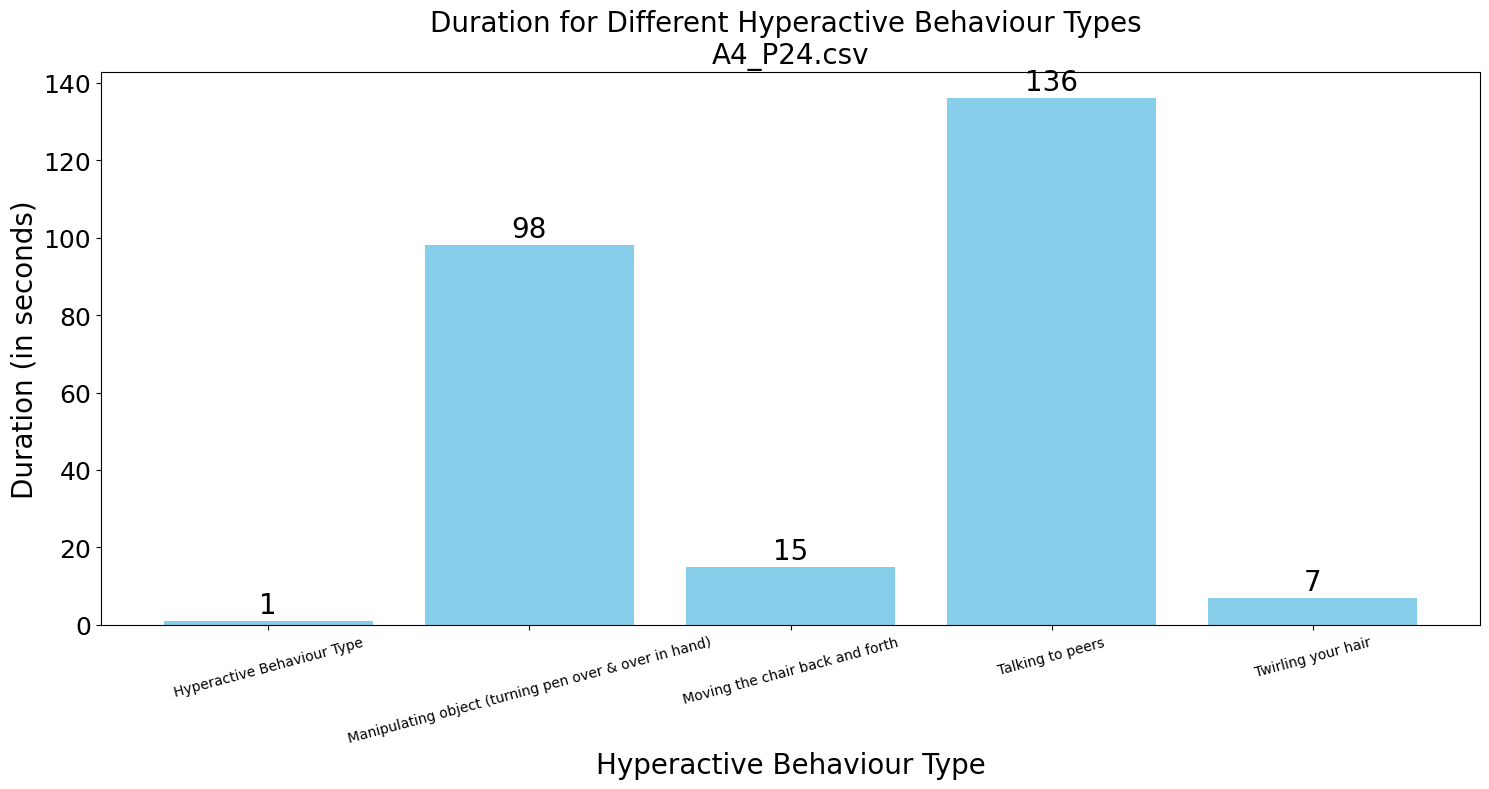

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A1_P15.csv


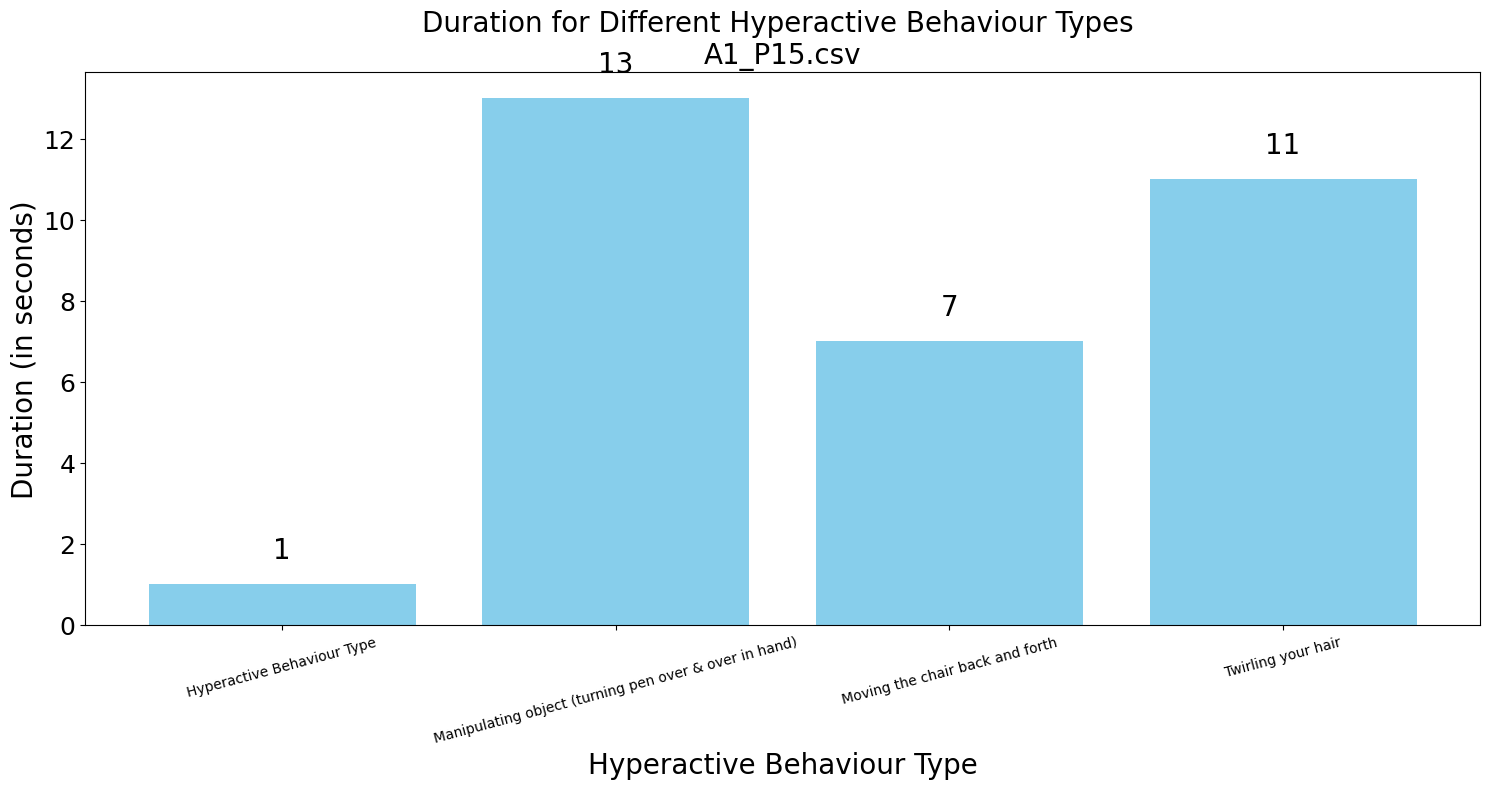

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A3_P9.csv


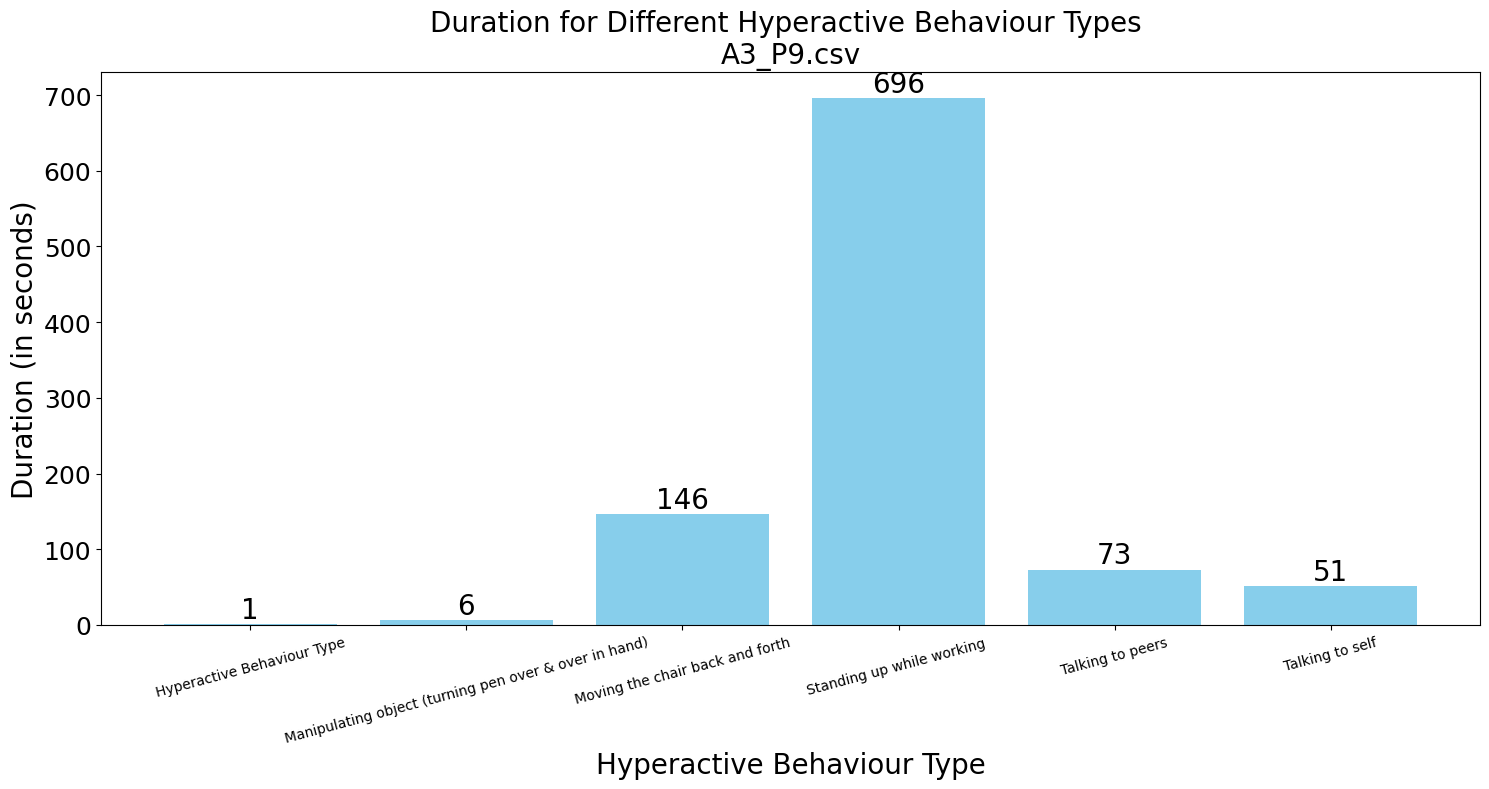

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A3_P8.csv


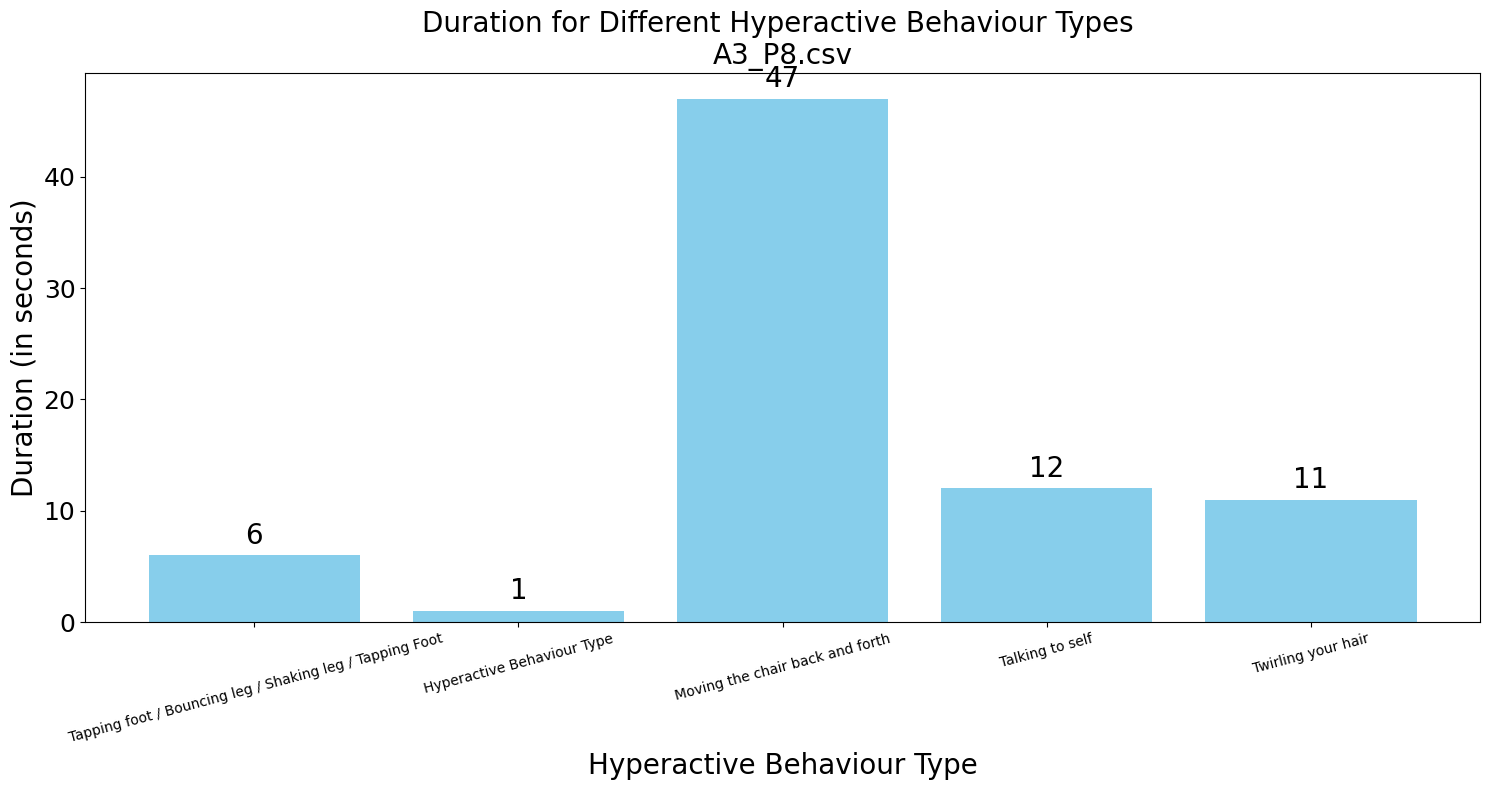

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A1_P14.csv


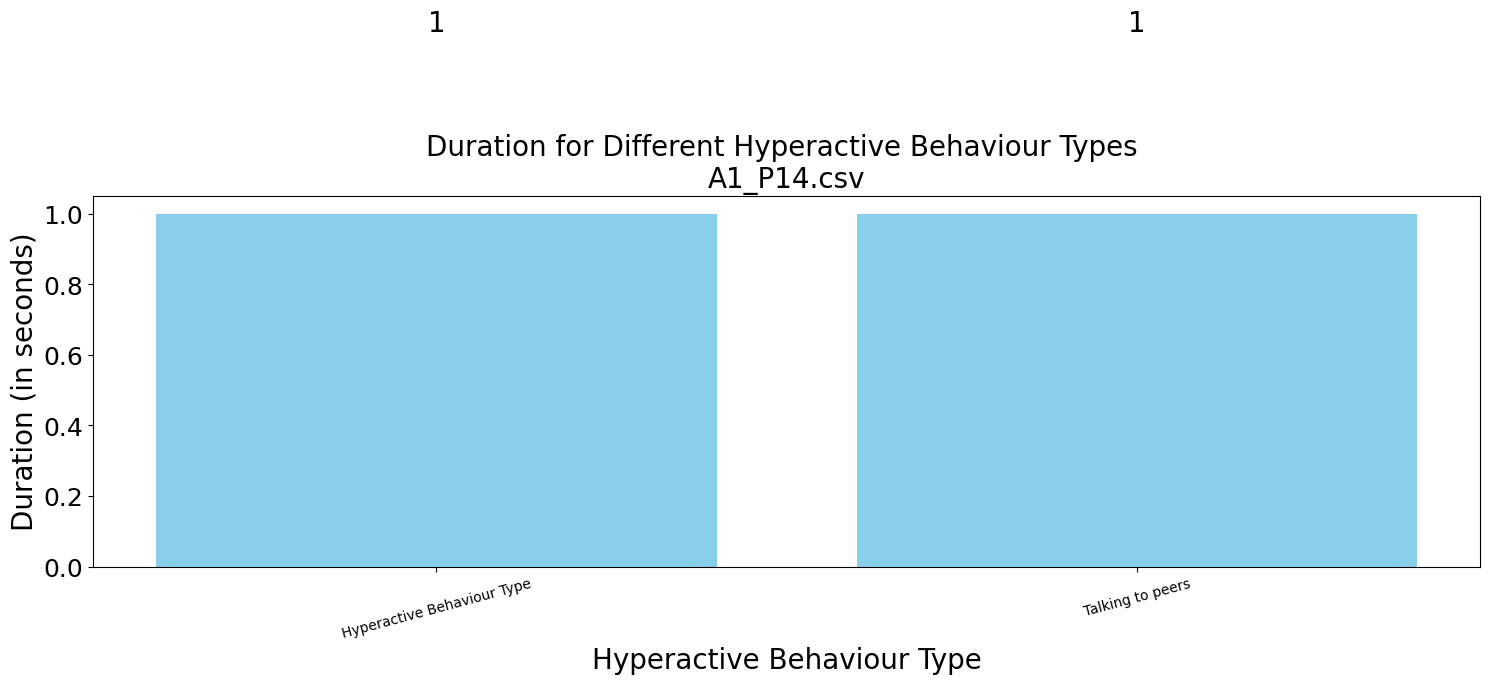

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A4_P14.csv


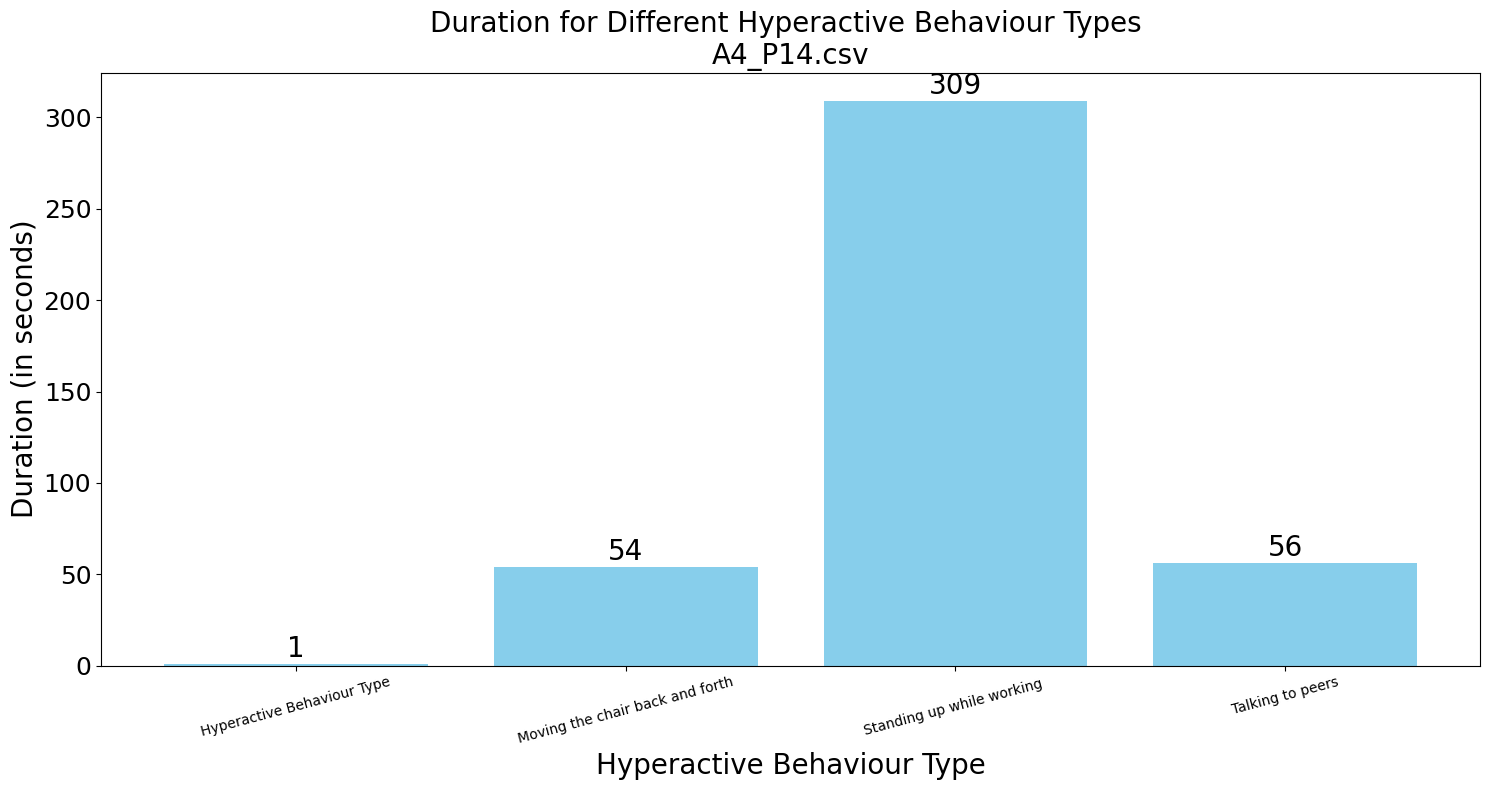

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A3_P5.csv


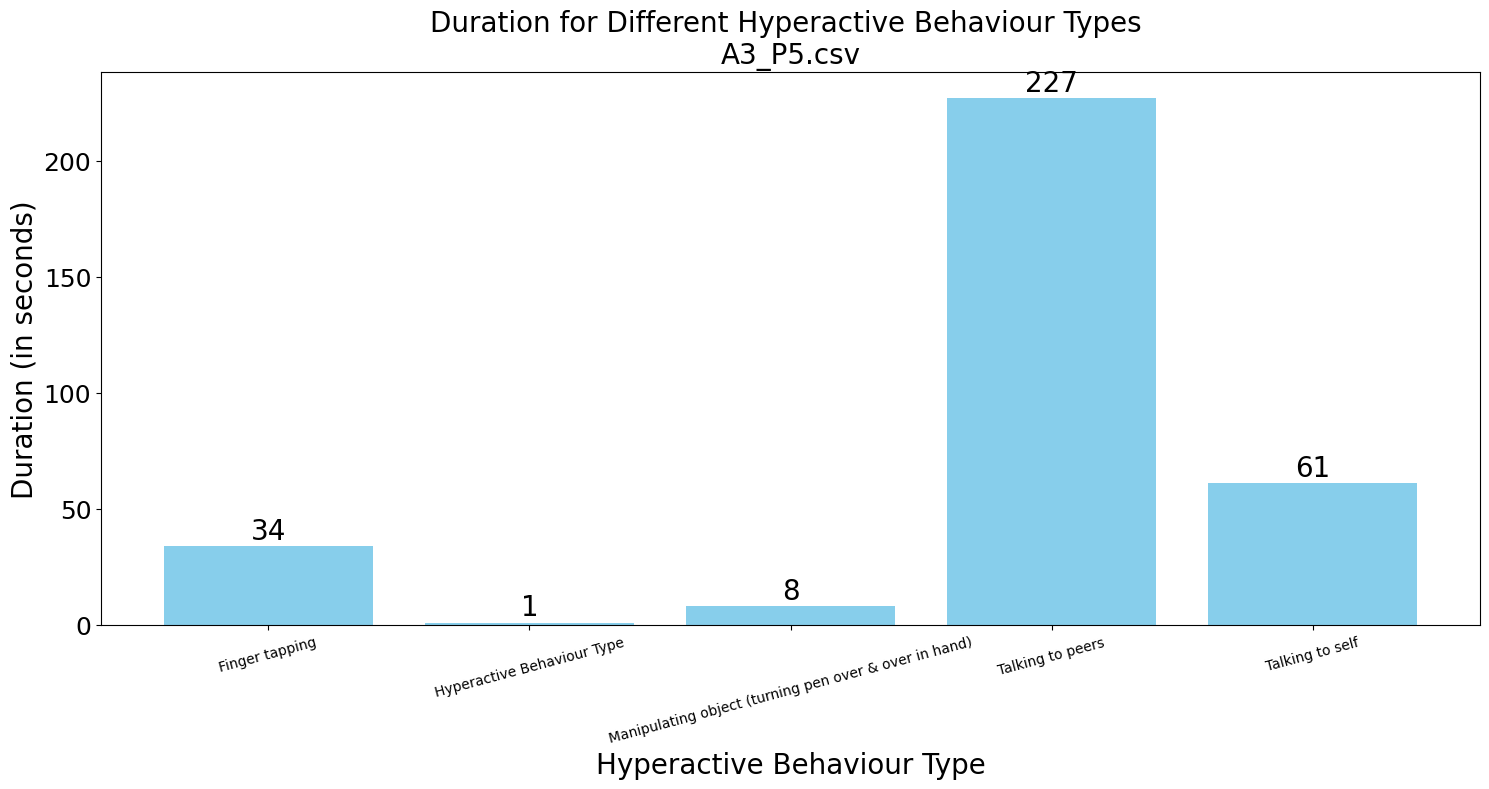

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A1_P18.csv


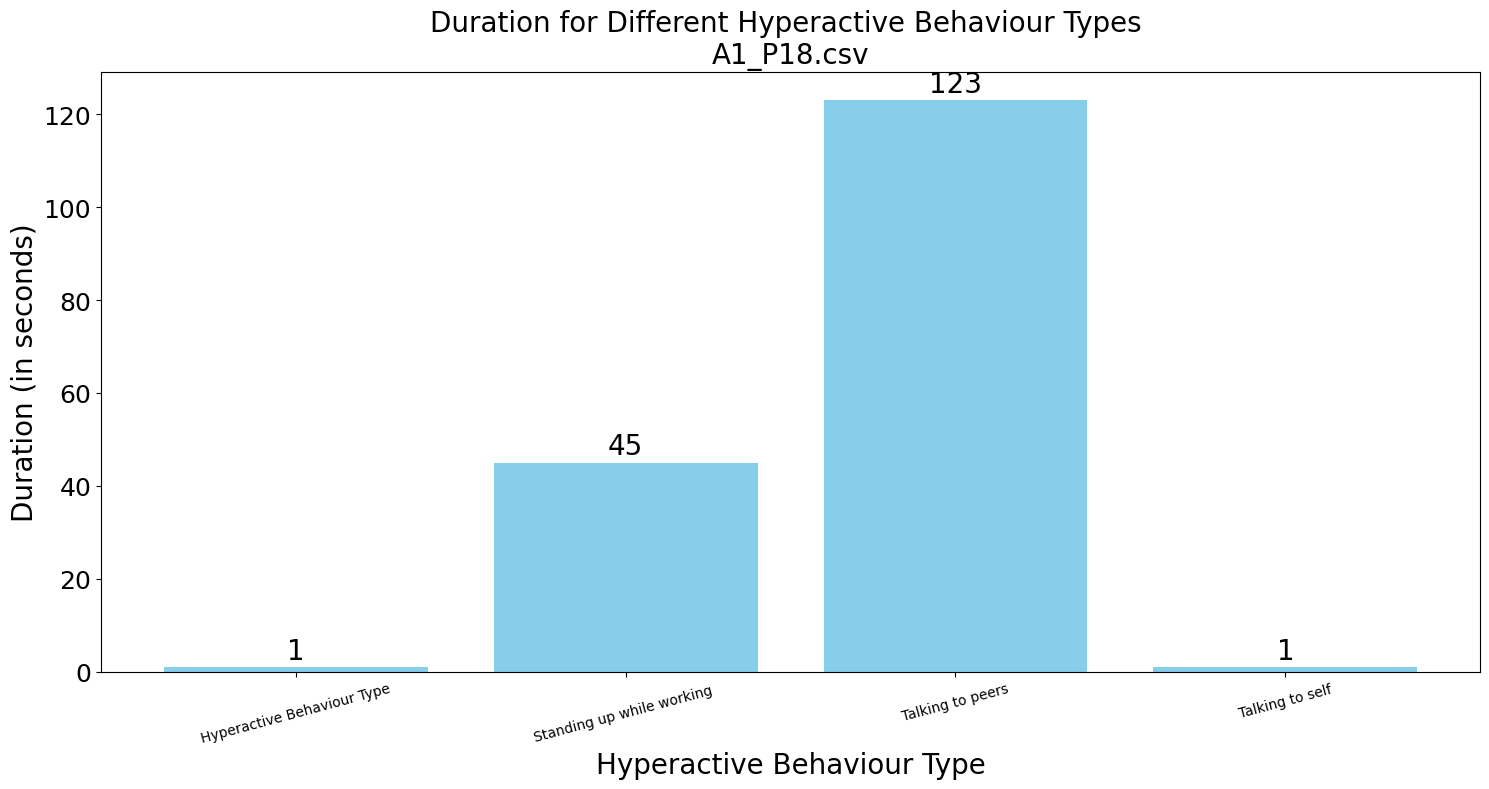

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A1_P24.csv


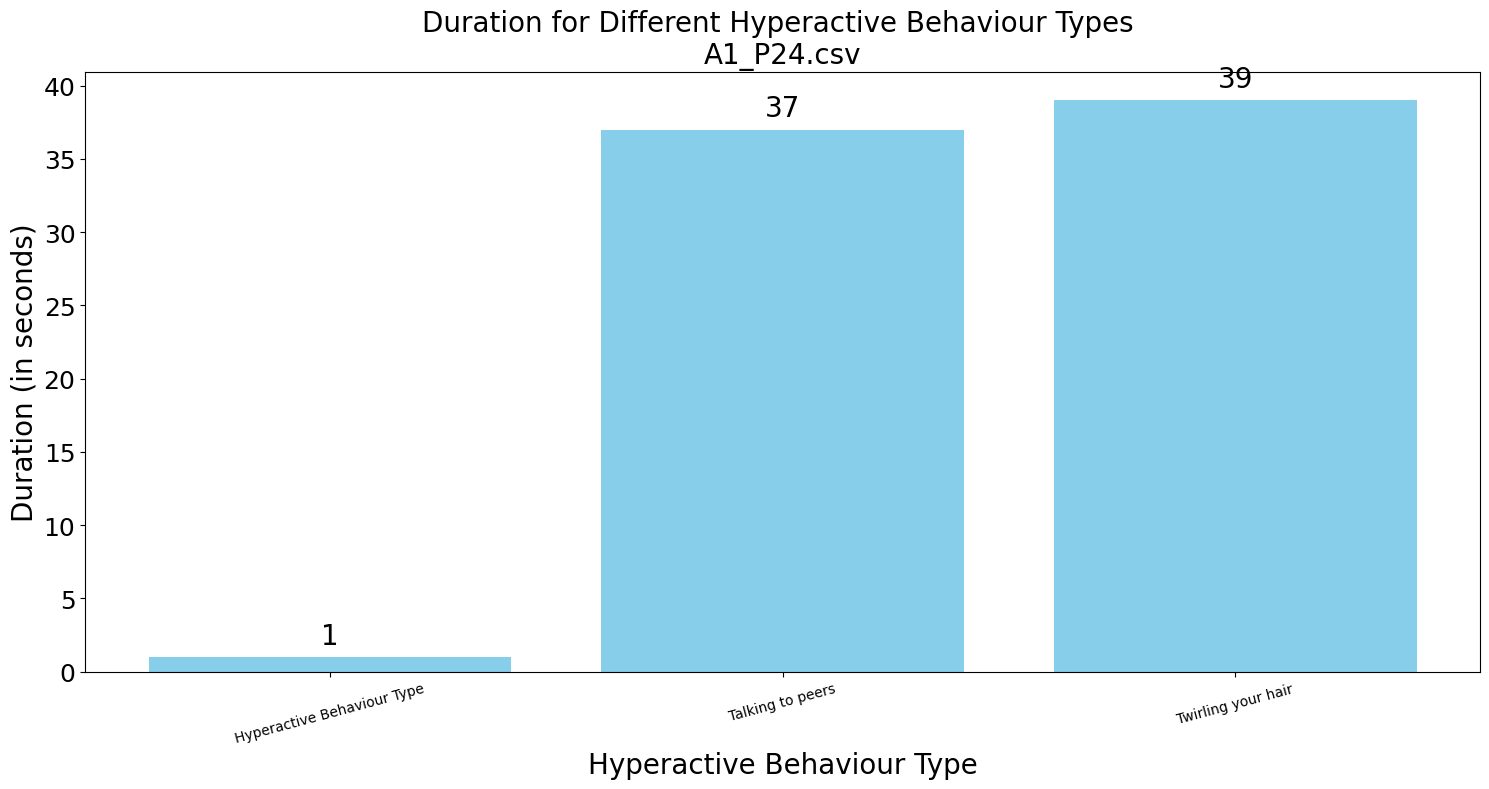

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A4_P15.csv


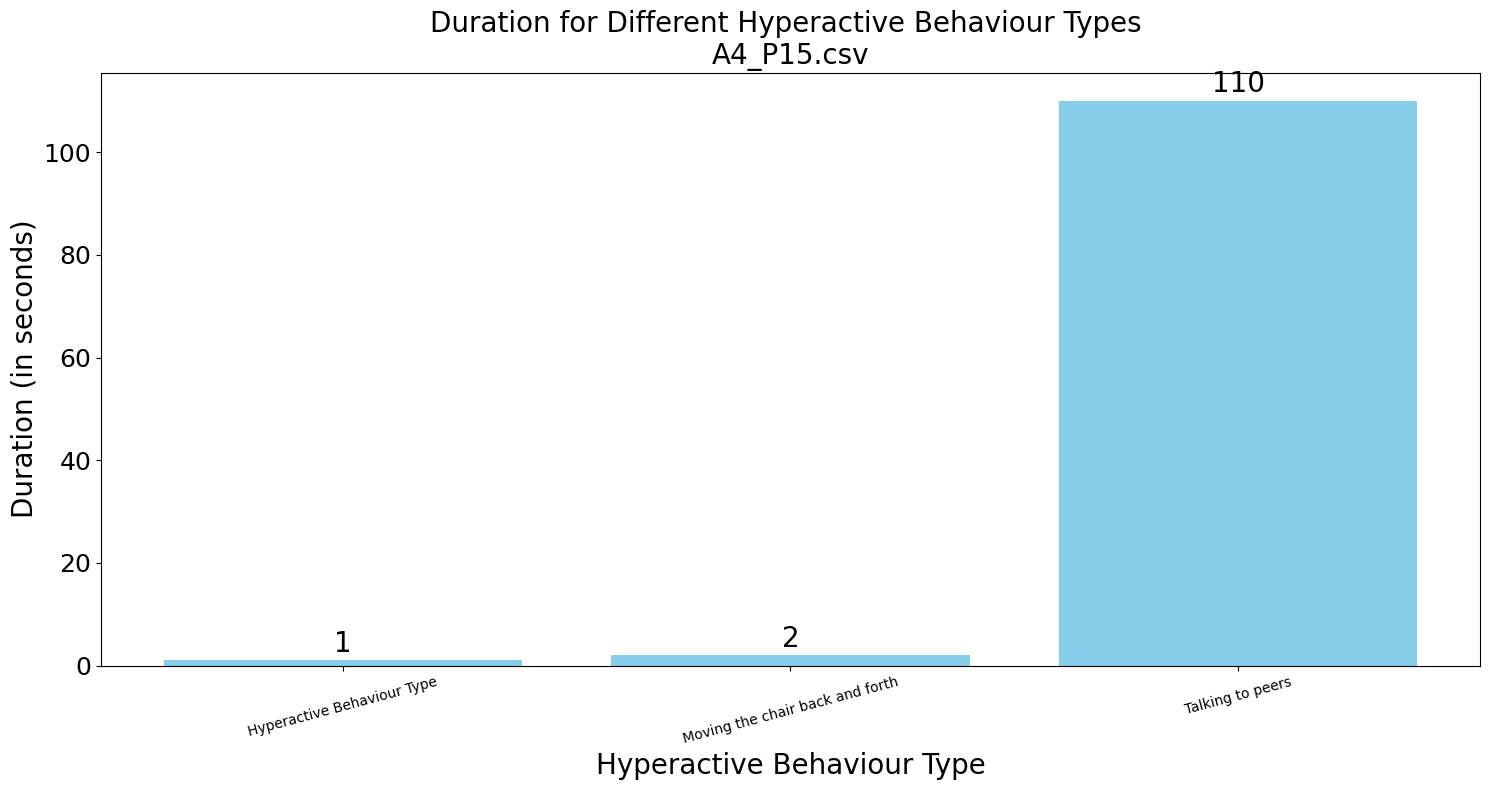

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A3_P6.csv


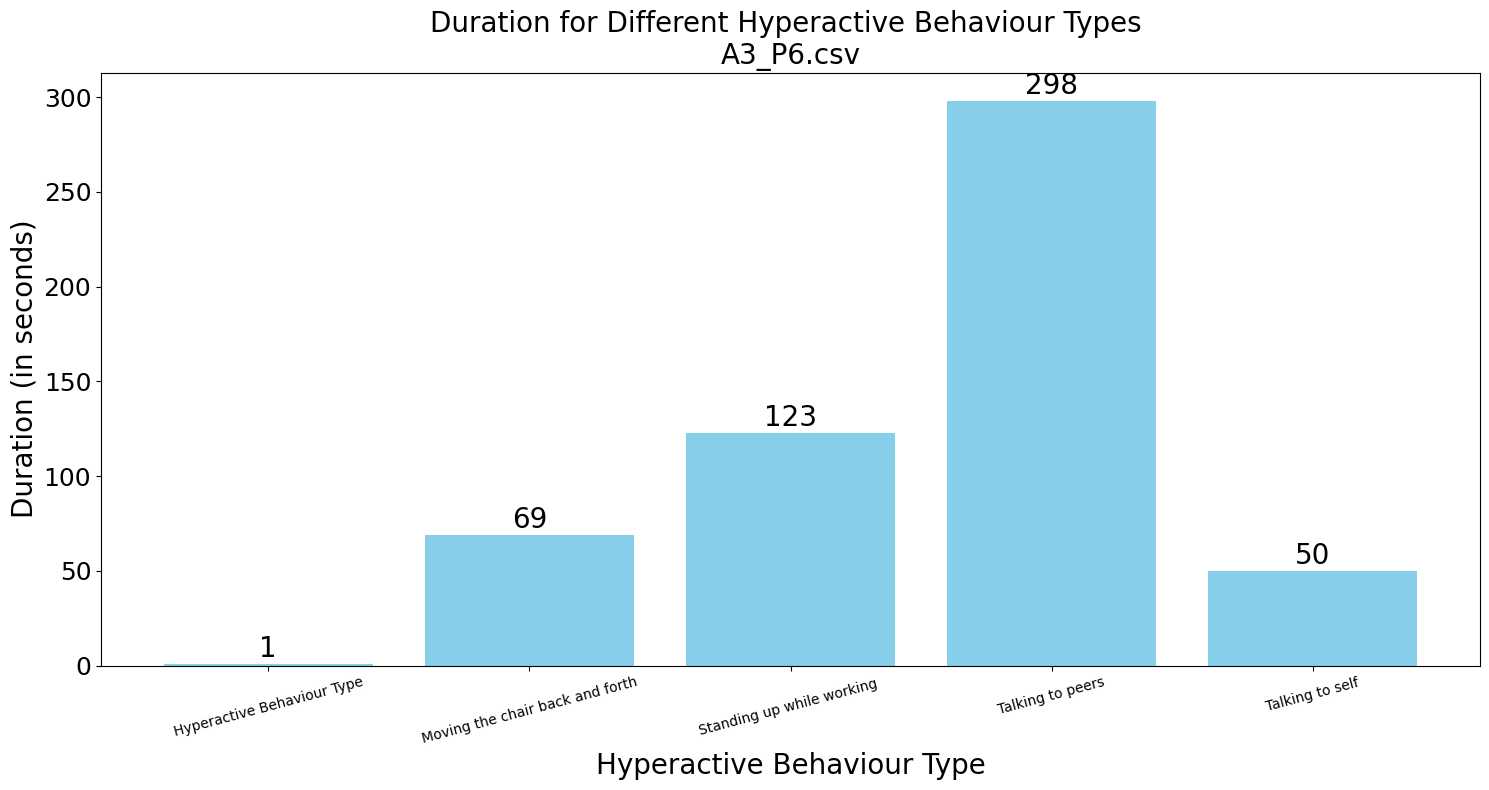

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A3_P7.csv


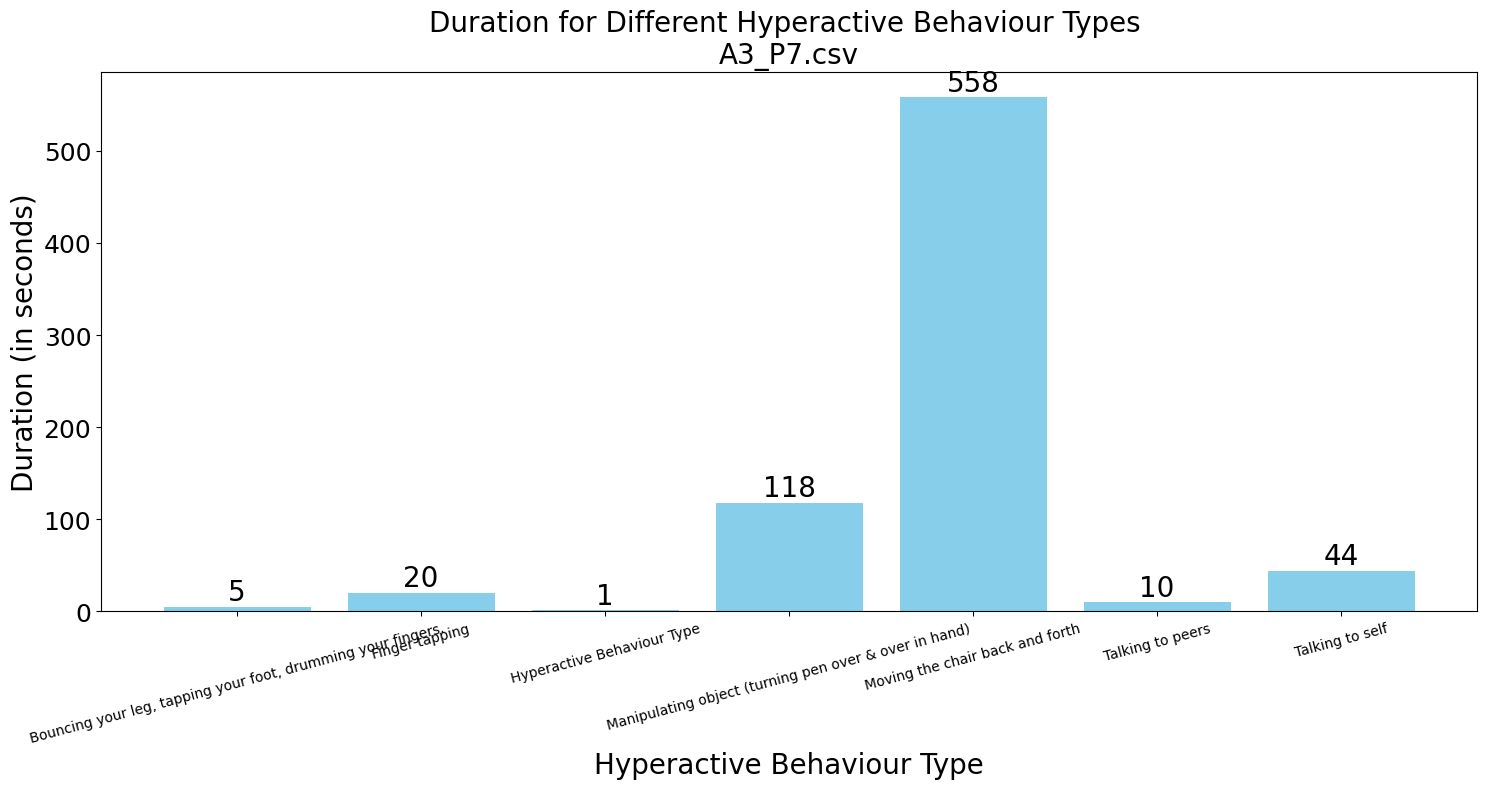

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A4_P16.csv


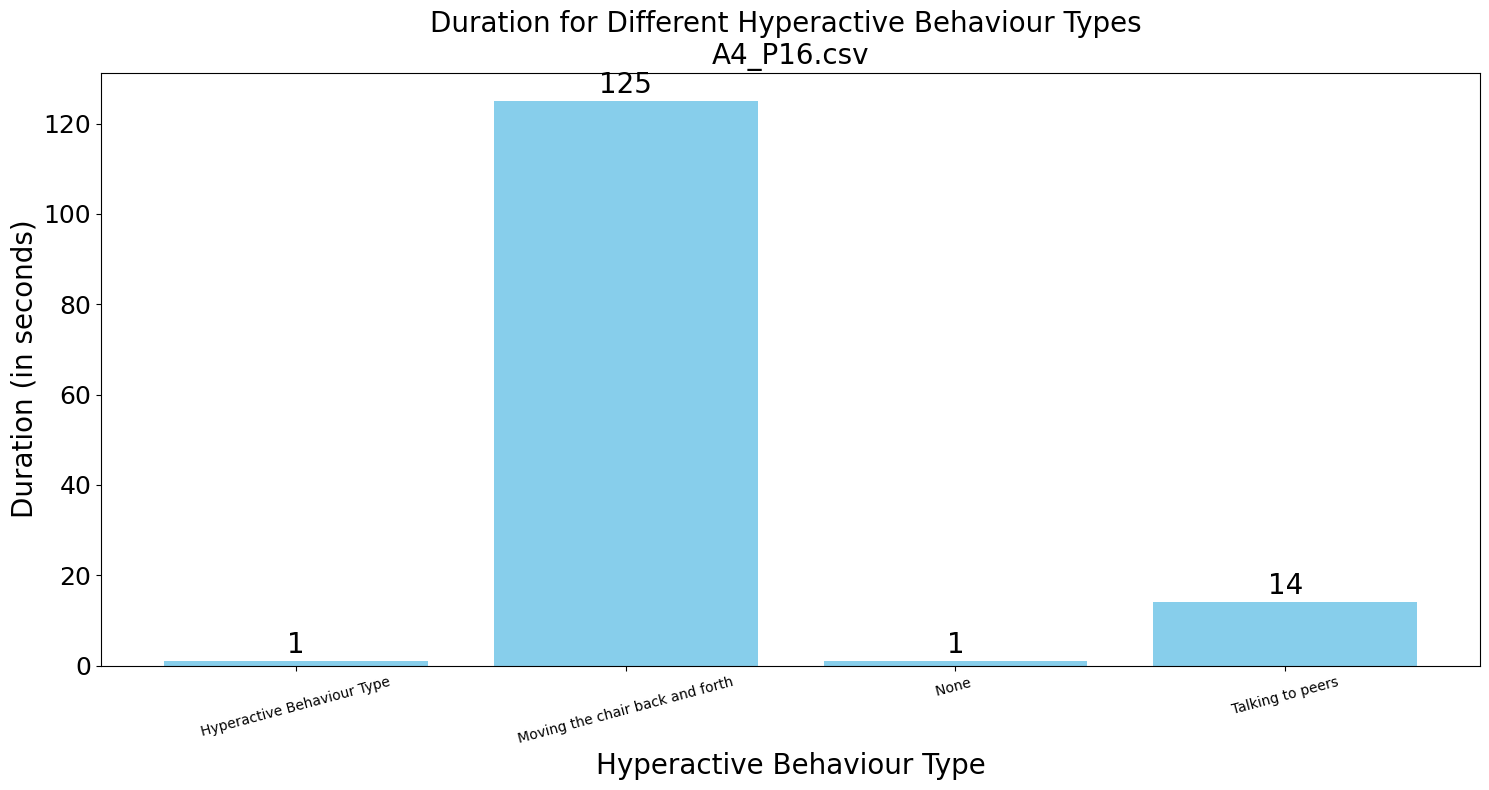

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A4_P12.csv


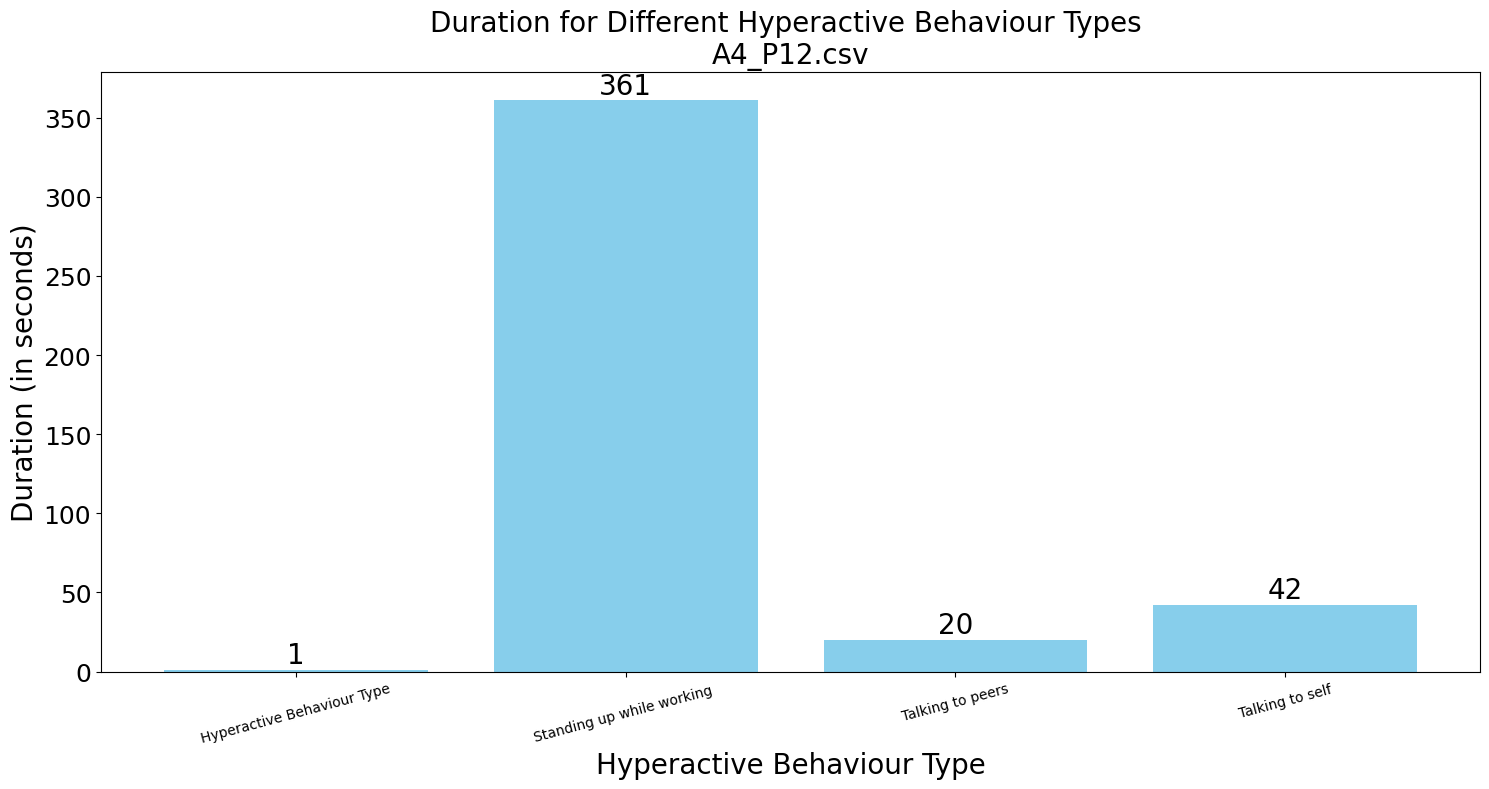

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A1_P6.csv


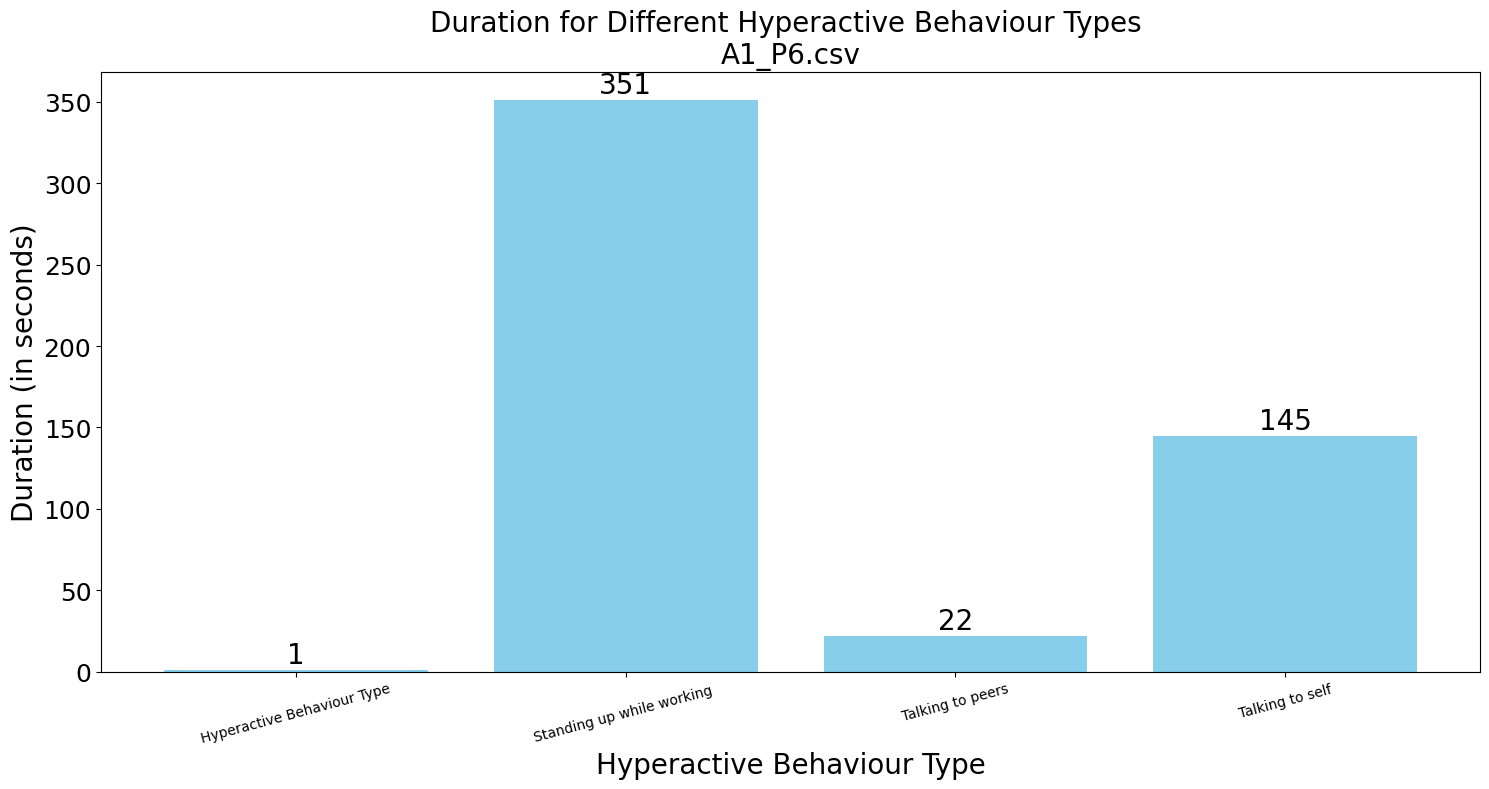

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A1_P23.csv


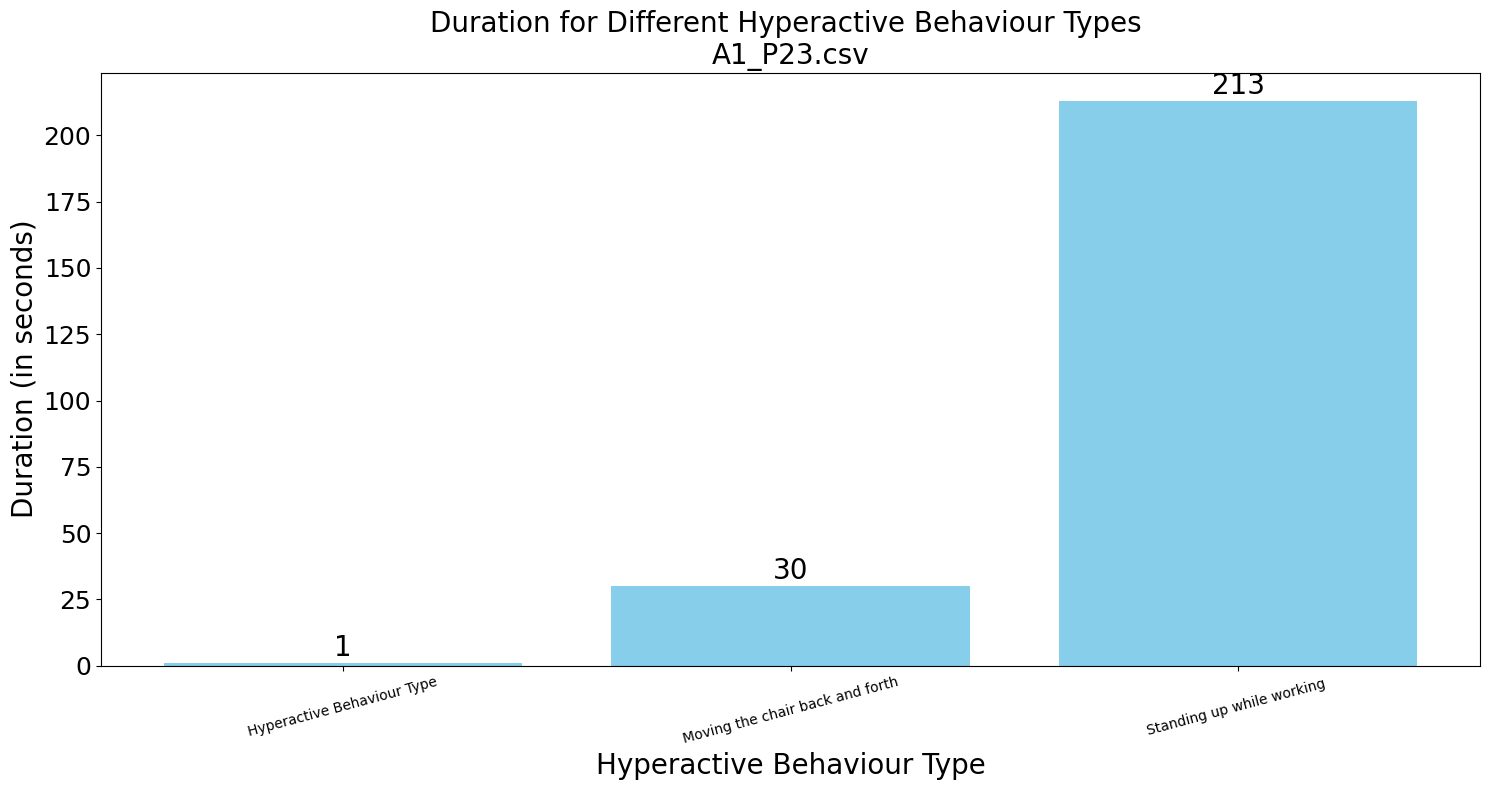

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A1_P22.csv


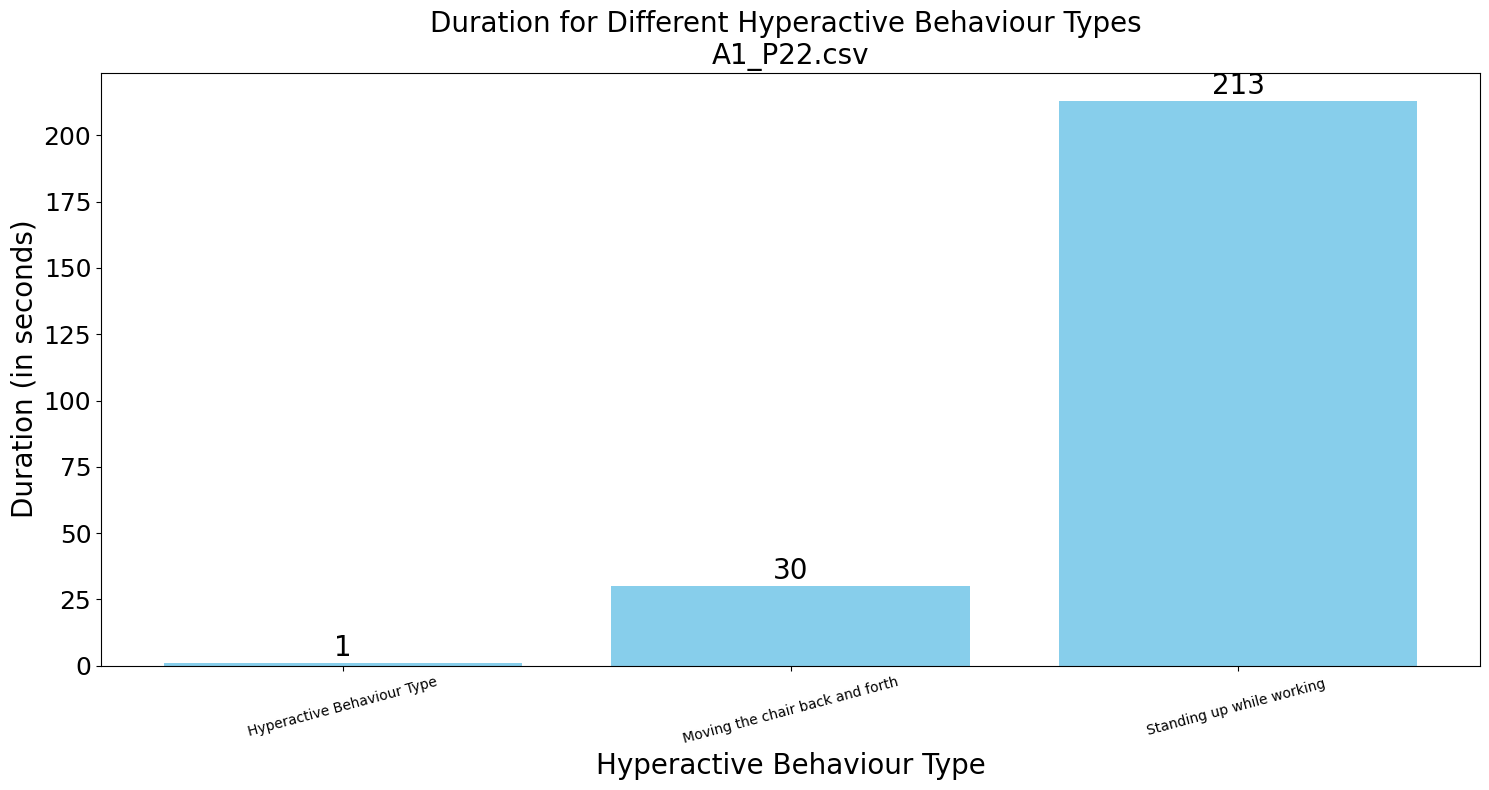

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A1_P7.csv


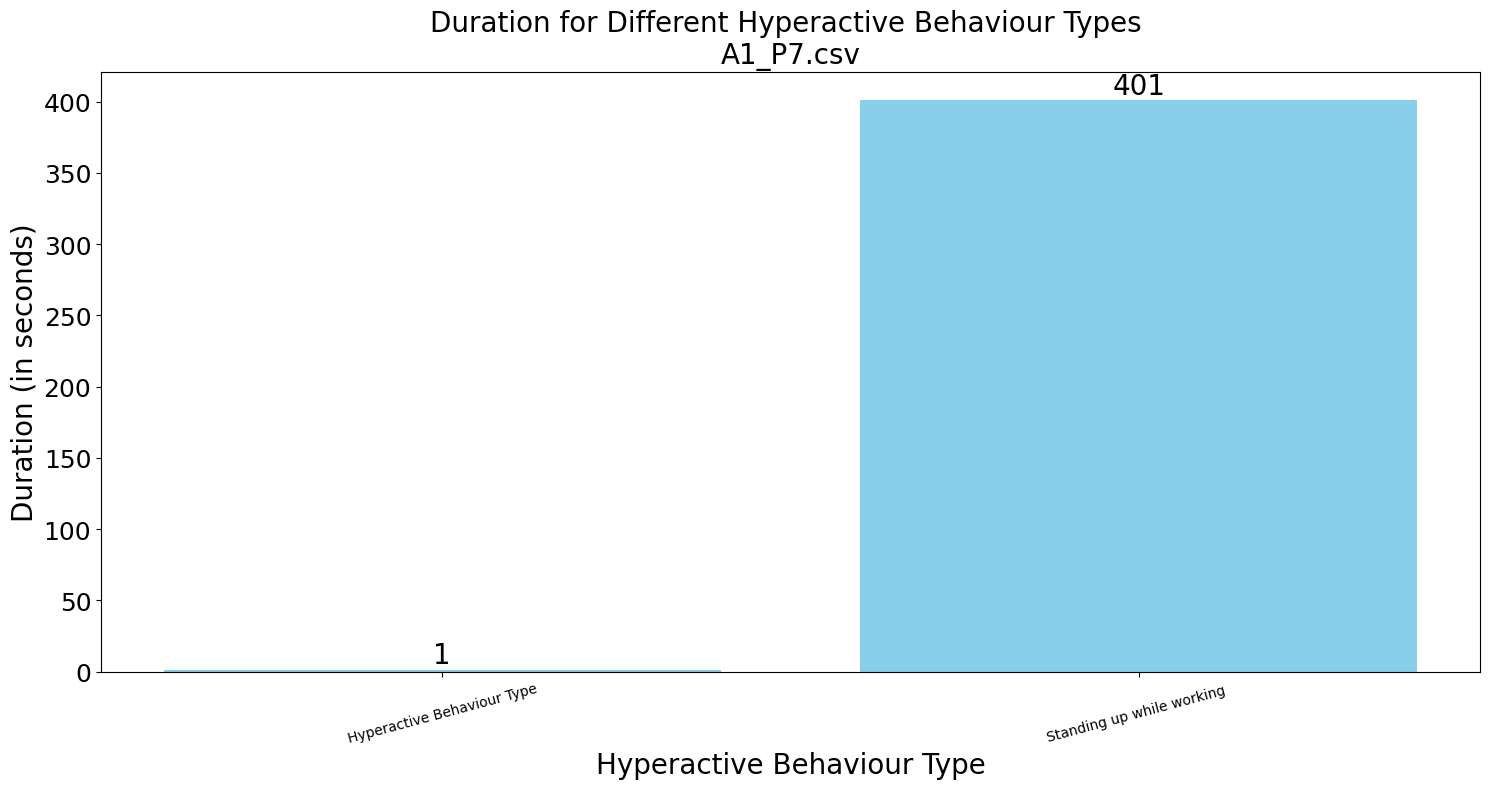

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A4_P13.csv


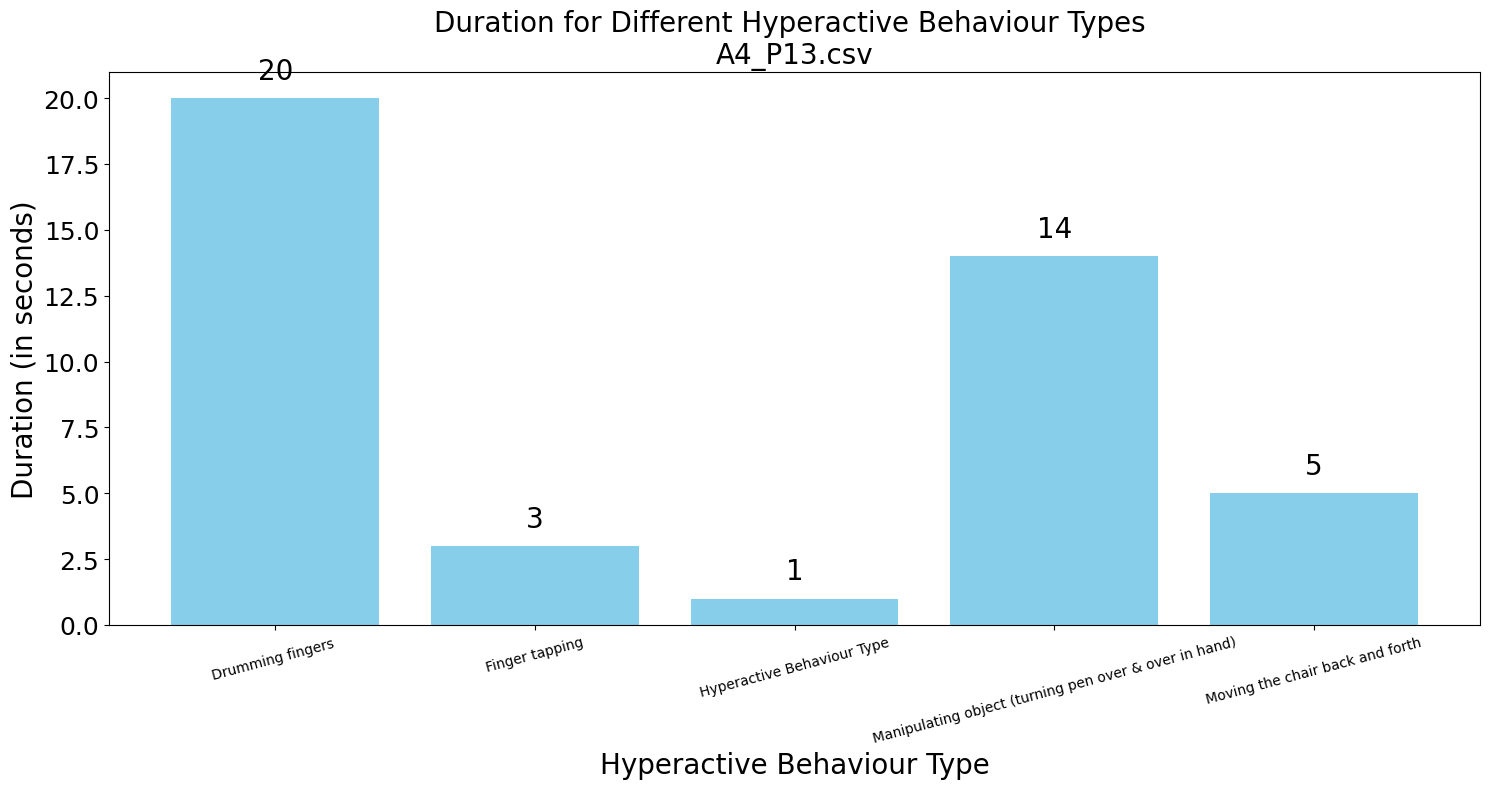

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A4_P11.csv


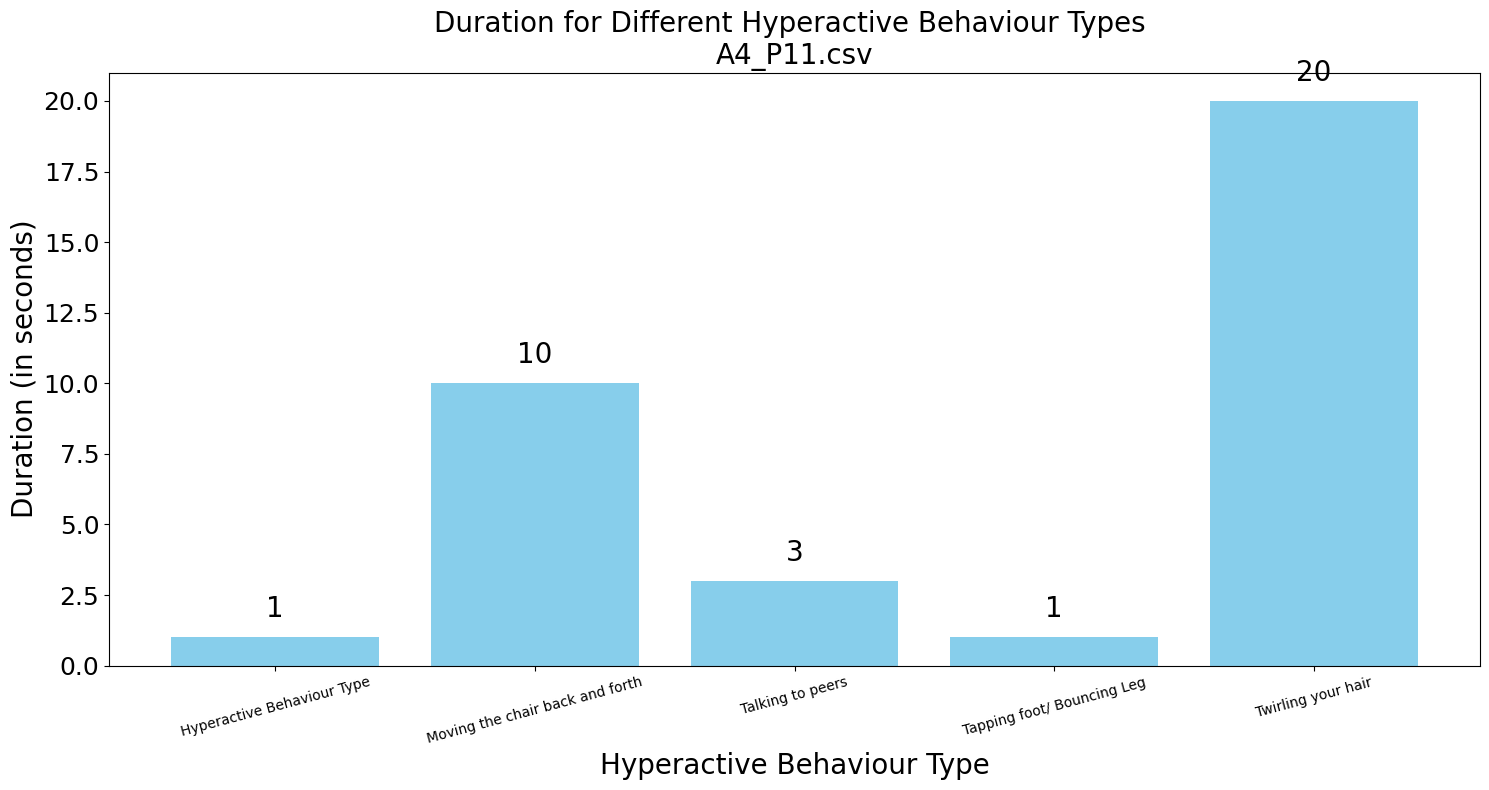

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A1_P5.csv


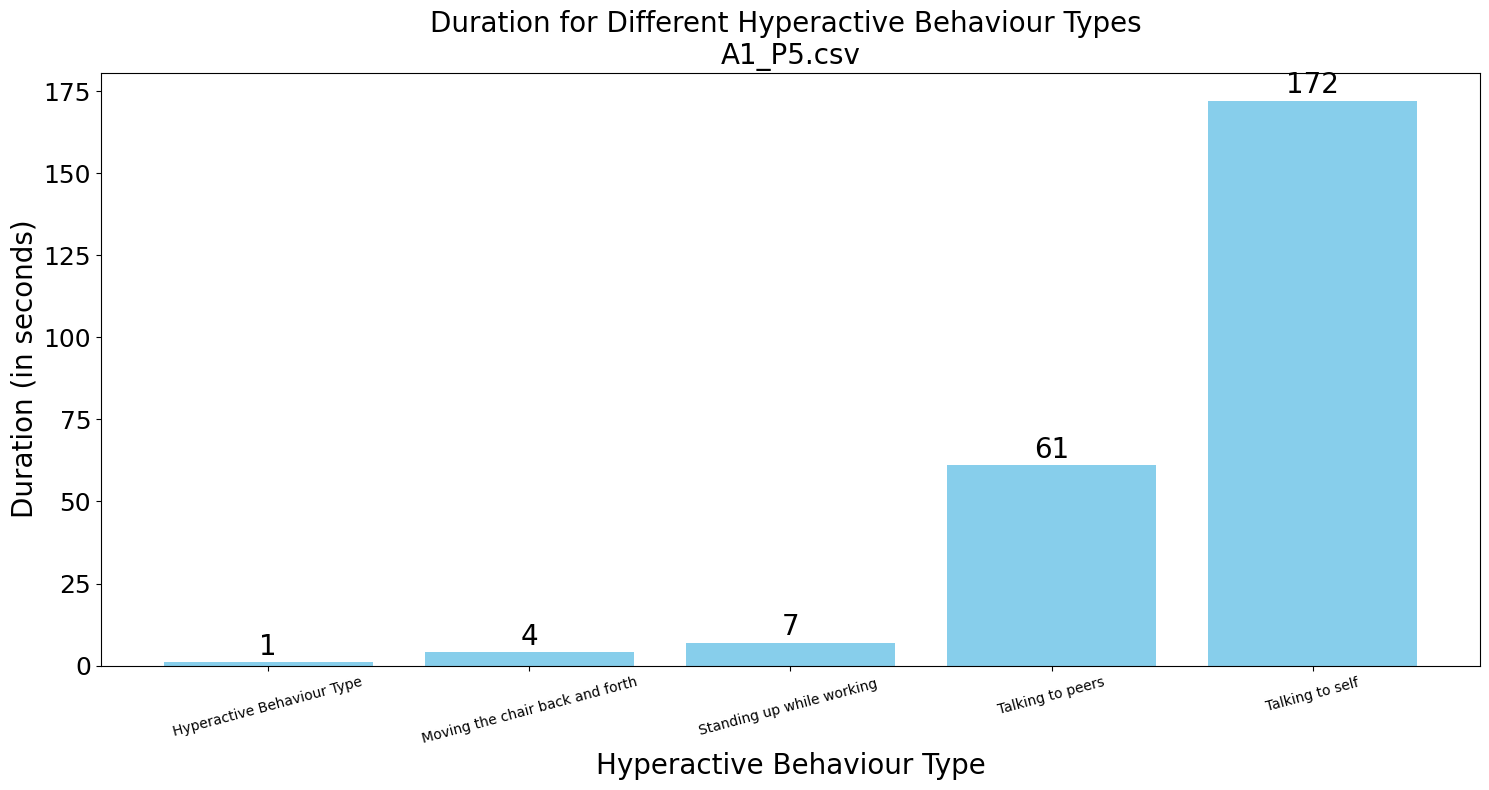

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A1_P20.csv


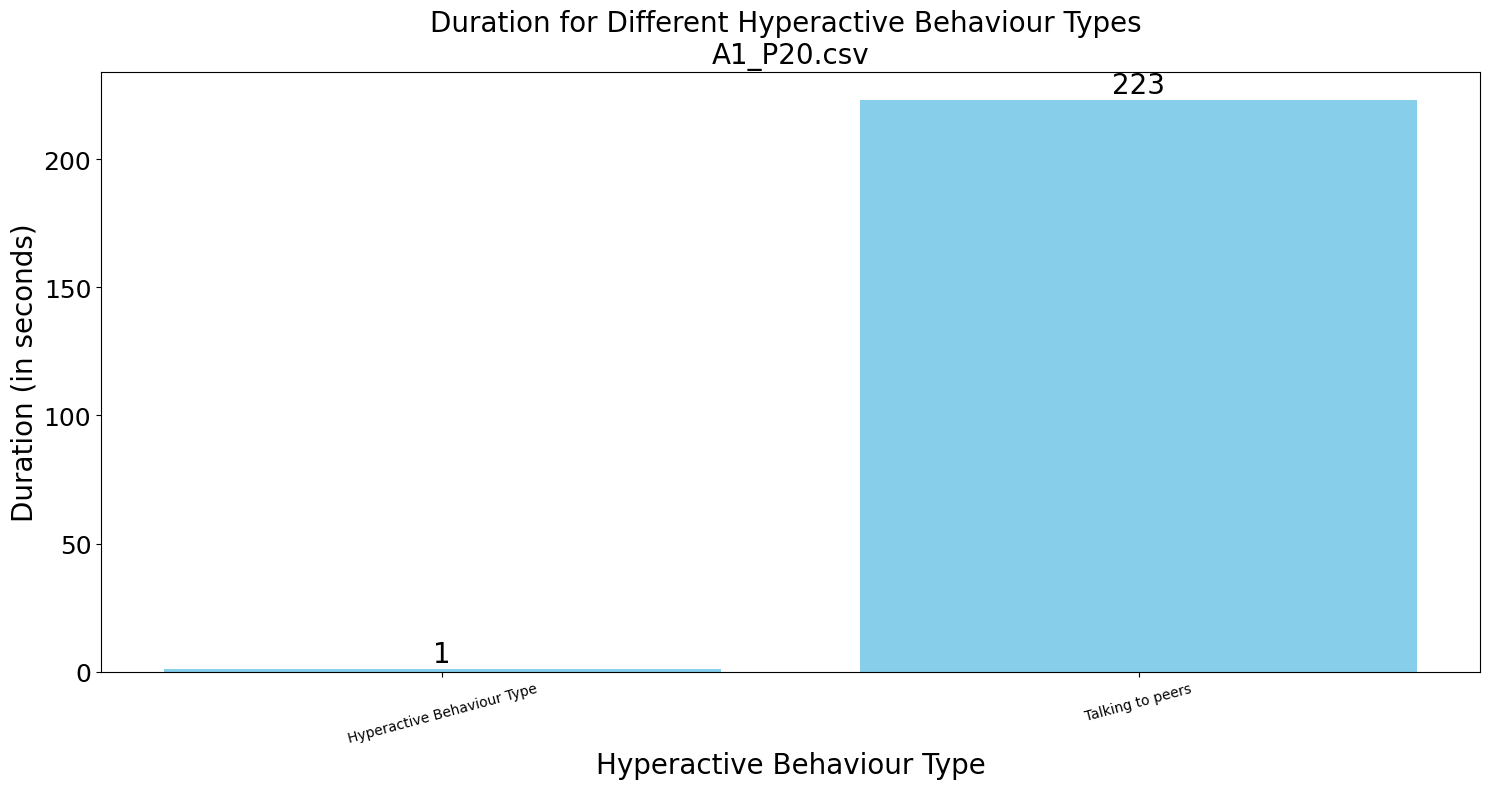

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A4_P9.csv


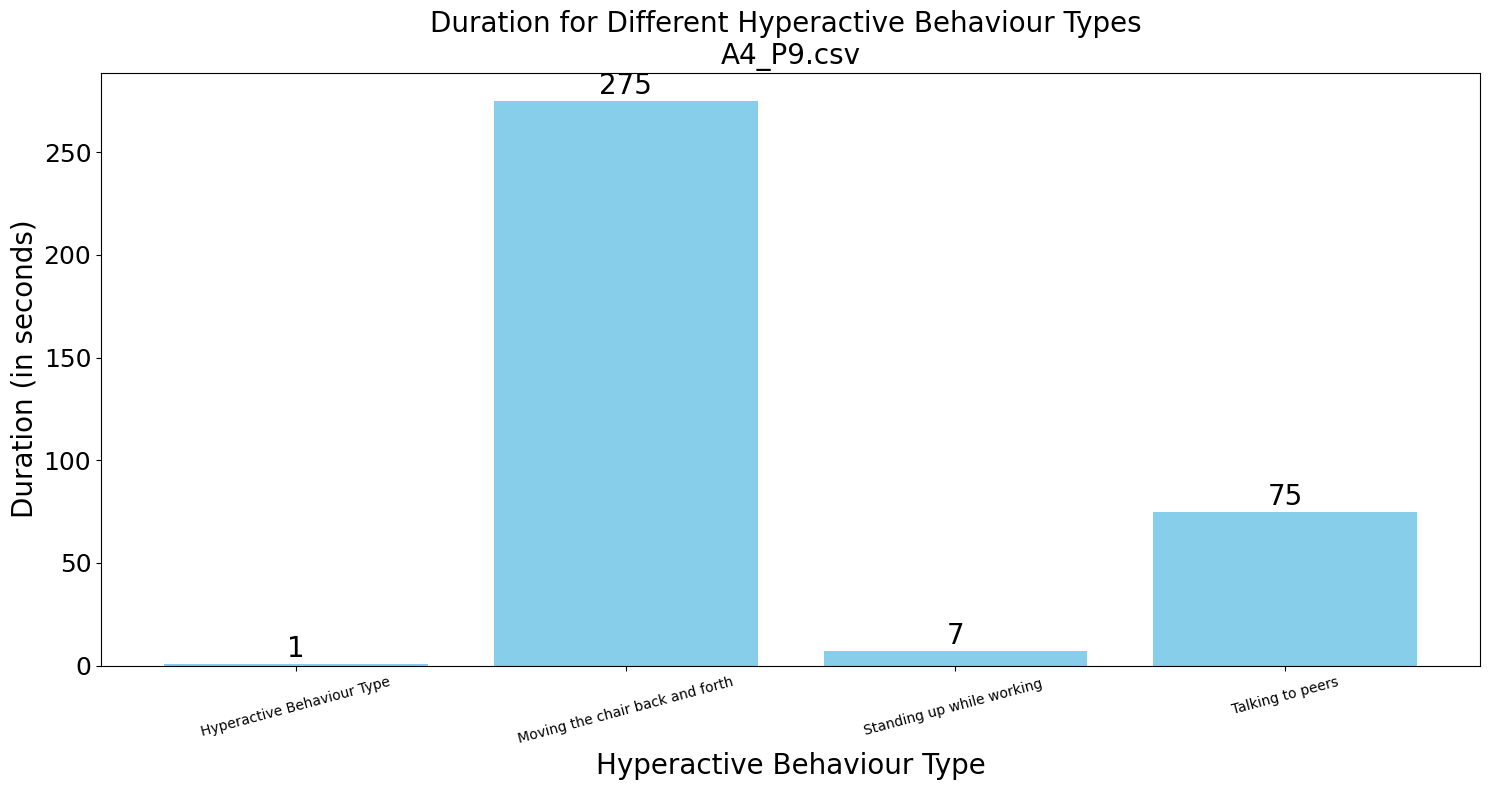

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A4_P8.csv


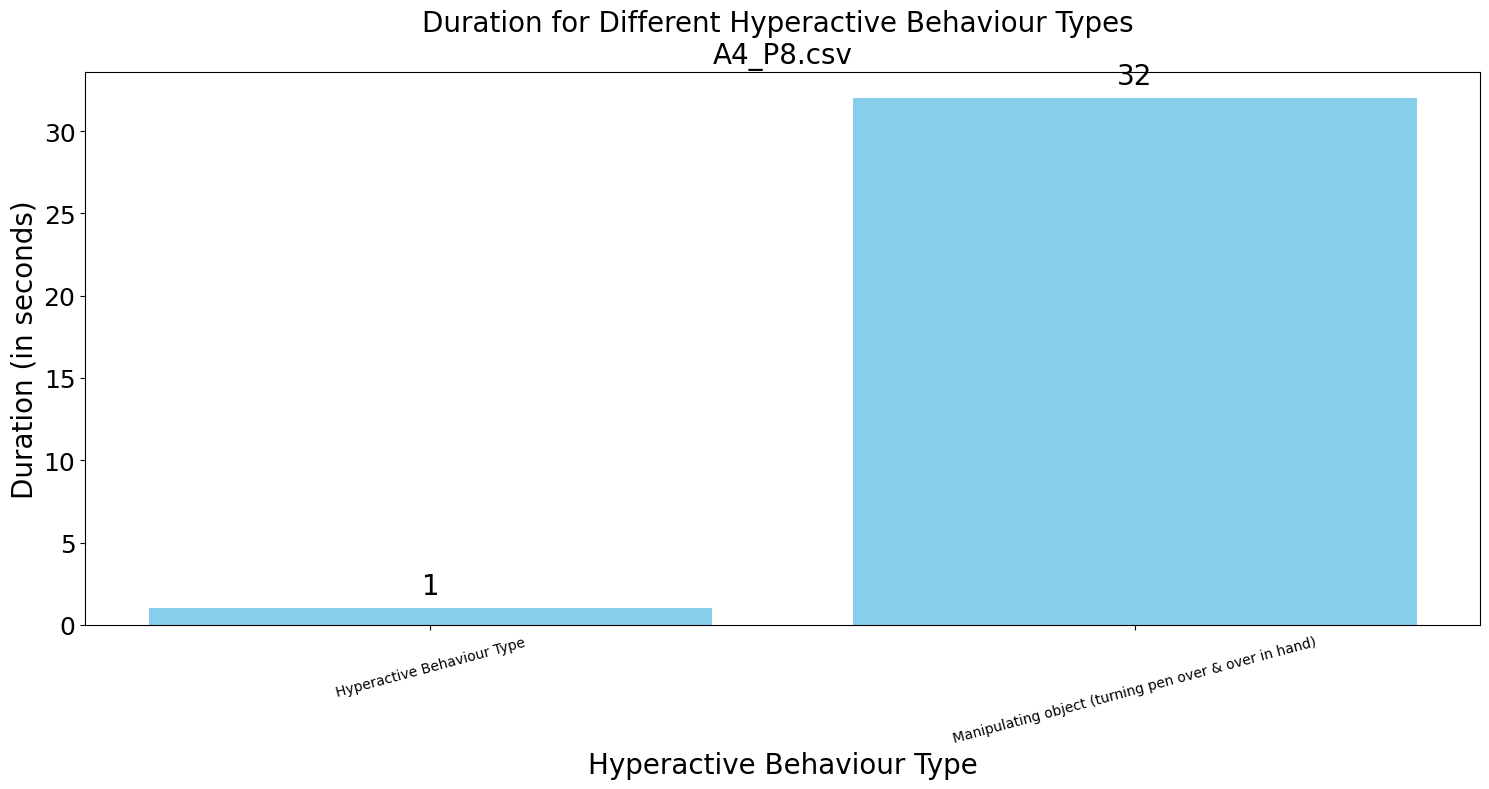

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A1_P21.csv


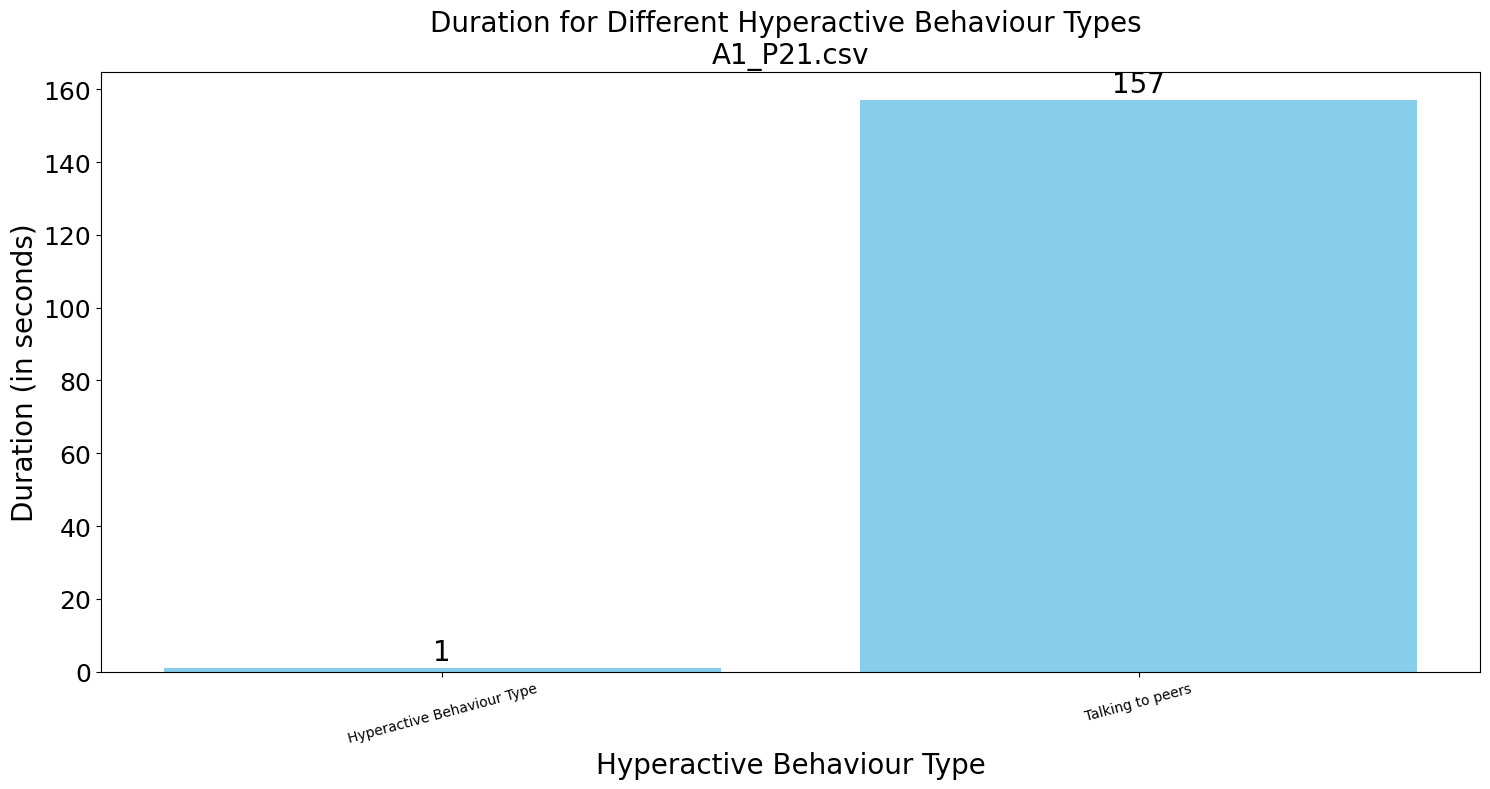

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A4_P10.csv


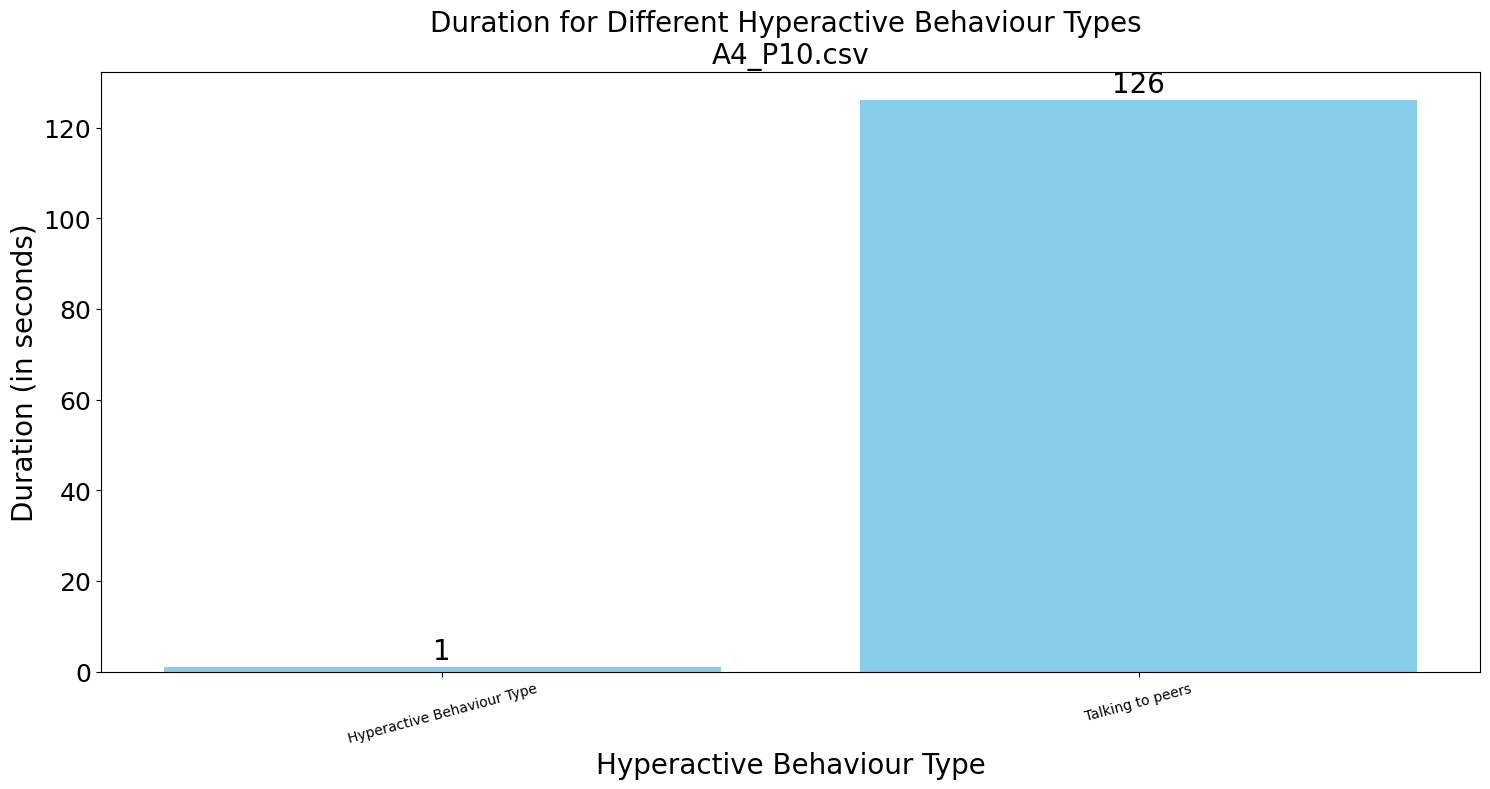

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A3_P23.csv


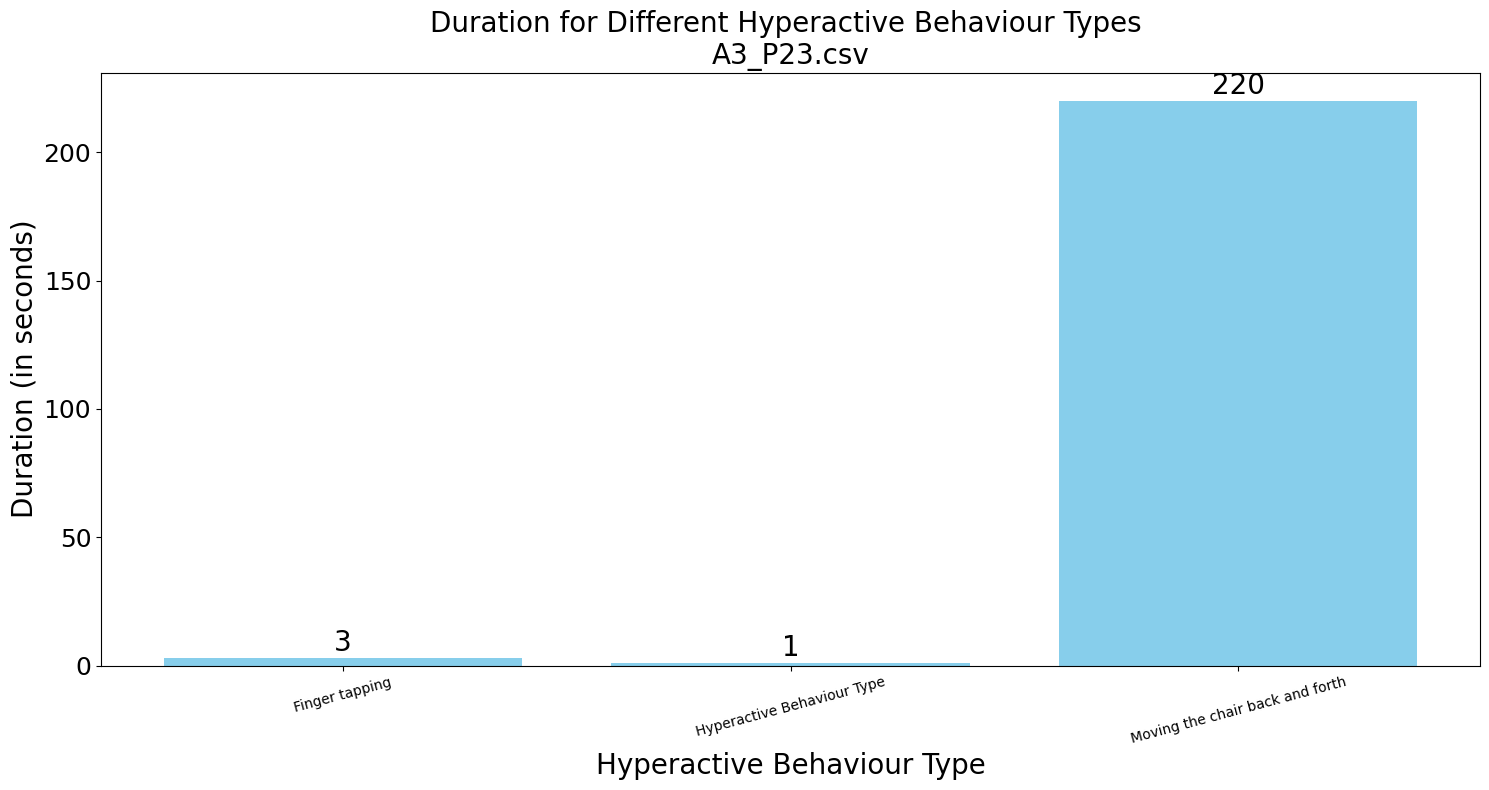

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A3_P22.csv


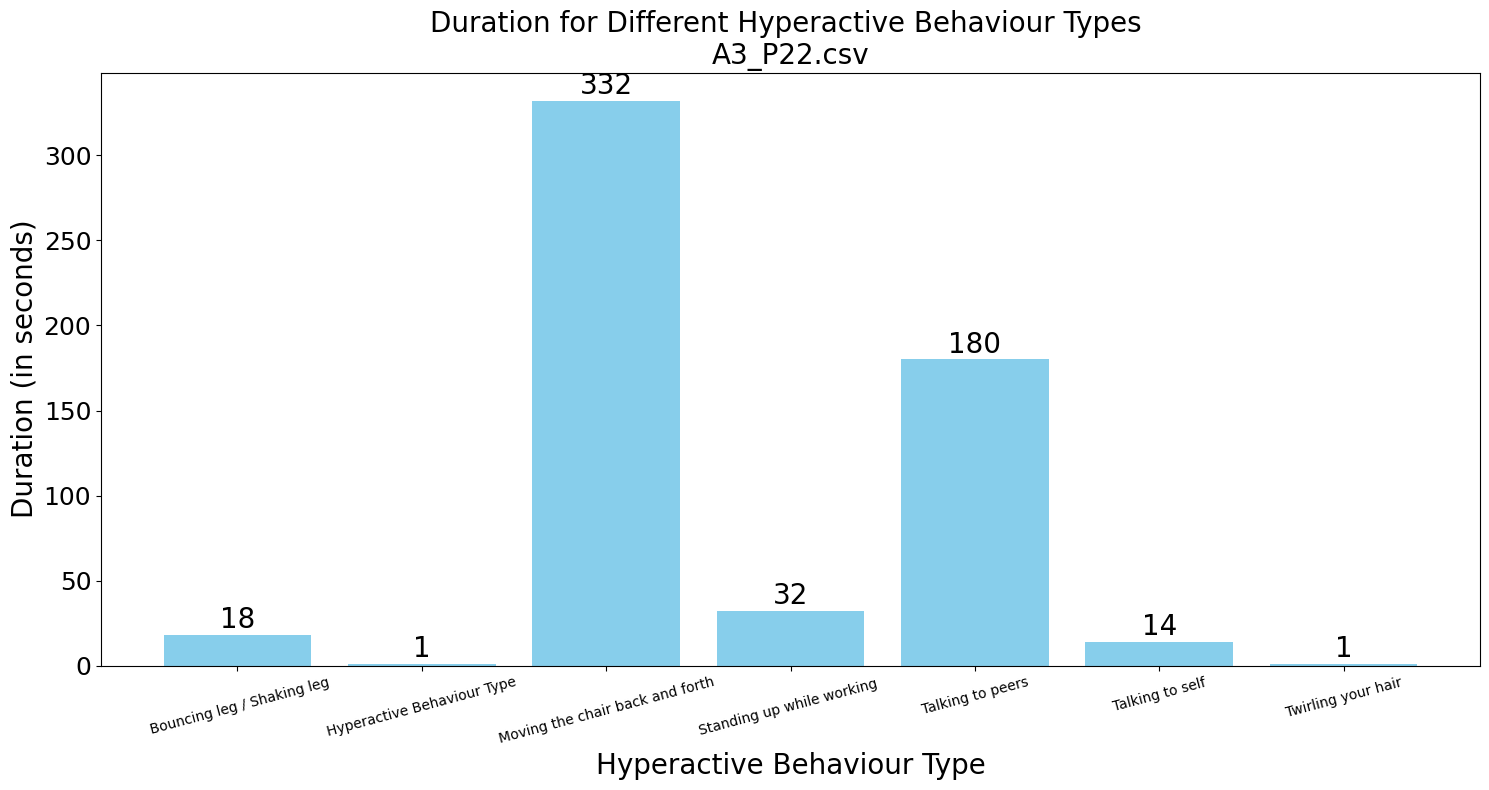

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A2_P19.csv


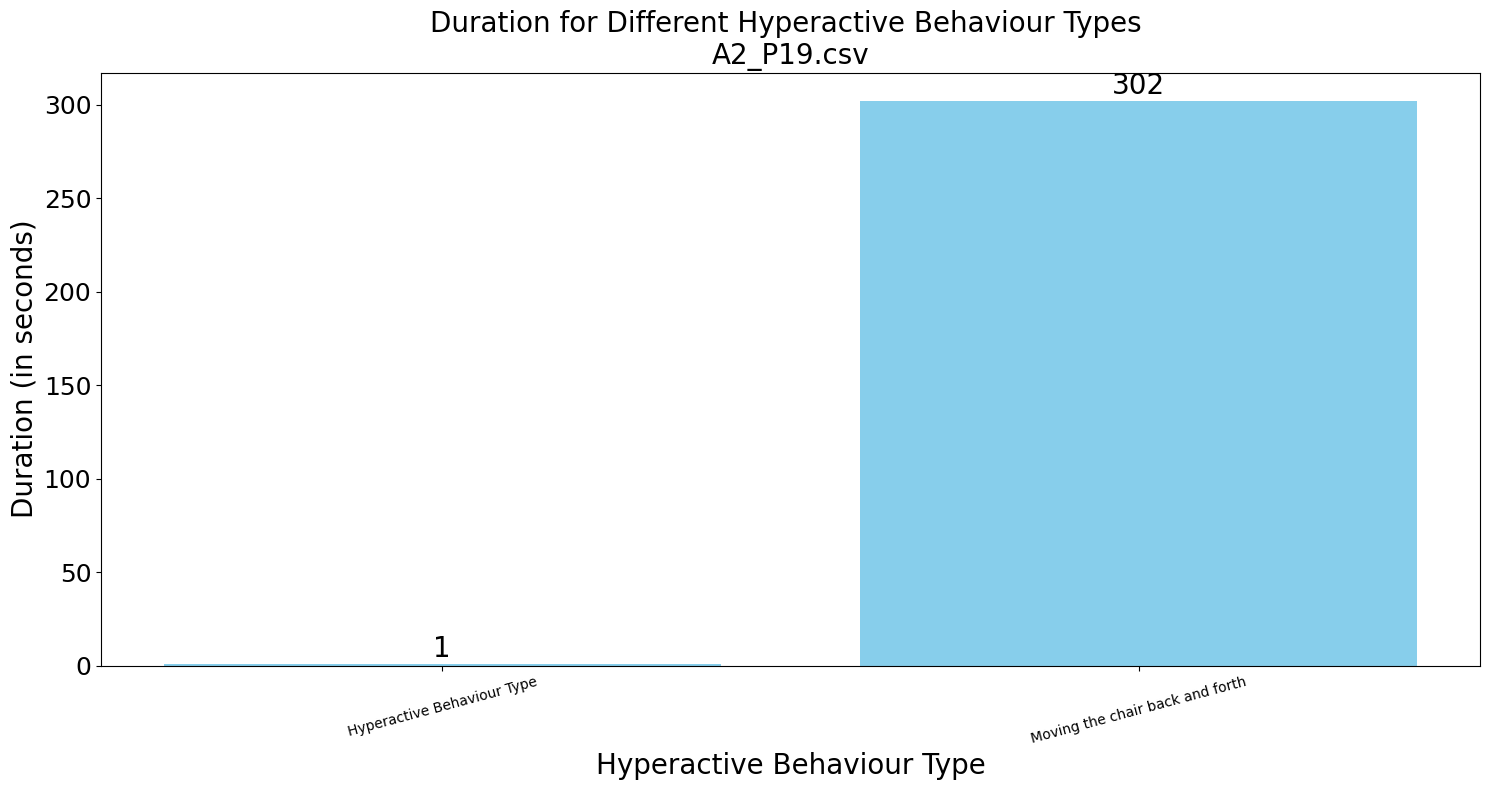

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A3_P20.csv


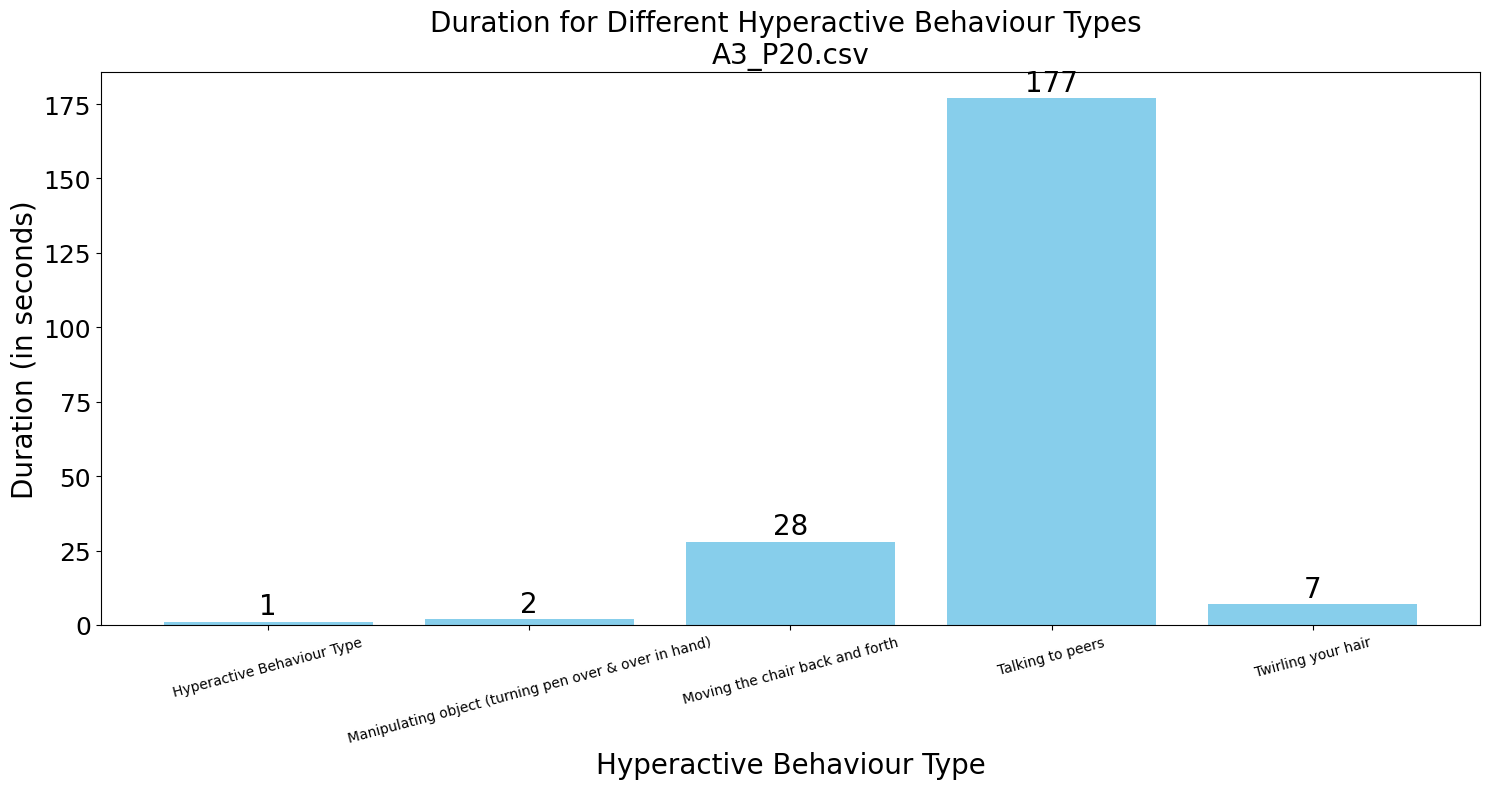

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A3_P21.csv


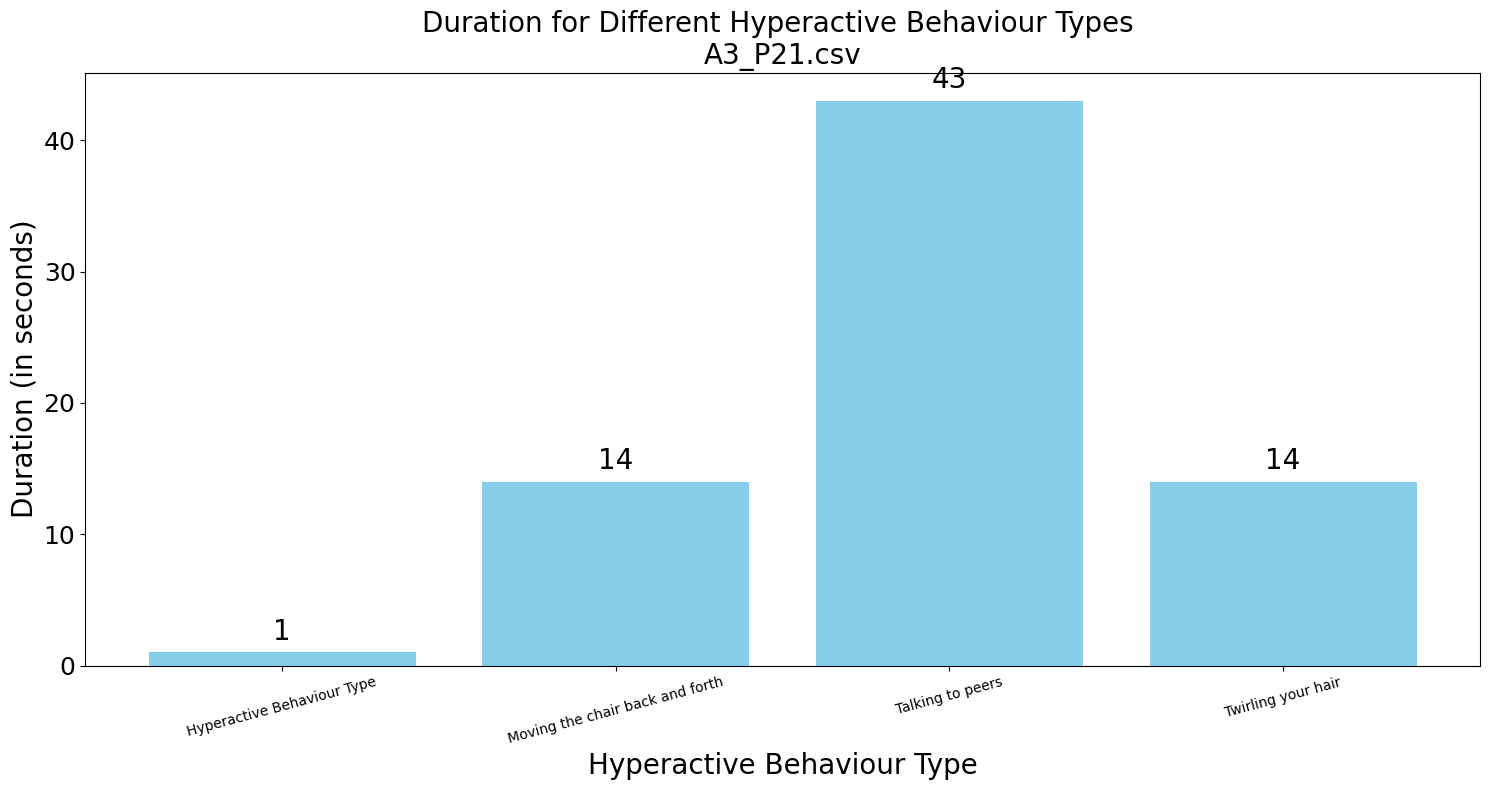

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A2_P18.csv


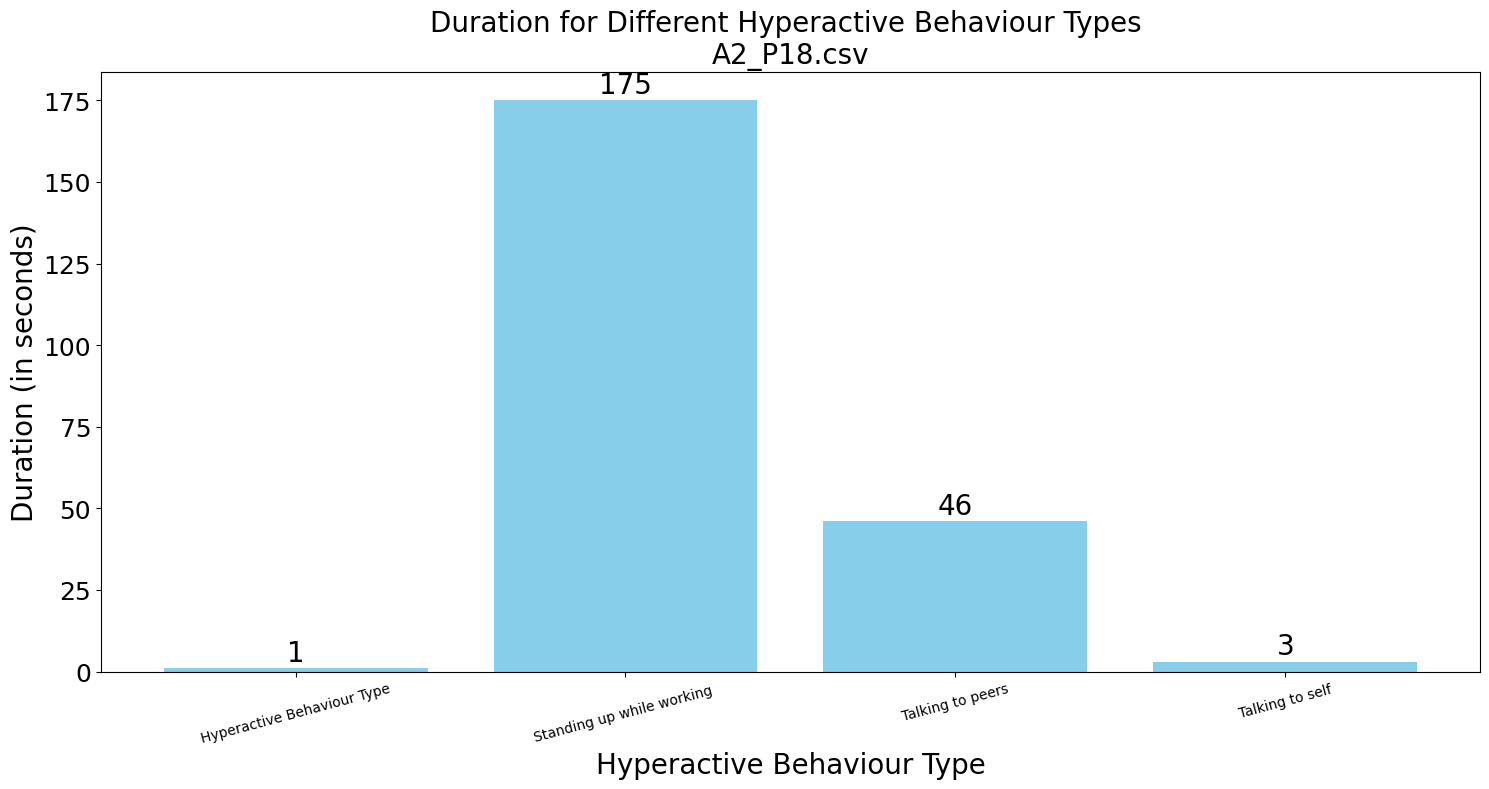

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A2_P24.csv


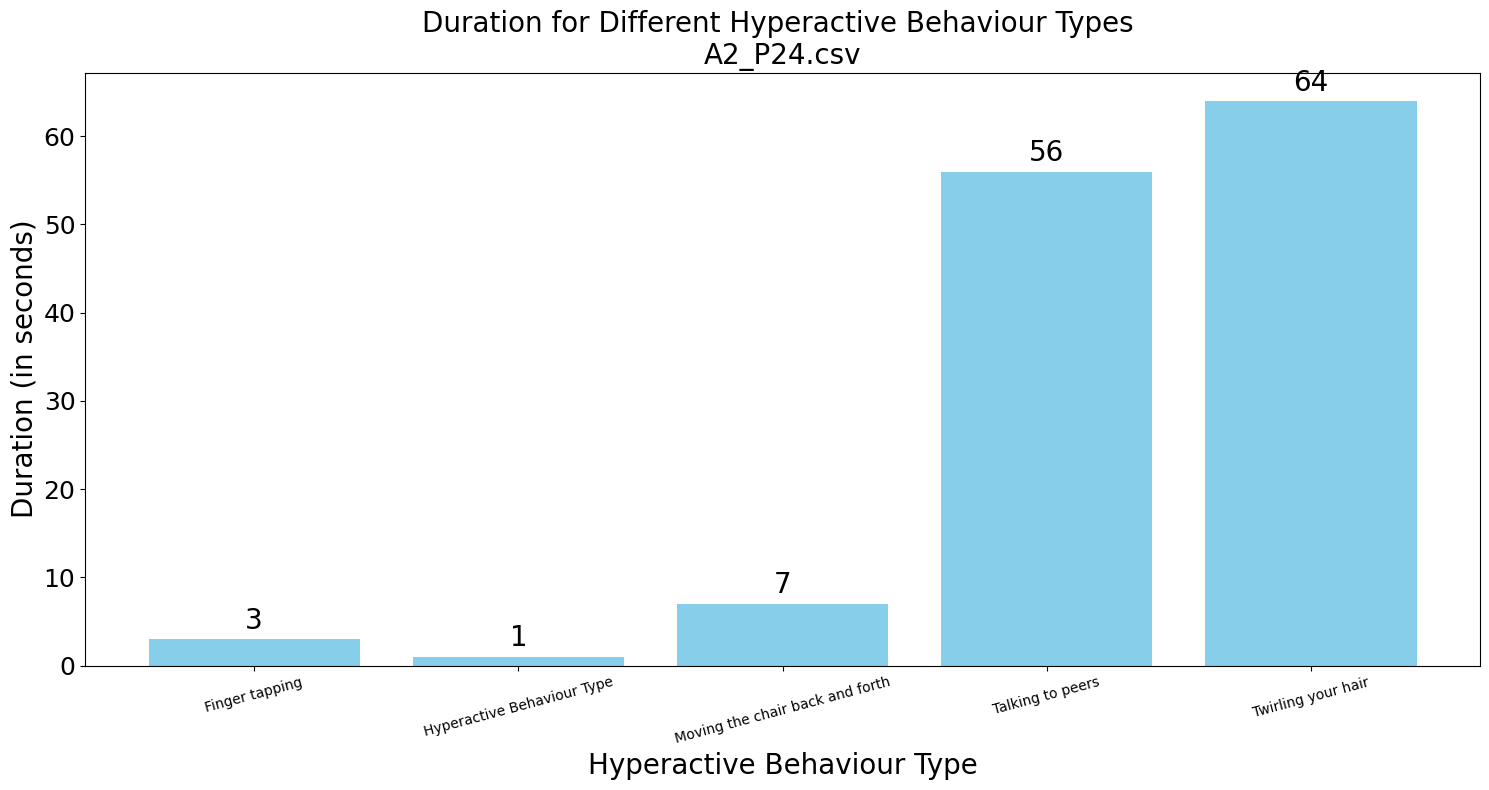

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A2_P20.csv


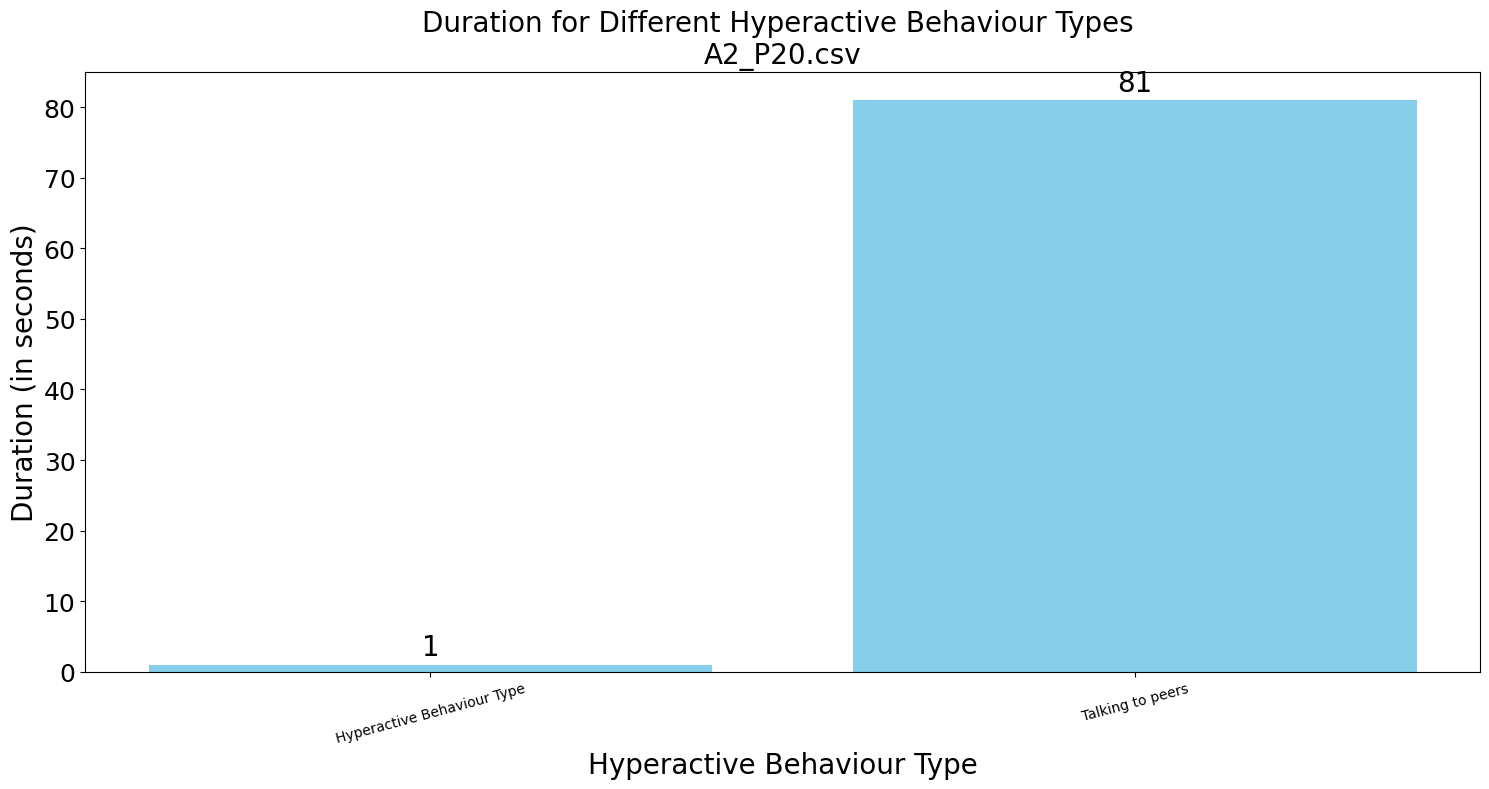

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A3_P19.csv


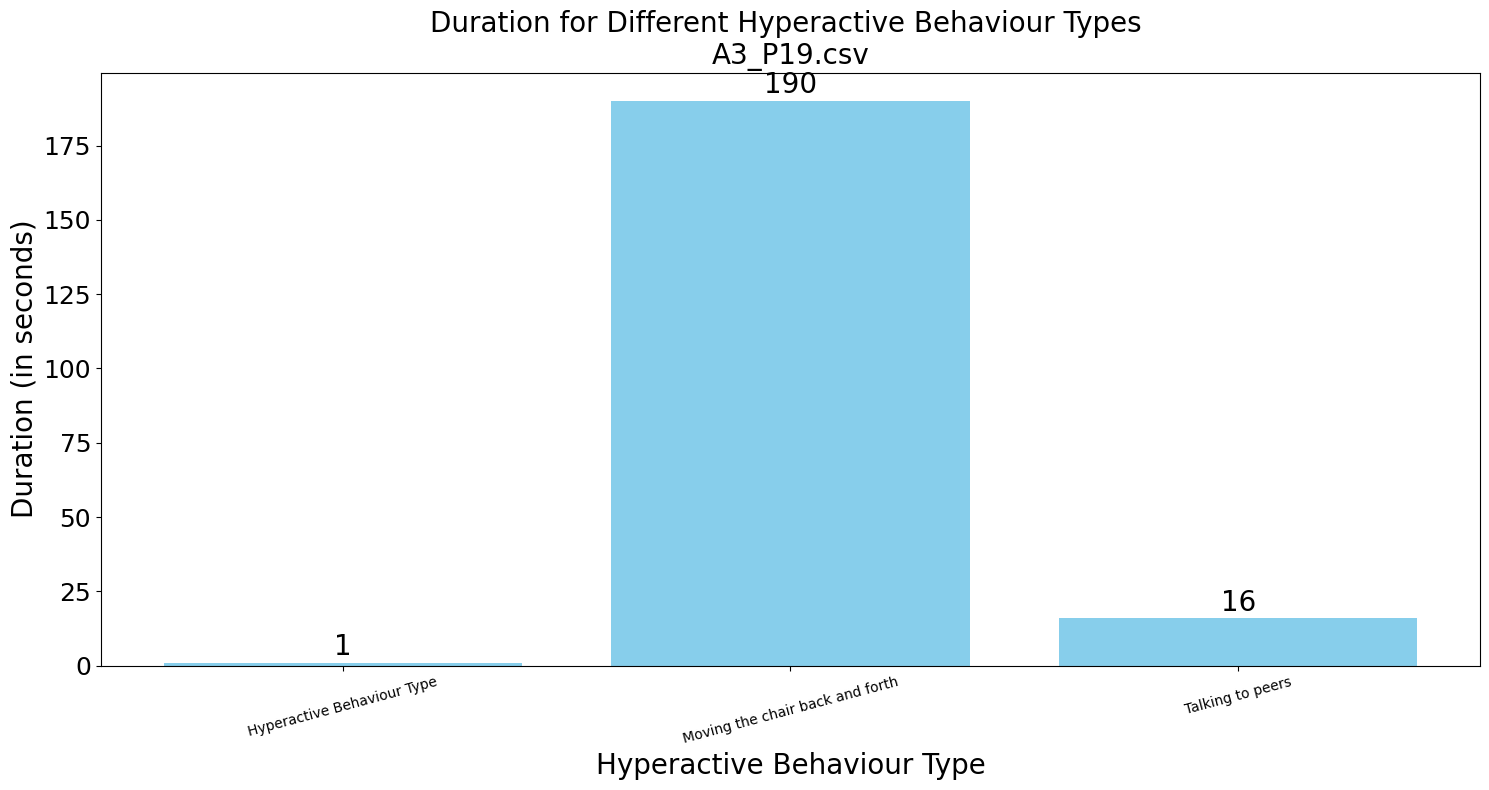

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A2_P8.csv


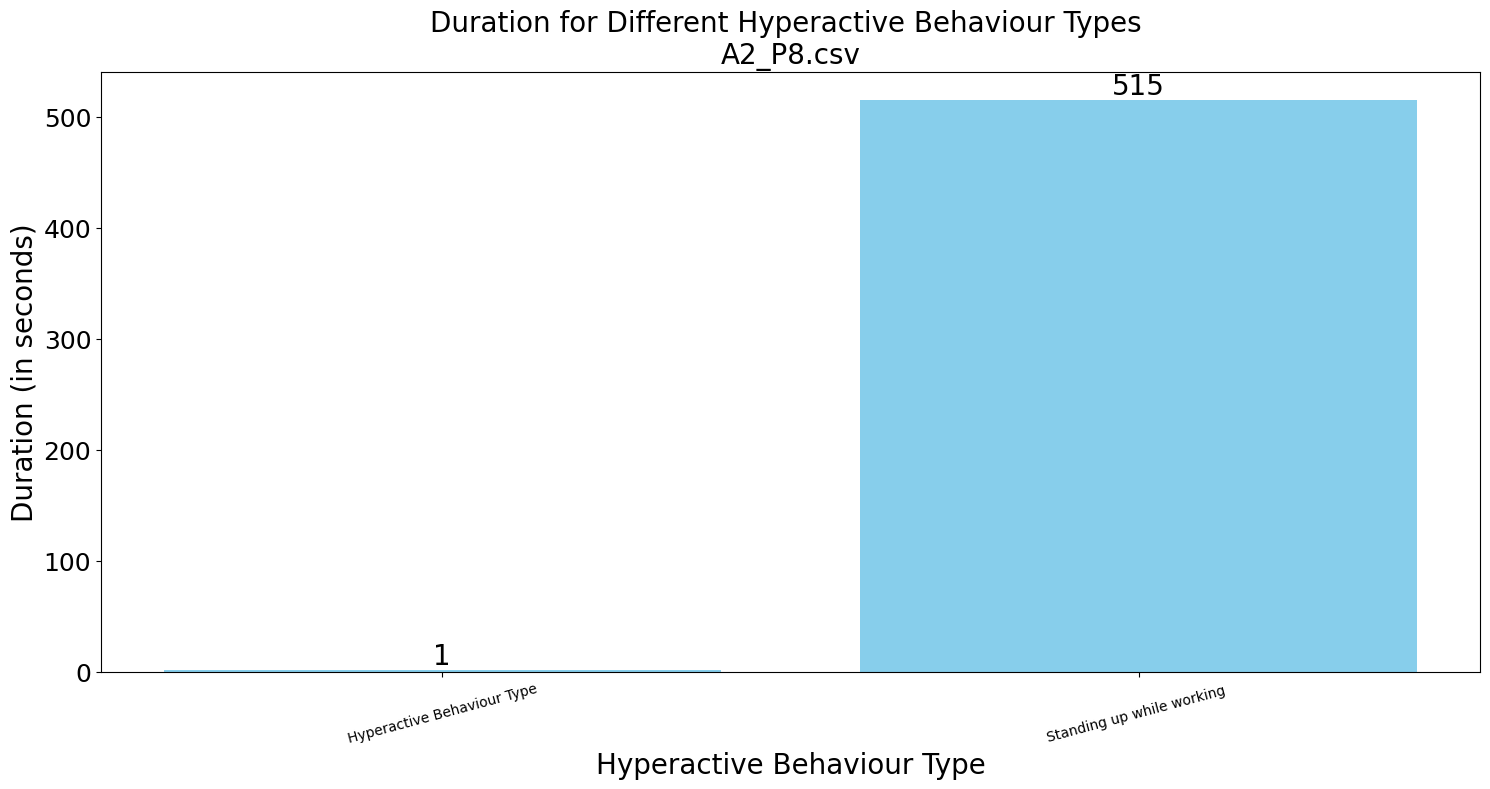

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A3_P24.csv


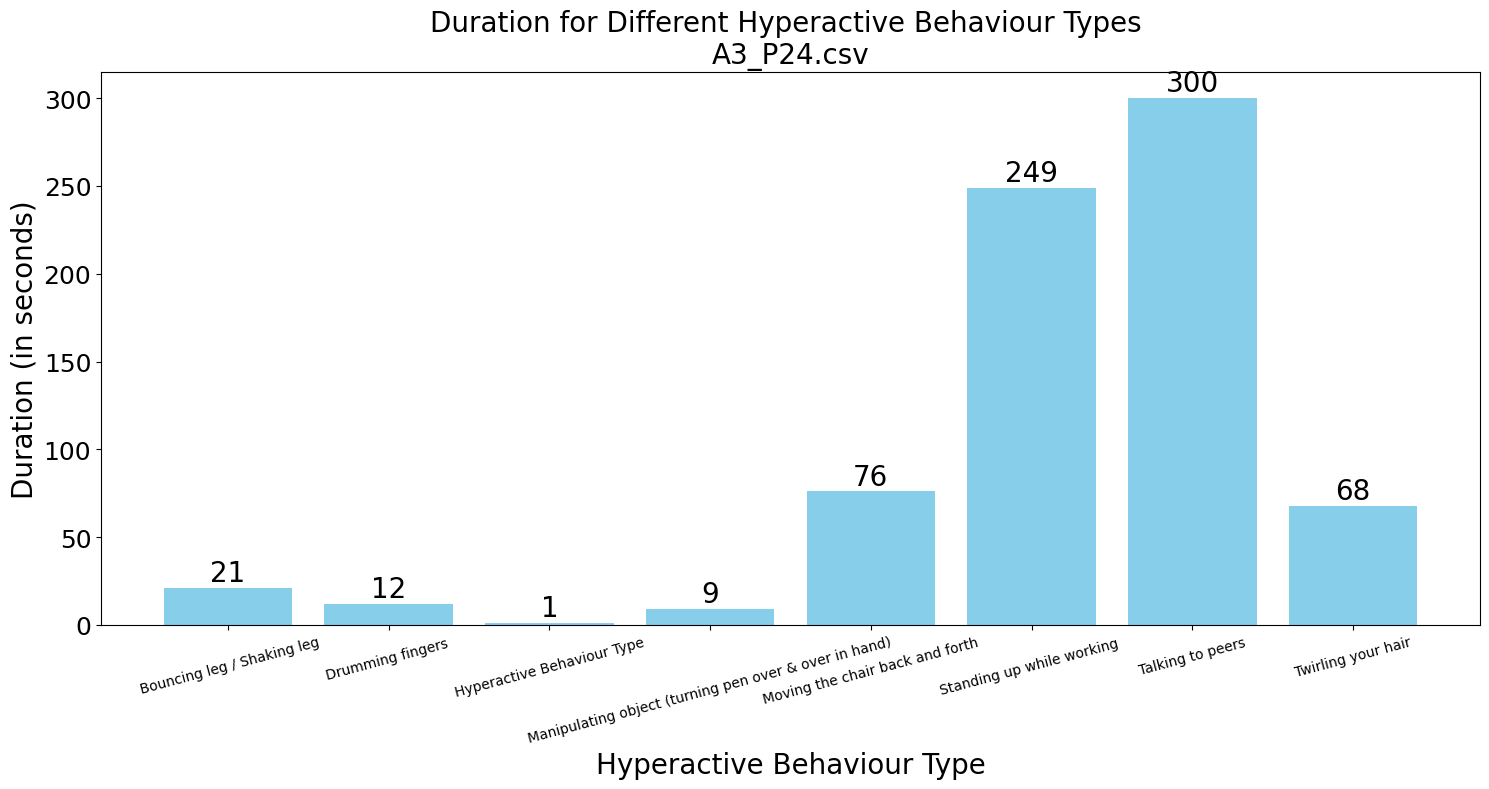

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A2_P9.csv


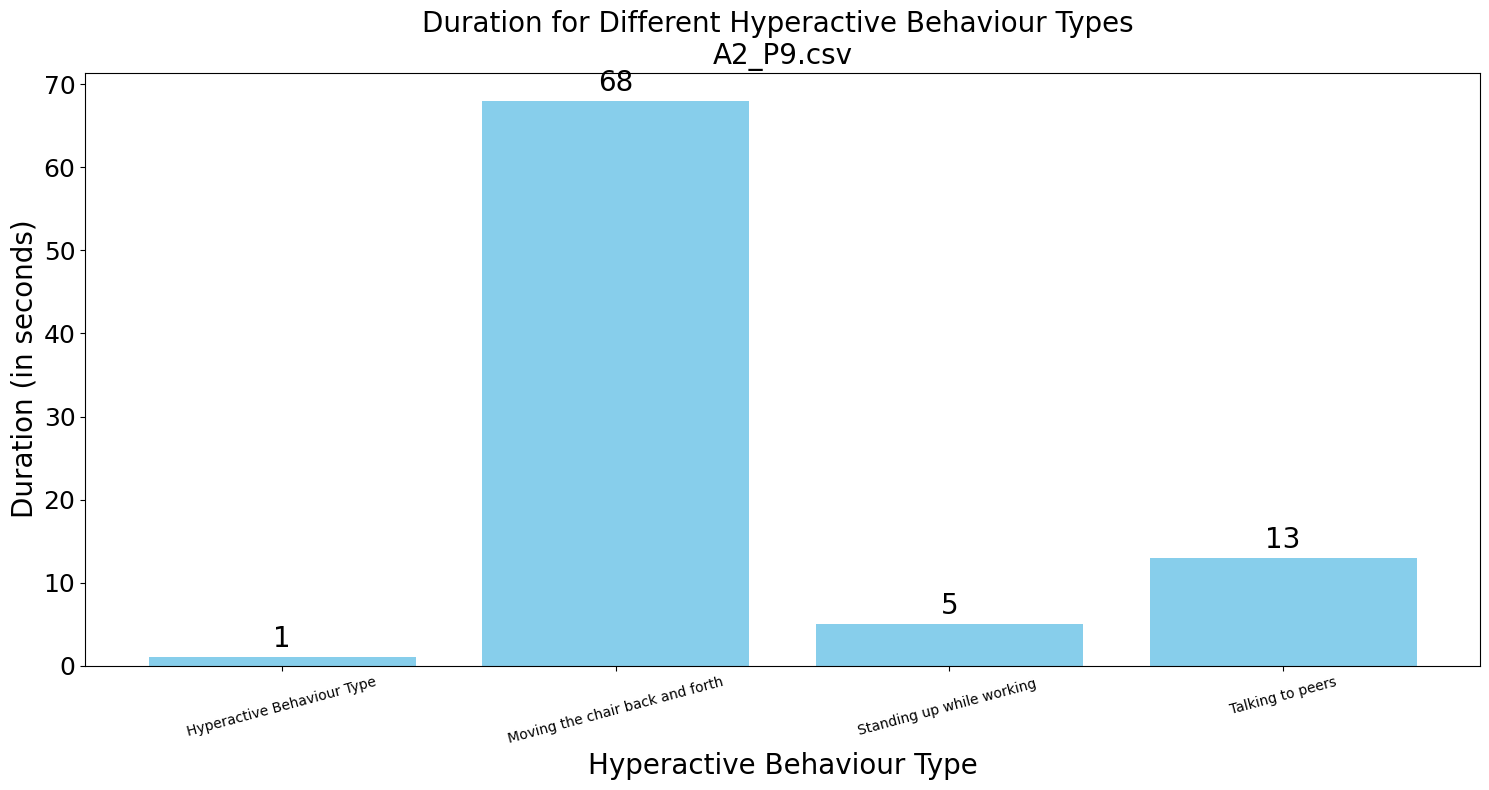

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A3_P18.csv


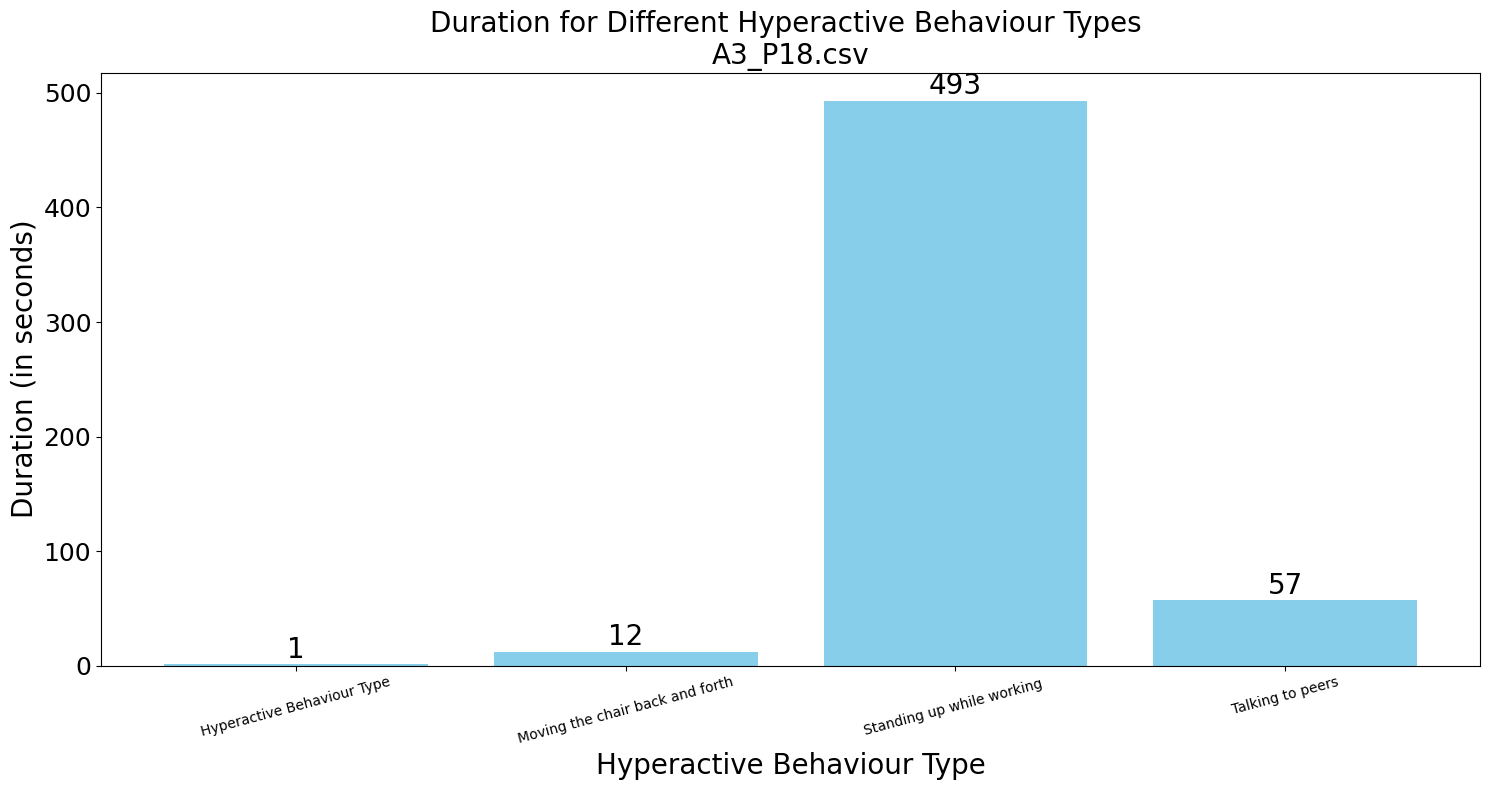

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A2_P21.csv


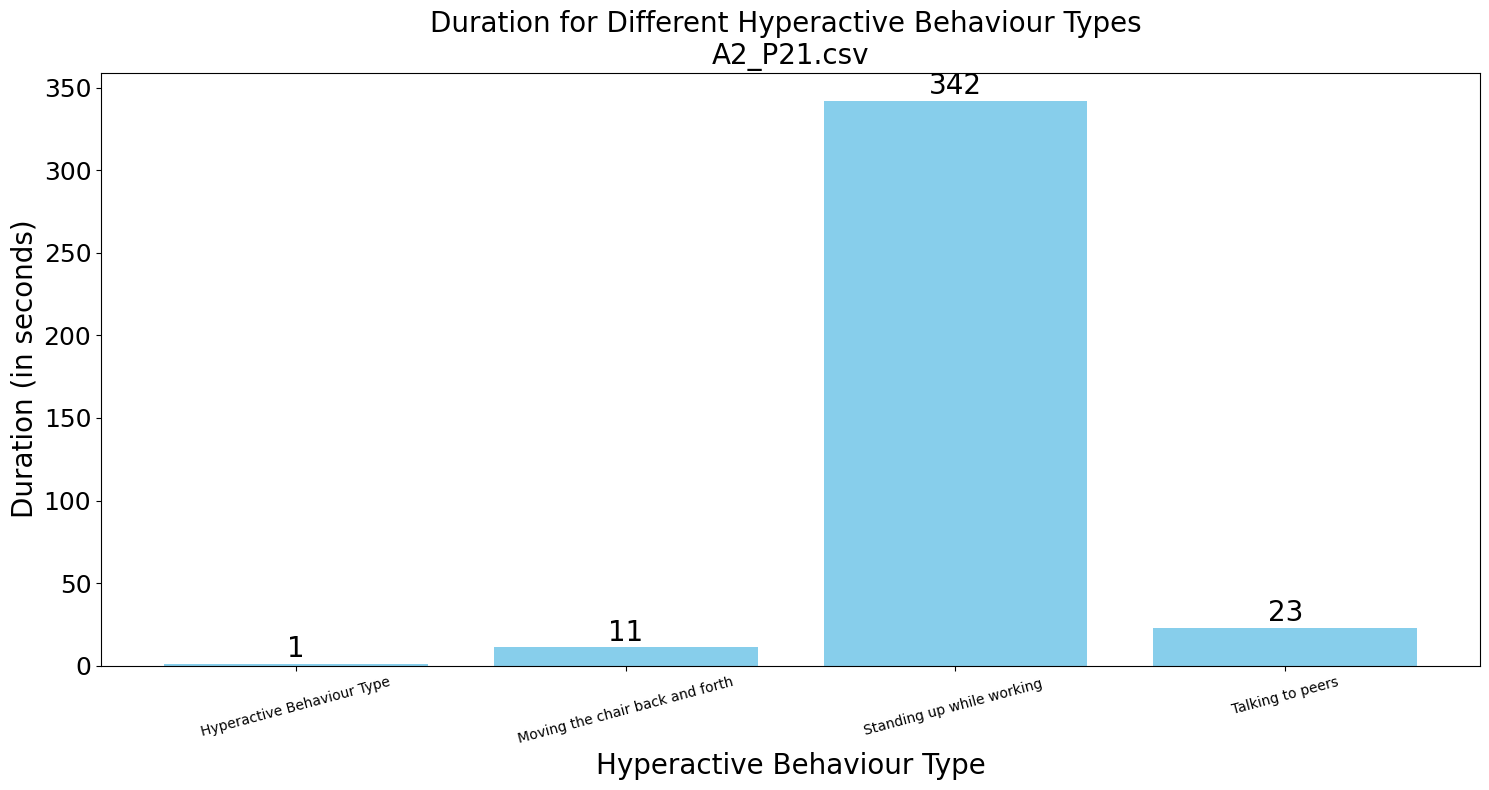

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A2_P23.csv


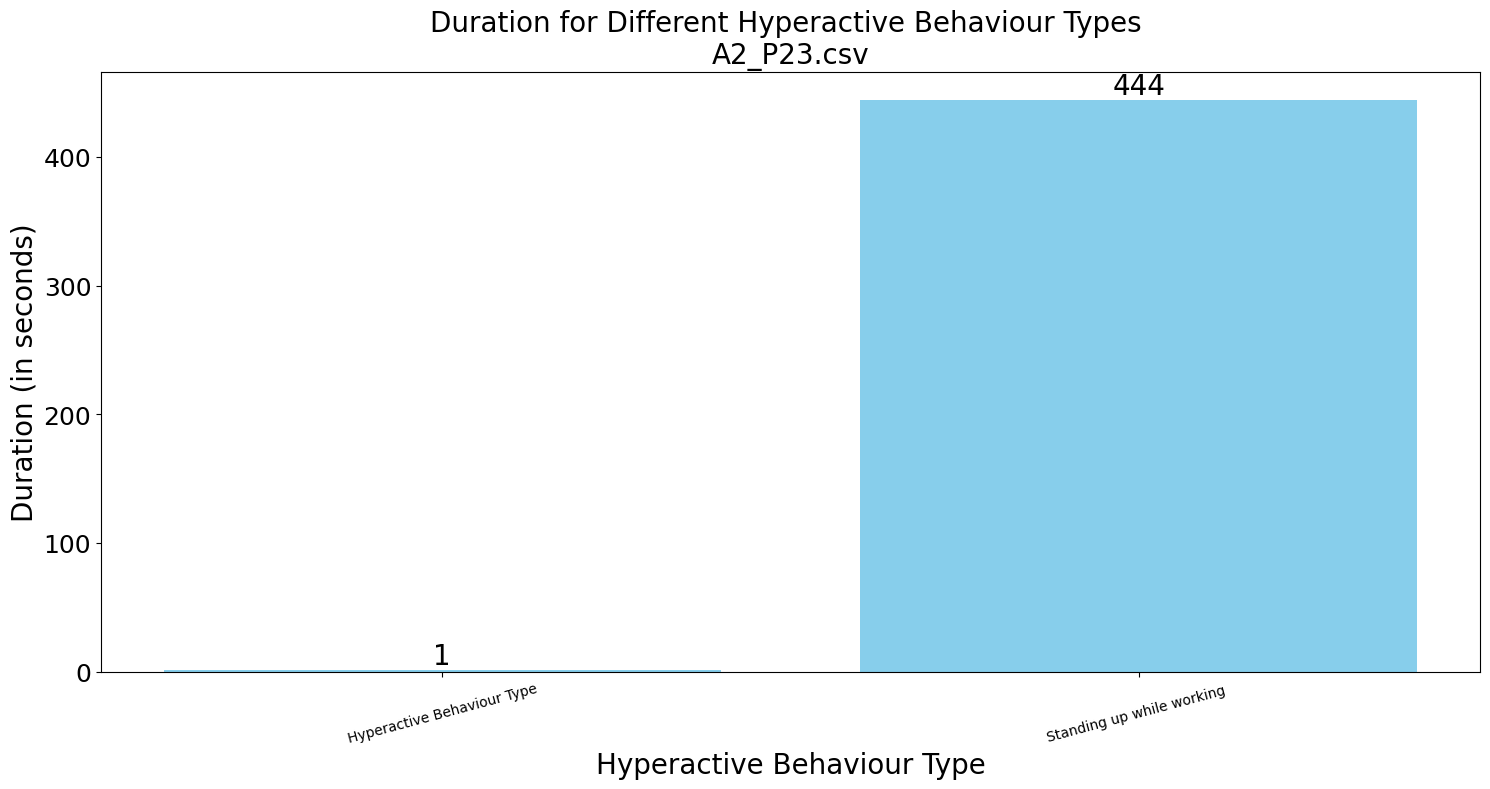

filepath:  /Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/A2_P22.csv


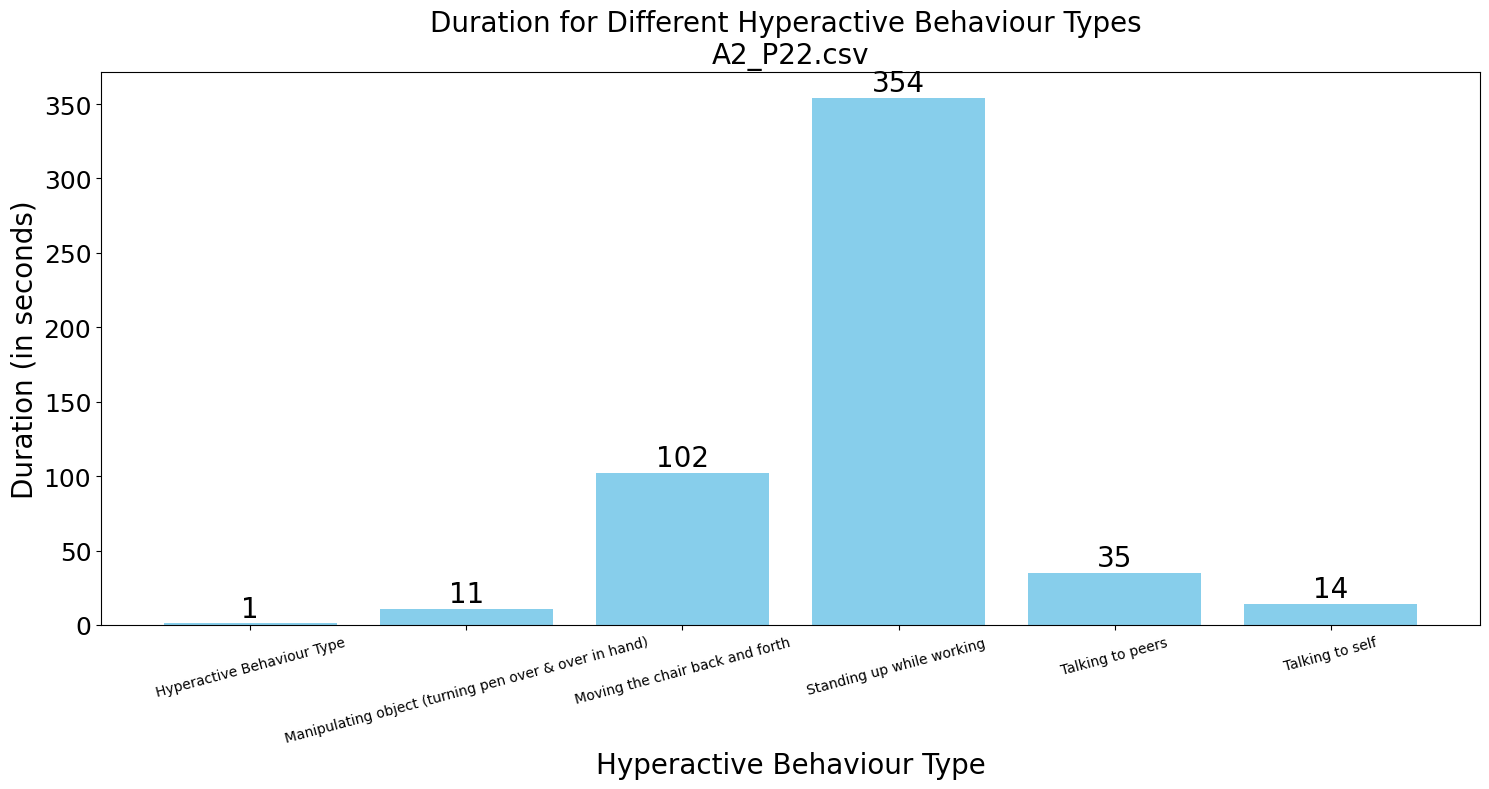

In [6]:
labels_folder_path = "/Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/LabelsAll/"
# Master dataframe to store data from all CSV files
master_data_frame = pd.DataFrame()
master_data_frame_2 = pd.DataFrame(columns=['nan', 'Drumming fingers ',
       'Manipulating object (turning pen over & over in hand)',
       'Twirling your hair', 'Hyperactive Behaviour Type',
       'Standing up while working ', 'Moving the chair back and forth',
       'Talking to peers', 'Talking to self',
       'Tapping foot/ Bouncing Leg', 'Finger tapping', 'None ',
       ' Bouncing leg / Shaking leg'])
for filename in os.listdir(labels_folder_path):
    if filename.endswith(".csv"):
        filepath = os.path.join(labels_folder_path, filename)
        print("filepath: ",filepath)
        df_labels = pd.read_csv(filepath,header=None)
        df_labels = df_labels.drop(0)
        df_labels.columns = ["Elapsed_Time","OffSeat","Hyperactive_Restless","HyperactiveBehaviourType","SecondHyperactiveBehaviourType","Inattentive","InattentiveBehaviourType","SecondInattentiveBehaviourType"]
        filtered_data = df_labels[df_labels["HyperactiveBehaviourType"] != "None"]
        filtered_data["PID"] = filename.split("_")[1].split(".")[0]
        filtered_data["activity_id"] = filename.split("_")[0]
        #master_data_frame = master_data_frame.append(filtered_data)
        master_data_frame = pd.concat([master_data_frame, filtered_data], ignore_index=True)

        #print("HyperactiveBehaviourType: ",df_labels["HyperactiveBehaviourType"].unique())
        # Group by the "Hyperactive Behaviour Type" and count the occurrences
        grouped_data = filtered_data.groupby("HyperactiveBehaviourType").size()
        #print("grouped_data: ",grouped_data,type(grouped_data))
        #print(grouped_data.to_frame())
        print("=====================================================================================================================")
        plt = plot_bar_plot(grouped_data,filename)
        plt.show()


In [7]:
master_data_frame = master_data_frame.drop(0)
unique_pids = master_data_frame["PID"].unique()
print("Unique participnats in the labeled data file: ",len(unique_pids))
unique_pids.sort()
print("Sorted list of particinants in the labeled data file: ",unique_pids)

Unique participnats in the labeled data file:  19
Sorted list of particinants in the labeled data file:  ['P10' 'P11' 'P12' 'P13' 'P14' 'P15' 'P16' 'P18' 'P19' 'P20' 'P21' 'P22'
 'P23' 'P24' 'P5' 'P6' 'P7' 'P8' 'P9']


In [8]:
master_data_frame["HyperactiveBehaviourType"].unique()

array([nan, 'Drumming fingers ',
       'Manipulating object (turning pen over & over in hand)',
       'Twirling your hair', 'Hyperactive Behaviour Type',
       'Moving the chair back and forth', 'Talking to self',
       'Finger tapping', 'Talking to peers', 'Standing up while working ',
       'Tapping foot/ Bouncing Leg',
       ' Tapping foot / Bouncing leg / Shaking leg / Tapping Foot',
       'Bouncing your leg, tapping your foot, drumming your fingers.',
       'None ', ' Bouncing leg / Shaking leg'], dtype=object)

In [9]:
def aggregate_and_plot_bar_plot(all_grouped_data):
    # Plotting the bar plot using matplotlib
    fig, ax = plt.subplots(figsize=(15, 8))
    bars = ax.bar(all_grouped_data.index, all_grouped_data.values, color='skyblue')
    
    # Adding value annotations on top of each bar with increased font size
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), 
                ha='center', va='bottom', fontsize=20)  # Increased fontsize to 20
    
    plt.title('Aggregated Duration for Different Hyperactive Behaviour Types Across All Participants', fontsize=20)
    plt.xlabel('Hyperactive Behaviour Type', fontsize=20)
    plt.ylabel('Duration (in seconds)', fontsize=20)
    plt.xticks(rotation=45, fontsize=10)  # x-axis ticks font size
    plt.yticks(fontsize=18)  # y-axis ticks font size
    plt.tight_layout()
    return plt

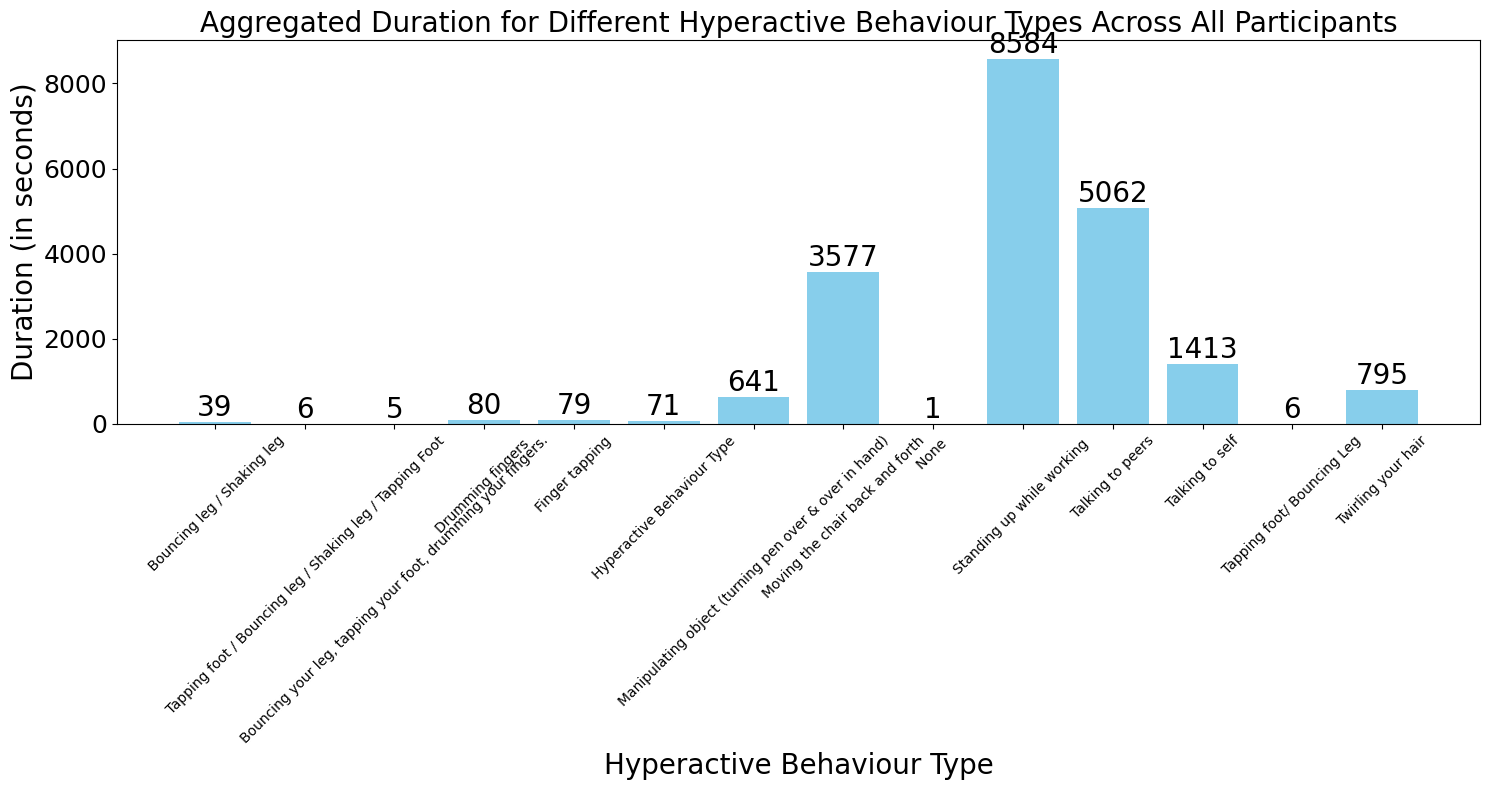

In [10]:
# Filter out rows where the behavior type is "None"
all_data_filtered = master_data_frame[master_data_frame["HyperactiveBehaviourType"] != "None"]

# Group by behavior type and get the sum
all_grouped_data = all_data_filtered.groupby("HyperactiveBehaviourType").size()

# Plotting the aggregated data
plt = aggregate_and_plot_bar_plot(all_grouped_data)
plt.show()

In [ ]:
# master_data_frame.to_csv("/Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/master_labels_all.csv",index=0)


In [ ]:
# Filter out rows where the "Hyperactive Behaviour Type" is "None"
filtered_data = df_labels[df_labels["HyperactiveBehaviourType"] != "None"]
# Group by the "Hyperactive Behaviour Type" and count the occurrences
grouped_data = filtered_data.groupby("HyperactiveBehaviourType").size()

grouped_data

## Heatmap plots for all the labeled data:

In [ ]:

def generate_df_for_heatmap_hyperactive_0_1(df):
    # List of unique items in "HyperactiveBehaviourType" as provided
    unique_items = df["Hyperactive_Restless"].unique()
    #print("unique_items: ",unique_items)
    # Group by 'PID' and count the occurrences of each unique item in "HyperactiveBehaviourType"
    grouped = df.groupby('PID')['Hyperactive_Restless'].value_counts().unstack().fillna(0)
    
    # Reindex the columns to match the unique items list and fill missing columns with NaN
    grouped = grouped.reindex(columns=unique_items)
    
    # Reset the index for final output
    result = grouped.reset_index()
    
    return result


In [ ]:

def generate_df_for_heatmap(df):
      # Replace old labels with new label
    df['HyperactiveBehaviourType'] = df['HyperactiveBehaviourType'].replace({
        'Tapping foot/ Bouncing Leg': 'BL',
        ' Bouncing leg / Shaking leg': 'BL',
        'Drumming fingers ': "DF",
         'Manipulating object (turning pen over & over in hand)': "MO",
         'Twirling your hair':"TH",
         'Standing up while working ': "SW", 
        'Moving the chair back and forth': "MC",
         'Talking to peers': "TP",
        'Talking to self' :"TS", 
         'Finger tapping' : "FT"
    })
    # List of unique items in "HyperactiveBehaviourType" as provided
    unique_items = df["HyperactiveBehaviourType"].unique()
    #print("unique_items: ",unique_items)
    # Group by 'PID' and count the occurrences of each unique item in "HyperactiveBehaviourType"
    grouped = df.groupby('PID')['HyperactiveBehaviourType'].value_counts().unstack().fillna(0)
    
    # Reindex the columns to match the unique items list and fill missing columns with NaN
    grouped = grouped.reindex(columns=unique_items)
    
    # Reset the index for final output
    result = grouped.reset_index()
    
    return result


In [ ]:
def plot_heatmap(result):
    # Mapping of old names to new names
    rename_dict = {
        'P7': 'P7_AD',
        'P9': 'P9_AD',
        'P11': 'P11_AD',
        'P14': 'P14_AD',
        'P16': 'P16_AD',
        'P24': 'P24_AD'}
    x_labels = result.columns[1:].tolist()  # Get the behavior types (excluding 'PID' column)
    y_labels = result['PID'].tolist()  # Get the participant IDs
  
    # y_labels 
    # P7_AD , P9_AD, P11_AD, P14_AD, P16_AD, P24_AD
    # Rename elements in the list
    updated_participants_y_labels = [rename_dict.get(participant, participant) for participant in y_labels]
    
    z_values = result.iloc[:, 1:].values  # Get the counts
    
    # Create the heatmap
    fig = go.Figure(data=go.Heatmap(
        z=z_values,
        x=x_labels,
        y=updated_participants_y_labels,
        colorscale='Cividis_r',
        hovertemplate='<b>%{y}</b><br><b>%{x}</b>: %{z}<extra></extra>',
        showscale=True,  # show the colorbar
        # text=z_values,  # Display the numbers on top
         text=z_values,
                    texttemplate="%{text}",
                    textfont={"size":20}
        # textposition="inside",  # Position the text inside the boxes
       # textfont=dict(color='black', size=12)  # Font properties for the text

    ))
    
    # Update layout
    fig.update_layout(
        yaxis_title="Participant IDs",
        xaxis_title="Behavior Types",
        xaxis=dict(showgrid=True, gridcolor='black'),  # Add gridlines
        yaxis=dict(showgrid=True, gridcolor='black'),  # Add gridlines
        plot_bgcolor='rgba(0,0,0,0)',  # Set the background color to transparent
        font=dict(size=12),  # Increase font size
       # margin=dict(t=50, b=50, l=50, r=50),  # Set margins to give more space
    )
    
    fig.show()

In [ ]:
# master_data_frame
master_labels_filepath = "/Users/shehjarsadhu/Desktop/UniversityOfRhodeIsland/Graduate/WBL/Project_Q2Behave/master_labels_all_NEW.csv"
master_labels_filepath = pd.read_csv(master_labels_filepath)


### Hyperactive / Non Hyper Active Heatmap plot (Stage 1 in the pipeline): 

In [ ]:
result_0_1 = generate_df_for_heatmap_hyperactive_0_1(master_labels_filepath)
result_0_1 = result_0_1.drop(["Hyperactive or Restless", ' ','0'], axis=1)
result_0_1 = result_0_1[result_0_1.columns[result_0_1.columns.notna()]]
print("All: ")
plot_heatmap(result_0_1)


In [ ]:
A1_01 = master_labels_filepath[master_labels_filepath["activity_id"]=="A1"]
A1_result_0_1 = generate_df_for_heatmap_hyperactive_0_1(A1_01)
A1_result_0_1 = A1_result_0_1.drop(["Hyperactive or Restless",'0'], axis=1)
A1_result_0_1 = A1_result_0_1[A1_result_0_1.columns[A1_result_0_1.columns.notna()]]
print("Activity 1: ")
plot_heatmap(A1_result_0_1)

In [ ]:
A2_01 = master_labels_filepath[master_labels_filepath["activity_id"]=="A2"]
A2_result_0_1 = generate_df_for_heatmap_hyperactive_0_1(A2_01)
A2_result_0_1 = A2_result_0_1.drop(["Hyperactive or Restless",'0'], axis=1)
A2_result_0_1 = A2_result_0_1[A2_result_0_1.columns[A2_result_0_1.columns.notna()]]
print("Activity 2: ")
plot_heatmap(A2_result_0_1)

In [ ]:
A3_01 = master_labels_filepath[master_labels_filepath["activity_id"]=="A3"]
A3_result_0_1 = generate_df_for_heatmap_hyperactive_0_1(A3_01)
A3_result_0_1 = A3_result_0_1.drop(["Hyperactive or Restless",'0',' '], axis=1)
A3_result_0_1 = A3_result_0_1[A3_result_0_1.columns[A3_result_0_1.columns.notna()]]
print("Activity 3: ")
plot_heatmap(A3_result_0_1)

In [ ]:
A4_01 = master_labels_filepath[master_labels_filepath["activity_id"]=="A4"]
A4_result_0_1 = generate_df_for_heatmap_hyperactive_0_1(A4_01)
A4_result_0_1 = A4_result_0_1.drop(["Hyperactive or Restless",'0'], axis=1)
A4_result_0_1 = A4_result_0_1[A4_result_0_1.columns[A4_result_0_1.columns.notna()]]
A4_result_0_1.columns
print("Activity 4:")
plot_heatmap(A4_result_0_1)

### Behaviour type counts for all the different hyperactive behaviour types (Stage 2 in the pipeline)

In [ ]:

## Get the dataframes to plot heatmaps.
result = generate_df_for_heatmap(master_labels_filepath)
result = result.drop(["Hyperactive Behaviour Type",'None '], axis=1)
result = result[result.columns[result.columns.notna()]]


In [ ]:
########################################################################################
# Create Activity based dataframes for heatmap plot.
########################################################################################
A1 = master_labels_filepath[master_labels_filepath["activity_id"]=="A1"]
#A1 = A1.drop(12629)
A2 = master_labels_filepath[master_labels_filepath["activity_id"]=="A2"]
A3 =  master_labels_filepath[master_labels_filepath["activity_id"]=="A3"]
#A3 = A3.drop(2407)
A4 =  master_labels_filepath[master_labels_filepath["activity_id"]=="A4"]
#A4 = A4.drop(13833)

result_A1 = generate_df_for_heatmap(A1)
result_A1 = result_A1.drop(["Hyperactive Behaviour Type"], axis=1)
# result_A1 = result_A1.drop(["Hyperactive Behaviour Type"], axis=1)
result_A1 = result_A1[result_A1.columns[result_A1.columns.notna()]]
result_A2 = generate_df_for_heatmap(A2)
result_A2 = result_A2.drop(["Hyperactive Behaviour Type"], axis=1)
result_A2 = result_A2[result_A2.columns[result_A2.columns.notna()]]
result_A3 = generate_df_for_heatmap(A3)
result_A3 = result_A3.drop("Hyperactive Behaviour Type", axis=1)
result_A3 = result_A3[result_A3.columns[result_A3.columns.notna()]]
result_A4 = generate_df_for_heatmap(A4)
result_A4 = result_A4.drop(["Hyperactive Behaviour Type",'None '], axis=1)
result_A4 = result_A4[result_A4.columns[result_A4.columns.notna()]]
# result_A4

In [ ]:
print("All Activities")
plot_heatmap(result)


In [ ]:

print("Activity 1")
plot_heatmap(result_A1)


In [ ]:

print("Activity 2")
plot_heatmap(result_A2)


In [ ]:

print("Activity 3")
plot_heatmap(result_A3)


In [ ]:

print("Activity 4")
plot_heatmap(result_A4)